In [3]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas
import os
from scipy import stats

In [4]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import rcParams
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import                                                                                                                  
import mplhep as hep
plt.style.use(hep.style.ROOT)

In [5]:
def GetBasics(df):
    return df.Filter("n_truthtracks == 2")\
             .Define("a_prime_pz", "truthdimuon_pz[0]")\
             .Define("two_track_frac", "int(bool(truthtrack_rectrack_id[0] > -1 && truthtrack_rectrack_id[1] > -1))")\
             .Define("recon_w_dimuon_track", "int(bool(truthdimuon_recoed[0] > 0))")
#              .Filter("!(truthtrack_x_st3[0] >= -0.0001 && truthtrack_x_st3[0] <= 0.0001)")\
#              .Filter("!(truthtrack_x_st3[1] >= -0.0001 && truthtrack_x_st3[1] <= 0.0001)")\
#              .Filter("!(truthtrack_y_st3[0] >= -0.0001 && truthtrack_y_st3[0] <= 0.0001)")\
#              .Filter("!(truthtrack_y_st3[1] >= -0.0001 && truthtrack_y_st3[1] <= 0.0001)")\
#              .Define("reconstructable_tracks", "int(bool(truthtrack_x_st3[0] >= -150 && truthtrack_x_st3[0] <= 150 && truthtrack_x_st3[1] >= -150 && truthtrack_x_st3[1] <= 150 && truthtrack_y_st3[0] >= -150 && truthtrack_y_st3[0] <= 150 && truthtrack_y_st3[1] >= -150 && truthtrack_y_st3[1] <= 150))")

             

In [6]:
def dfToPDF(df):
    gb = GetBasics(df)
    npy = gb.AsNumpy(columns=["a_prime_pz", "two_track_frac", "recon_w_dimuon_track",  "weight"])
    return pandas.DataFrame(npy)

In [13]:
df_mass_0pt011_withDC = ROOT.RDataFrame("Events", "/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-7.6.root")
pdf = dfToPDF(df_mass_0pt011_withDC)

In [23]:
#debugging
Brem_3050000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-7.6.root")
Brem_0250000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-7.6.root")

Brem_0250000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.root")

sens_025_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/sens_plots_025_4.root")
sens_025_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/sens_plots_025_76.root")

sens_155_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/sens_plots_155_4.root")
sens_155_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/sens_plots_155_76.root")


In [24]:
pdf_Brem_0250000_z500_600_eps_76= dfToPDF(Brem_0250000_z500_600_eps_76)
pdf_Brem_3050000_z500_600_eps_76= dfToPDF(Brem_3050000_z500_600_eps_76)

pdf_Brem_0250000_z500_600_eps_4= dfToPDF(Brem_0250000_z500_600_eps_4)


pdf_sens_025_4= dfToPDF(sens_025_4)
pdf_sens_025_76= dfToPDF(sens_025_76)

pdf_sens_155_4= dfToPDF(sens_155_4)
pdf_sens_155_76= dfToPDF(sens_155_76)

In [8]:
#diff mass
print(sum(pdf_Brem_0250000_z500_600_eps_76["reconstructable_tracks"].to_numpy()))
print(sum(pdf_Brem_3050000_z500_600_eps_76["reconstructable_tracks"].to_numpy()))


#diff epsilon
print(sum(pdf_Brem_0250000_z500_600_eps_76["reconstructable_tracks"].to_numpy()))
print(sum(pdf_Brem_0250000_z500_600_eps_4["reconstructable_tracks"].to_numpy()))

print("after manually running two")
print(sum(pdf_sens_025_4["reconstructable_tracks"].to_numpy()))
print(sum(pdf_sens_025_76["reconstructable_tracks"].to_numpy()))

print("Mass = 1.55 GeV")
print(sum(pdf_sens_155_4["reconstructable_tracks"].to_numpy()))
print(sum(pdf_sens_155_76["reconstructable_tracks"].to_numpy()))


9750
3978
9750
9754
after manually running two
9754
9756
Mass = 1.55 GeV
6388
6390


In [7]:
Brem_1150000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-7.6.root")
Brem_1650000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-4.4.root")
Brem_1050000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-6.root")
Brem_1950000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-7.root")
Brem_2650000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-6.6.root")
Brem_0250000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-6.8.root")
Brem_2650000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-6.8.root")
Brem_1850000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-4.2.root")
Brem_1150000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-4.2.root")
Brem_1750000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-6.root")
Brem_0350000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-4.4.root")
Brem_2550000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-7.6.root")
Brem_1750000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-4.6.root")
Brem_1850000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-4.6.root")
Brem_2950000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-5.root")
Brem_1850000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-4.8.root")
Brem_1450000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-4.2.root")
Brem_0550000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-7.6.root")
Brem_0650000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-5.8.root")
Brem_1550000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-5.6.root")
Brem_0750000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-5.6.root")
Brem_0750000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-7.root")
Brem_1850000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-5.2.root")
Brem_0250000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.root")
Brem_2950000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-4.6.root")
Brem_2550000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-6.root")
Brem_2850000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-5.4.root")
Brem_0950000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-7.4.root")
Brem_3050000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-4.6.root")
Brem_3050000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-4.4.root")
Brem_0350000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-6.2.root")
Brem_2450000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-6.4.root")
Brem_2250000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-6.root")
Brem_1150000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-7.root")
Brem_0350000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-6.8.root")
Brem_0250000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-5.4.root")
Brem_1550000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-6.6.root")
Brem_1450000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-5.root")
Brem_1650000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-7.2.root")
Brem_0350000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-5.4.root")
Brem_1850000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-4.root")
Brem_0750000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-7.2.root")
Brem_1050000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-6.6.root")
Brem_0950000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-6.8.root")
Brem_1250000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-4.4.root")
Brem_0750000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-4.6.root")
Brem_2950000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-6.6.root")
Brem_1350000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-6.root")
Brem_1350000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-6.8.root")
Brem_3050000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-7.4.root")
Brem_0950000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-6.2.root")
Brem_2750000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.8.root")
Brem_2650000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-4.8.root")
Brem_1650000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-7.6.root")
Brem_1450000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.4.root")
Brem_1750000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-6.2.root")
Brem_1650000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-6.root")
Brem_0650000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-7.2.root")
Brem_1150000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-4.6.root")
Brem_1850000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-5.4.root")
Brem_2150000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-5.root")
Brem_1750000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-5.8.root")
Brem_1250000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-6.root")
Brem_1550000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-7.root")
Brem_2450000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-5.6.root")
Brem_0750000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-6.6.root")
Brem_0350000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-6.6.root")
Brem_0950000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-6.root")
Brem_1950000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-4.6.root")
Brem_1650000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-4.root")
Brem_1550000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-4.6.root")
Brem_1750000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-7.6.root")
Brem_0850000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-6.6.root")
Brem_2250000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-4.6.root")
Brem_1250000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-7.4.root")
Brem_0450000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-5.2.root")
Brem_2050000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-4.8.root")
Brem_1550000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-6.8.root")
Brem_2450000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-7.2.root")
Brem_0450000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-7.root")
Brem_0350000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-5.6.root")
Brem_2350000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-5.2.root")
Brem_0550000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-6.root")
Brem_1350000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-5.2.root")
Brem_1950000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-5.6.root")
Brem_1350000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-4.root")
Brem_1550000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-5.4.root")
Brem_0750000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-4.root")
Brem_1650000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-4.6.root")
Brem_0650000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-7.4.root")
Brem_0450000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-4.2.root")
Brem_1650000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-5.root")
Brem_0550000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-5.6.root")
Brem_0350000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-7.4.root")
Brem_2650000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-5.root")
Brem_1750000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-5.root")
Brem_2850000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-5.6.root")
Brem_2350000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-7.6.root")
Brem_0450000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-4.8.root")
Brem_1850000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-6.root")
Brem_0450000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-7.4.root")
Brem_1250000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-5.root")
Brem_2050000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-7.2.root")
Brem_2550000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-5.6.root")
Brem_3050000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-4.2.root")
Brem_2250000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-5.4.root")
Brem_2250000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-5.2.root")
Brem_2150000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-4.6.root")
Brem_2250000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-5.6.root")
Brem_1350000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-6.4.root")
Brem_0450000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-6.8.root")
Brem_0850000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-6.2.root")
Brem_2750000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-7.2.root")
Brem_0950000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-7.root")
Brem_1750000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-4.2.root")
Brem_1250000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-5.2.root")
Brem_1550000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-7.4.root")
Brem_2950000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-7.4.root")
Brem_1350000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-4.4.root")
Brem_1950000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-5.4.root")
Brem_2250000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-6.2.root")
Brem_2750000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-5.8.root")
Brem_0850000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-5.6.root")
Brem_1550000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-4.4.root")
Brem_2750000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-7.4.root")
Brem_2350000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-6.6.root")
Brem_1850000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-7.6.root")
Brem_1750000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-6.8.root")
Brem_0950000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-5.6.root")
Brem_1250000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-4.6.root")
Brem_1850000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-7.root")
Brem_1150000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-6.8.root")
Brem_2250000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-7.root")
Brem_2550000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-7.root")
Brem_2150000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-7.2.root")
Brem_2150000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-6.4.root")
Brem_2150000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-7.root")
Brem_2850000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-4.4.root")
Brem_2350000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-4.8.root")
Brem_0550000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-4.root")
Brem_1550000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-5.8.root")
Brem_1150000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-7.4.root")
Brem_1150000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-5.2.root")
Brem_1650000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-4.8.root")
Brem_1050000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-6.4.root")
Brem_1950000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-4.4.root")
Brem_1450000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-4.4.root")
Brem_2950000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-4.4.root")
Brem_1350000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-7.6.root")
Brem_0650000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-7.root")
Brem_2450000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-4.8.root")
Brem_1050000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-6.2.root")
Brem_2250000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-4.4.root")
Brem_2050000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-5.6.root")
Brem_2550000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-6.8.root")
Brem_2650000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-7.4.root")
Brem_0850000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-4.root")
Brem_0250000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-5.root")
Brem_1050000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-4.4.root")
Brem_2150000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-6.8.root")
Brem_2950000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-6.2.root")
Brem_1050000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-5.8.root")
Brem_0450000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-4.6.root")
Brem_0750000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-6.4.root")
Brem_2050000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-6.root")
Brem_2950000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-5.8.root")
Brem_1750000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-6.6.root")
Brem_2550000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-7.2.root")
Brem_1050000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-7.2.root")
Brem_2450000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-4.4.root")
Brem_1950000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-4.8.root")
Brem_0550000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-7.root")
Brem_2850000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-6.2.root")
Brem_0450000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-5.root")
Brem_2850000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-4.root")
Brem_2250000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-5.8.root")
Brem_1250000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-6.4.root")
Brem_0950000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-7.2.root")
Brem_0450000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-6.6.root")
Brem_1850000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-6.2.root")
Brem_1850000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-6.4.root")
Brem_2350000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-4.6.root")
Brem_2050000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-4.4.root")
Brem_1650000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-4.2.root")
Brem_0650000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-4.6.root")
Brem_0850000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-4.2.root")
Brem_2050000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-5.8.root")
Brem_2750000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-4.2.root")
Brem_0750000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-5.8.root")
Brem_0650000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-5.2.root")
Brem_0450000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-5.6.root")
Brem_0850000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-5.2.root")
Brem_1550000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-4.root")
Brem_1350000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-6.2.root")
Brem_2750000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-4.root")
Brem_1450000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.root")
Brem_0550000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-7.4.root")
Brem_1150000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-4.8.root")
Brem_2350000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-4.4.root")
Brem_2650000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-4.root")
Brem_2750000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.4.root")
Brem_2450000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-7.4.root")
Brem_1250000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-7.2.root")
Brem_2550000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-6.6.root")
Brem_2650000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-5.2.root")
Brem_1650000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-6.8.root")
Brem_0550000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-4.6.root")
Brem_2550000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-5.root")
Brem_1350000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-5.8.root")
Brem_1350000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-7.4.root")
Brem_0350000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-5.2.root")
Brem_3050000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-6.2.root")
Brem_2950000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-7.2.root")
Brem_2850000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-4.6.root")
Brem_1950000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-6.4.root")
Brem_2350000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-7.root")
Brem_0750000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-4.8.root")
Brem_1150000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-6.root")
Brem_2550000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-5.4.root")
Brem_2850000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-7.4.root")
Brem_0450000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-5.8.root")
Brem_1850000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-6.8.root")
Brem_2050000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-4.2.root")
Brem_2850000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-5.2.root")
Brem_0250000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.6.root")
Brem_2050000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-7.6.root")
Brem_2750000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-5.6.root")
Brem_0250000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-6.4.root")
Brem_1250000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-6.8.root")
Brem_0950000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-6.4.root")
Brem_2850000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-6.root")
Brem_1150000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-7.2.root")
Brem_2550000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-6.2.root")
Brem_0250000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.8.root")
Brem_0550000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-6.8.root")
Brem_2150000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-4.root")
Brem_1650000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-5.4.root")
Brem_1950000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-5.root")
Brem_2250000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-7.4.root")
Brem_2050000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-6.4.root")
Brem_1550000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-6.4.root")
Brem_2250000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-7.2.root")
Brem_0650000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-4.4.root")
Brem_2450000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-5.8.root")
Brem_0450000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-6.4.root")
Brem_1250000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-5.8.root")
Brem_1150000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-5.8.root")
Brem_1350000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-5.4.root")
Brem_2250000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-7.6.root")
Brem_1150000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-6.2.root")
Brem_2450000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-5.root")
Brem_2550000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-5.2.root")
Brem_3050000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-5.8.root")
Brem_0950000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-4.8.root")
Brem_1950000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-4.2.root")
Brem_2050000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-6.2.root")
Brem_2250000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-6.4.root")
Brem_1350000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-4.2.root")
Brem_1450000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-6.root")
Brem_2750000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-5.2.root")
Brem_0350000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-5.root")
Brem_2950000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-4.8.root")
Brem_2850000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-4.8.root")
Brem_0450000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-6.root")
Brem_1850000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-5.root")
Brem_0250000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-7.2.root")
Brem_2350000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-4.root")
Brem_0950000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-5.4.root")
Brem_0950000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-4.4.root")
Brem_0850000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-4.8.root")
Brem_2950000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-6.4.root")
Brem_1950000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-7.4.root")
Brem_0650000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-5.6.root")
Brem_2950000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-6.8.root")
Brem_0850000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-4.6.root")
Brem_0250000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-6.6.root")
Brem_1450000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.2.root")
Brem_0550000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-5.4.root")
Brem_0250000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-5.8.root")
Brem_0950000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-5.root")
Brem_2150000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-5.6.root")
Brem_0250000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.2.root")
Brem_0850000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-4.4.root")
Brem_1950000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-7.2.root")
Brem_2150000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-6.6.root")
Brem_1950000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-6.6.root")
Brem_2450000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-4.root")
Brem_1950000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-6.8.root")
Brem_1050000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-4.root")
Brem_2850000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-7.root")
Brem_0450000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-4.root")
Brem_2550000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-7.4.root")
Brem_1850000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-7.2.root")
Brem_0750000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-5.4.root")
Brem_0850000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-6.root")
Brem_1950000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-6.2.root")
Brem_2050000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-5.4.root")
Brem_1950000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-4.root")
Brem_2850000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-7.2.root")
Brem_2550000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-5.8.root")
Brem_2650000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-7.root")
Brem_2250000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-6.8.root")
Brem_2450000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-6.root")
Brem_1150000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-5.6.root")
Brem_3050000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-4.root")
Brem_1450000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-5.8.root")
Brem_0250000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-7.6.root")
Brem_1850000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-7.4.root")
Brem_1550000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-5.2.root")
Brem_3050000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-5.root")
Brem_2750000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.2.root")
Brem_1350000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-4.6.root")
Brem_0850000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-7.4.root")
Brem_0650000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-5.4.root")
Brem_0650000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-4.2.root")
Brem_1050000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-4.2.root")
Brem_2050000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-5.2.root")
Brem_1050000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-5.4.root")
Brem_0850000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-5.8.root")
Brem_1350000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-5.6.root")
Brem_0950000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-7.6.root")
Brem_2050000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-6.8.root")
Brem_2350000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-5.4.root")
Brem_2450000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-7.6.root")
Brem_0550000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-4.8.root")
Brem_0750000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-4.4.root")
Brem_2250000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-4.8.root")
Brem_2750000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.root")
Brem_0350000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-4.root")
Brem_1450000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-4.root")
Brem_1750000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-4.4.root")
Brem_0750000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-6.8.root")
Brem_1250000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-4.2.root")
Brem_1750000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-7.root")
Brem_2650000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-7.2.root")
Brem_0750000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-6.root")
Brem_1750000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-7.2.root")
Brem_2750000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-5.4.root")
Brem_1250000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-7.6.root")
Brem_2150000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-5.2.root")
Brem_0450000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-4.4.root")
Brem_1350000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-6.6.root")
Brem_1750000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-4.root")
Brem_2950000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-4.2.root")
Brem_0250000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-5.6.root")
Brem_2550000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-4.root")
Brem_0850000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-5.root")
Brem_1450000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-5.2.root")
Brem_1450000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-5.4.root")
Brem_1050000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-7.4.root")
Brem_1650000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-7.4.root")
Brem_0750000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-4.2.root")
Brem_1650000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-6.4.root")
Brem_1450000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-4.6.root")
Brem_1450000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-6.2.root")
Brem_0650000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-4.root")
Brem_1450000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-6.8.root")
Brem_2250000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-5.root")
Brem_0350000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-7.root")
Brem_2150000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-6.root")
Brem_0250000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-7.4.root")
Brem_0450000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-7.2.root")
Brem_0550000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-6.4.root")
Brem_2850000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-6.4.root")
Brem_2550000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-4.4.root")
Brem_0450000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-6.2.root")
Brem_2050000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-7.4.root")
Brem_2550000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-4.2.root")
Brem_1050000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-6.8.root")
Brem_1450000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.6.root")
Brem_0250000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-6.root")
Brem_1550000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-5.root")
Brem_0550000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-4.4.root")
Brem_0850000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-7.6.root")
Brem_2150000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-4.4.root")
Brem_0950000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-5.2.root")
Brem_2650000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-5.4.root")
Brem_1250000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-6.2.root")
Brem_0550000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-7.2.root")
Brem_2350000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-7.4.root")
Brem_1550000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-4.8.root")
Brem_1350000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-5.root")
Brem_2550000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-6.4.root")
Brem_1150000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-4.4.root")
Brem_1850000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-5.6.root")
Brem_2250000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-4.2.root")
Brem_3050000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-6.4.root")
Brem_1150000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-4.root")
Brem_1250000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-4.root")
Brem_2850000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-7.6.root")
Brem_2950000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-4.root")
Brem_2550000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-4.8.root")
Brem_2750000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-7.6.root")
Brem_2950000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-5.2.root")
Brem_3050000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-6.6.root")
Brem_0750000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-6.2.root")
Brem_3050000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-6.root")
Brem_2150000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-7.4.root")
Brem_1650000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-5.8.root")
Brem_1650000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-6.6.root")
Brem_2750000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-4.4.root")
Brem_2250000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-6.6.root")
Brem_1950000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-5.8.root")
Brem_2150000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-4.8.root")
Brem_0850000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-6.4.root")
Brem_2750000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-4.8.root")
Brem_1650000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-7.root")
Brem_2650000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-6.4.root")
Brem_2950000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-5.6.root")
Brem_1450000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-5.6.root")
Brem_0650000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-6.6.root")
Brem_0650000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-5.root")
Brem_0450000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-5.4.root")
Brem_2750000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-4.6.root")
Brem_0650000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-6.2.root")
Brem_2750000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.6.root")
Brem_3050000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-7.6.root")
Brem_2350000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-5.root")
Brem_1850000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-6.6.root")
Brem_1250000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-5.6.root")
Brem_2350000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-5.8.root")
Brem_2450000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-6.6.root")
Brem_2850000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-6.6.root")
Brem_0550000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-4.2.root")
Brem_2450000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-4.6.root")
Brem_1150000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-5.4.root")
Brem_1050000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-7.6.root")
Brem_1050000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-5.6.root")
Brem_2450000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-6.2.root")
Brem_0850000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-7.root")
Brem_0950000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-5.8.root")
Brem_1050000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-4.6.root")
Brem_0250000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-5.2.root")
Brem_1350000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-7.root")
Brem_1550000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-4.2.root")
Brem_2950000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-6.root")
Brem_1150000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-6.4.root")
Brem_1550000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-7.2.root")
Brem_1650000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-6.2.root")
Brem_0550000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-6.2.root")
Brem_1850000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-5.8.root")
Brem_1350000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-4.8.root")
Brem_2350000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-6.2.root")
Brem_0350000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-4.2.root")
Brem_0650000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-7.6.root")
Brem_2050000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-6.6.root")
Brem_2750000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-5.root")
Brem_2350000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-4.2.root")
Brem_0750000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-5.2.root")
Brem_2350000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-6.4.root")
Brem_1550000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-7.6.root")
Brem_1050000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-7.root")
Brem_1950000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-6.root")
Brem_0450000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.450000_z500_600_eps_-7.6.root")
Brem_2450000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-4.2.root")
Brem_1250000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-6.6.root")
Brem_1650000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-5.6.root")
Brem_1050000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-5.root")
Brem_3050000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-6.8.root")
Brem_3050000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-5.2.root")
Brem_1250000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-4.8.root")
Brem_2050000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-4.6.root")
Brem_2650000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-5.6.root")
Brem_2650000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-7.6.root")
Brem_0650000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-6.4.root")
Brem_2150000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-4.2.root")
Brem_1750000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-5.6.root")
Brem_1250000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-7.root")
Brem_0350000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-7.6.root")
Brem_0650000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-6.root")
Brem_2150000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-5.8.root")
Brem_2150000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-5.4.root")
Brem_1150000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-5.root")
Brem_2450000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-7.root")
Brem_0350000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-7.2.root")
Brem_1750000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-6.4.root")
Brem_0750000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-5.root")
Brem_2150000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-7.6.root")
Brem_2250000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.250000_z500_600_eps_-4.root")
Brem_1550000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-6.root")
Brem_0750000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-7.6.root")
Brem_3050000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-5.6.root")
Brem_0950000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-4.6.root")
Brem_1750000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-4.8.root")
Brem_3050000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-5.4.root")
Brem_2050000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-5.root")
Brem_2650000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-5.8.root")
Brem_2350000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-6.8.root")
Brem_0350000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-4.6.root")
Brem_2650000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-4.4.root")
Brem_2350000_z500_600_eps_56= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-5.6.root")
Brem_1750000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-5.2.root")
Brem_1950000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-7.6.root")
Brem_0850000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-6.8.root")
Brem_2650000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-6.2.root")
Brem_1550000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.550000_z500_600_eps_-6.2.root")
Brem_1050000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-4.8.root")
Brem_2650000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-4.2.root")
Brem_0950000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-6.6.root")
Brem_1750000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-5.4.root")
Brem_2850000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-4.2.root")
Brem_3050000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-7.2.root")
Brem_0650000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-4.8.root")
Brem_1250000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.250000_z500_600_eps_-5.4.root")
Brem_0650000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.650000_z500_600_eps_-6.8.root")
Brem_0350000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-6.root")
Brem_2050000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-4.root")
Brem_1450000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-4.8.root")
Brem_0350000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-4.8.root")
Brem_2650000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-6.root")
Brem_0950000_z500_600_eps_42= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-4.2.root")
Brem_1950000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.950000_z500_600_eps_-5.2.root")
Brem_2950000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-5.4.root")
Brem_0550000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-6.6.root")
Brem_2850000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-5.root")
Brem_0250000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-7.root")
Brem_2650000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.650000_z500_600_eps_-4.6.root")
Brem_2450000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-5.2.root")
Brem_0350000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-5.8.root")
Brem_1650000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.650000_z500_600_eps_-5.2.root")
Brem_2850000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-5.8.root")
Brem_1150000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.150000_z500_600_eps_-6.6.root")
Brem_2150000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.150000_z500_600_eps_-6.2.root")
Brem_1750000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.750000_z500_600_eps_-7.4.root")
Brem_0950000_z500_600_eps_4= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.950000_z500_600_eps_-4.root")
Brem_0550000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-5.2.root")
Brem_0250000_z500_600_eps_62= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-6.2.root")
Brem_1850000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.850000_z500_600_eps_-4.4.root")
Brem_2550000_z500_600_eps_46= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.550000_z500_600_eps_-4.6.root")
Brem_3050000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-7.root")
Brem_0550000_z500_600_eps_58= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-5.8.root")
Brem_0250000_z500_600_eps_44= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.250000_z500_600_eps_-4.4.root")
Brem_0750000_z500_600_eps_74= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.750000_z500_600_eps_-7.4.root")
Brem_1350000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.350000_z500_600_eps_-7.2.root")
Brem_2450000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-6.8.root")
Brem_2950000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-7.root")
Brem_2350000_z500_600_eps_6= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-6.root")
Brem_2350000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.350000_z500_600_eps_-7.2.root")
Brem_0550000_z500_600_eps_5= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.550000_z500_600_eps_-5.root")
Brem_2450000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.450000_z500_600_eps_-5.4.root")
Brem_0350000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.350000_z500_600_eps_-6.4.root")
Brem_2850000_z500_600_eps_68= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.850000_z500_600_eps_-6.8.root")
Brem_2950000_z500_600_eps_76= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.950000_z500_600_eps_-7.6.root")
Brem_1450000_z500_600_eps_64= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-6.4.root")
Brem_2050000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.050000_z500_600_eps_-7.root")
Brem_1450000_z500_600_eps_66= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-6.6.root")
Brem_0850000_z500_600_eps_54= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-5.4.root")
Brem_0850000_z500_600_eps_72= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_0.850000_z500_600_eps_-7.2.root")
Brem_2750000_z500_600_eps_7= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-7.root")
Brem_3050000_z500_600_eps_48= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_3.050000_z500_600_eps_-4.8.root")
Brem_1050000_z500_600_eps_52= ROOT.RDataFrame("Events","/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.050000_z500_600_eps_-5.2.root")

In [8]:
pdf_Brem_1150000_z500_600_eps_76= dfToPDF(Brem_1150000_z500_600_eps_76)
pdf_Brem_1650000_z500_600_eps_44= dfToPDF(Brem_1650000_z500_600_eps_44)
pdf_Brem_1050000_z500_600_eps_6= dfToPDF(Brem_1050000_z500_600_eps_6)
pdf_Brem_1950000_z500_600_eps_7= dfToPDF(Brem_1950000_z500_600_eps_7)
pdf_Brem_2650000_z500_600_eps_66= dfToPDF(Brem_2650000_z500_600_eps_66)
pdf_Brem_0250000_z500_600_eps_68= dfToPDF(Brem_0250000_z500_600_eps_68)
pdf_Brem_2650000_z500_600_eps_68= dfToPDF(Brem_2650000_z500_600_eps_68)
pdf_Brem_1850000_z500_600_eps_42= dfToPDF(Brem_1850000_z500_600_eps_42)
pdf_Brem_1150000_z500_600_eps_42= dfToPDF(Brem_1150000_z500_600_eps_42)
pdf_Brem_1750000_z500_600_eps_6= dfToPDF(Brem_1750000_z500_600_eps_6)
pdf_Brem_0350000_z500_600_eps_44= dfToPDF(Brem_0350000_z500_600_eps_44)
pdf_Brem_2550000_z500_600_eps_76= dfToPDF(Brem_2550000_z500_600_eps_76)
pdf_Brem_1750000_z500_600_eps_46= dfToPDF(Brem_1750000_z500_600_eps_46)
pdf_Brem_1850000_z500_600_eps_46= dfToPDF(Brem_1850000_z500_600_eps_46)
pdf_Brem_2950000_z500_600_eps_5= dfToPDF(Brem_2950000_z500_600_eps_5)
pdf_Brem_1850000_z500_600_eps_48= dfToPDF(Brem_1850000_z500_600_eps_48)
pdf_Brem_1450000_z500_600_eps_42= dfToPDF(Brem_1450000_z500_600_eps_42)
pdf_Brem_0550000_z500_600_eps_76= dfToPDF(Brem_0550000_z500_600_eps_76)
pdf_Brem_0650000_z500_600_eps_58= dfToPDF(Brem_0650000_z500_600_eps_58)
pdf_Brem_1550000_z500_600_eps_56= dfToPDF(Brem_1550000_z500_600_eps_56)
pdf_Brem_0750000_z500_600_eps_56= dfToPDF(Brem_0750000_z500_600_eps_56)
pdf_Brem_0750000_z500_600_eps_7= dfToPDF(Brem_0750000_z500_600_eps_7)
pdf_Brem_1850000_z500_600_eps_52= dfToPDF(Brem_1850000_z500_600_eps_52)
pdf_Brem_0250000_z500_600_eps_4= dfToPDF(Brem_0250000_z500_600_eps_4)
pdf_Brem_2950000_z500_600_eps_46= dfToPDF(Brem_2950000_z500_600_eps_46)
pdf_Brem_2550000_z500_600_eps_6= dfToPDF(Brem_2550000_z500_600_eps_6)
pdf_Brem_2850000_z500_600_eps_54= dfToPDF(Brem_2850000_z500_600_eps_54)
pdf_Brem_0950000_z500_600_eps_74= dfToPDF(Brem_0950000_z500_600_eps_74)
pdf_Brem_3050000_z500_600_eps_46= dfToPDF(Brem_3050000_z500_600_eps_46)
pdf_Brem_3050000_z500_600_eps_44= dfToPDF(Brem_3050000_z500_600_eps_44)
pdf_Brem_0350000_z500_600_eps_62= dfToPDF(Brem_0350000_z500_600_eps_62)
pdf_Brem_2450000_z500_600_eps_64= dfToPDF(Brem_2450000_z500_600_eps_64)
pdf_Brem_2250000_z500_600_eps_6= dfToPDF(Brem_2250000_z500_600_eps_6)
pdf_Brem_1150000_z500_600_eps_7= dfToPDF(Brem_1150000_z500_600_eps_7)
pdf_Brem_0350000_z500_600_eps_68= dfToPDF(Brem_0350000_z500_600_eps_68)
pdf_Brem_0250000_z500_600_eps_54= dfToPDF(Brem_0250000_z500_600_eps_54)
pdf_Brem_1550000_z500_600_eps_66= dfToPDF(Brem_1550000_z500_600_eps_66)
pdf_Brem_1450000_z500_600_eps_5= dfToPDF(Brem_1450000_z500_600_eps_5)
pdf_Brem_1650000_z500_600_eps_72= dfToPDF(Brem_1650000_z500_600_eps_72)
pdf_Brem_0350000_z500_600_eps_54= dfToPDF(Brem_0350000_z500_600_eps_54)
pdf_Brem_1850000_z500_600_eps_4= dfToPDF(Brem_1850000_z500_600_eps_4)
pdf_Brem_0750000_z500_600_eps_72= dfToPDF(Brem_0750000_z500_600_eps_72)
pdf_Brem_1050000_z500_600_eps_66= dfToPDF(Brem_1050000_z500_600_eps_66)
pdf_Brem_0950000_z500_600_eps_68= dfToPDF(Brem_0950000_z500_600_eps_68)
pdf_Brem_1250000_z500_600_eps_44= dfToPDF(Brem_1250000_z500_600_eps_44)
pdf_Brem_0750000_z500_600_eps_46= dfToPDF(Brem_0750000_z500_600_eps_46)
pdf_Brem_2950000_z500_600_eps_66= dfToPDF(Brem_2950000_z500_600_eps_66)
pdf_Brem_1350000_z500_600_eps_6= dfToPDF(Brem_1350000_z500_600_eps_6)
pdf_Brem_1350000_z500_600_eps_68= dfToPDF(Brem_1350000_z500_600_eps_68)
pdf_Brem_3050000_z500_600_eps_74= dfToPDF(Brem_3050000_z500_600_eps_74)
pdf_Brem_0950000_z500_600_eps_62= dfToPDF(Brem_0950000_z500_600_eps_62)
pdf_Brem_2750000_z500_600_eps_68= dfToPDF(Brem_2750000_z500_600_eps_68)
pdf_Brem_2650000_z500_600_eps_48= dfToPDF(Brem_2650000_z500_600_eps_48)
pdf_Brem_1650000_z500_600_eps_76= dfToPDF(Brem_1650000_z500_600_eps_76)
pdf_Brem_1450000_z500_600_eps_74= dfToPDF(Brem_1450000_z500_600_eps_74)
pdf_Brem_1750000_z500_600_eps_62= dfToPDF(Brem_1750000_z500_600_eps_62)
pdf_Brem_1650000_z500_600_eps_6= dfToPDF(Brem_1650000_z500_600_eps_6)
pdf_Brem_0650000_z500_600_eps_72= dfToPDF(Brem_0650000_z500_600_eps_72)
pdf_Brem_1150000_z500_600_eps_46= dfToPDF(Brem_1150000_z500_600_eps_46)
pdf_Brem_1850000_z500_600_eps_54= dfToPDF(Brem_1850000_z500_600_eps_54)
pdf_Brem_2150000_z500_600_eps_5= dfToPDF(Brem_2150000_z500_600_eps_5)
pdf_Brem_1750000_z500_600_eps_58= dfToPDF(Brem_1750000_z500_600_eps_58)
pdf_Brem_1250000_z500_600_eps_6= dfToPDF(Brem_1250000_z500_600_eps_6)
pdf_Brem_1550000_z500_600_eps_7= dfToPDF(Brem_1550000_z500_600_eps_7)
pdf_Brem_2450000_z500_600_eps_56= dfToPDF(Brem_2450000_z500_600_eps_56)
pdf_Brem_0750000_z500_600_eps_66= dfToPDF(Brem_0750000_z500_600_eps_66)
pdf_Brem_0350000_z500_600_eps_66= dfToPDF(Brem_0350000_z500_600_eps_66)
pdf_Brem_0950000_z500_600_eps_6= dfToPDF(Brem_0950000_z500_600_eps_6)
pdf_Brem_1950000_z500_600_eps_46= dfToPDF(Brem_1950000_z500_600_eps_46)
pdf_Brem_1650000_z500_600_eps_4= dfToPDF(Brem_1650000_z500_600_eps_4)
pdf_Brem_1550000_z500_600_eps_46= dfToPDF(Brem_1550000_z500_600_eps_46)
pdf_Brem_1750000_z500_600_eps_76= dfToPDF(Brem_1750000_z500_600_eps_76)
pdf_Brem_0850000_z500_600_eps_66= dfToPDF(Brem_0850000_z500_600_eps_66)
pdf_Brem_2250000_z500_600_eps_46= dfToPDF(Brem_2250000_z500_600_eps_46)
pdf_Brem_1250000_z500_600_eps_74= dfToPDF(Brem_1250000_z500_600_eps_74)
pdf_Brem_0450000_z500_600_eps_52= dfToPDF(Brem_0450000_z500_600_eps_52)
pdf_Brem_2050000_z500_600_eps_48= dfToPDF(Brem_2050000_z500_600_eps_48)
pdf_Brem_1550000_z500_600_eps_68= dfToPDF(Brem_1550000_z500_600_eps_68)
pdf_Brem_2450000_z500_600_eps_72= dfToPDF(Brem_2450000_z500_600_eps_72)
pdf_Brem_0450000_z500_600_eps_7= dfToPDF(Brem_0450000_z500_600_eps_7)
pdf_Brem_0350000_z500_600_eps_56= dfToPDF(Brem_0350000_z500_600_eps_56)
pdf_Brem_2350000_z500_600_eps_52= dfToPDF(Brem_2350000_z500_600_eps_52)
pdf_Brem_0550000_z500_600_eps_6= dfToPDF(Brem_0550000_z500_600_eps_6)
pdf_Brem_1350000_z500_600_eps_52= dfToPDF(Brem_1350000_z500_600_eps_52)
pdf_Brem_1950000_z500_600_eps_56= dfToPDF(Brem_1950000_z500_600_eps_56)
pdf_Brem_1350000_z500_600_eps_4= dfToPDF(Brem_1350000_z500_600_eps_4)
pdf_Brem_1550000_z500_600_eps_54= dfToPDF(Brem_1550000_z500_600_eps_54)
pdf_Brem_0750000_z500_600_eps_4= dfToPDF(Brem_0750000_z500_600_eps_4)
pdf_Brem_1650000_z500_600_eps_46= dfToPDF(Brem_1650000_z500_600_eps_46)
pdf_Brem_0650000_z500_600_eps_74= dfToPDF(Brem_0650000_z500_600_eps_74)
pdf_Brem_0450000_z500_600_eps_42= dfToPDF(Brem_0450000_z500_600_eps_42)
pdf_Brem_1650000_z500_600_eps_5= dfToPDF(Brem_1650000_z500_600_eps_5)
pdf_Brem_0550000_z500_600_eps_56= dfToPDF(Brem_0550000_z500_600_eps_56)
pdf_Brem_0350000_z500_600_eps_74= dfToPDF(Brem_0350000_z500_600_eps_74)
pdf_Brem_2650000_z500_600_eps_5= dfToPDF(Brem_2650000_z500_600_eps_5)
pdf_Brem_1750000_z500_600_eps_5= dfToPDF(Brem_1750000_z500_600_eps_5)
pdf_Brem_2850000_z500_600_eps_56= dfToPDF(Brem_2850000_z500_600_eps_56)
pdf_Brem_2350000_z500_600_eps_76= dfToPDF(Brem_2350000_z500_600_eps_76)
pdf_Brem_0450000_z500_600_eps_48= dfToPDF(Brem_0450000_z500_600_eps_48)
pdf_Brem_1850000_z500_600_eps_6= dfToPDF(Brem_1850000_z500_600_eps_6)
pdf_Brem_0450000_z500_600_eps_74= dfToPDF(Brem_0450000_z500_600_eps_74)
pdf_Brem_1250000_z500_600_eps_5= dfToPDF(Brem_1250000_z500_600_eps_5)
pdf_Brem_2050000_z500_600_eps_72= dfToPDF(Brem_2050000_z500_600_eps_72)
pdf_Brem_2550000_z500_600_eps_56= dfToPDF(Brem_2550000_z500_600_eps_56)
pdf_Brem_3050000_z500_600_eps_42= dfToPDF(Brem_3050000_z500_600_eps_42)
pdf_Brem_2250000_z500_600_eps_54= dfToPDF(Brem_2250000_z500_600_eps_54)
pdf_Brem_2250000_z500_600_eps_52= dfToPDF(Brem_2250000_z500_600_eps_52)
pdf_Brem_2150000_z500_600_eps_46= dfToPDF(Brem_2150000_z500_600_eps_46)
pdf_Brem_2250000_z500_600_eps_56= dfToPDF(Brem_2250000_z500_600_eps_56)
pdf_Brem_1350000_z500_600_eps_64= dfToPDF(Brem_1350000_z500_600_eps_64)
pdf_Brem_0450000_z500_600_eps_68= dfToPDF(Brem_0450000_z500_600_eps_68)
pdf_Brem_0850000_z500_600_eps_62= dfToPDF(Brem_0850000_z500_600_eps_62)
pdf_Brem_2750000_z500_600_eps_72= dfToPDF(Brem_2750000_z500_600_eps_72)
pdf_Brem_0950000_z500_600_eps_7= dfToPDF(Brem_0950000_z500_600_eps_7)
pdf_Brem_1750000_z500_600_eps_42= dfToPDF(Brem_1750000_z500_600_eps_42)
pdf_Brem_1250000_z500_600_eps_52= dfToPDF(Brem_1250000_z500_600_eps_52)
pdf_Brem_1550000_z500_600_eps_74= dfToPDF(Brem_1550000_z500_600_eps_74)
pdf_Brem_2950000_z500_600_eps_74= dfToPDF(Brem_2950000_z500_600_eps_74)
pdf_Brem_1350000_z500_600_eps_44= dfToPDF(Brem_1350000_z500_600_eps_44)
pdf_Brem_1950000_z500_600_eps_54= dfToPDF(Brem_1950000_z500_600_eps_54)
pdf_Brem_2250000_z500_600_eps_62= dfToPDF(Brem_2250000_z500_600_eps_62)
pdf_Brem_2750000_z500_600_eps_58= dfToPDF(Brem_2750000_z500_600_eps_58)
pdf_Brem_0850000_z500_600_eps_56= dfToPDF(Brem_0850000_z500_600_eps_56)
pdf_Brem_1550000_z500_600_eps_44= dfToPDF(Brem_1550000_z500_600_eps_44)
pdf_Brem_2750000_z500_600_eps_74= dfToPDF(Brem_2750000_z500_600_eps_74)
pdf_Brem_2350000_z500_600_eps_66= dfToPDF(Brem_2350000_z500_600_eps_66)
pdf_Brem_1850000_z500_600_eps_76= dfToPDF(Brem_1850000_z500_600_eps_76)
pdf_Brem_1750000_z500_600_eps_68= dfToPDF(Brem_1750000_z500_600_eps_68)
pdf_Brem_0950000_z500_600_eps_56= dfToPDF(Brem_0950000_z500_600_eps_56)
pdf_Brem_1250000_z500_600_eps_46= dfToPDF(Brem_1250000_z500_600_eps_46)
pdf_Brem_1850000_z500_600_eps_7= dfToPDF(Brem_1850000_z500_600_eps_7)
pdf_Brem_1150000_z500_600_eps_68= dfToPDF(Brem_1150000_z500_600_eps_68)
pdf_Brem_2250000_z500_600_eps_7= dfToPDF(Brem_2250000_z500_600_eps_7)
pdf_Brem_2550000_z500_600_eps_7= dfToPDF(Brem_2550000_z500_600_eps_7)
pdf_Brem_2150000_z500_600_eps_72= dfToPDF(Brem_2150000_z500_600_eps_72)
pdf_Brem_2150000_z500_600_eps_64= dfToPDF(Brem_2150000_z500_600_eps_64)
pdf_Brem_2150000_z500_600_eps_7= dfToPDF(Brem_2150000_z500_600_eps_7)
pdf_Brem_2850000_z500_600_eps_44= dfToPDF(Brem_2850000_z500_600_eps_44)
pdf_Brem_2350000_z500_600_eps_48= dfToPDF(Brem_2350000_z500_600_eps_48)
pdf_Brem_0550000_z500_600_eps_4= dfToPDF(Brem_0550000_z500_600_eps_4)
pdf_Brem_1550000_z500_600_eps_58= dfToPDF(Brem_1550000_z500_600_eps_58)
pdf_Brem_1150000_z500_600_eps_74= dfToPDF(Brem_1150000_z500_600_eps_74)
pdf_Brem_1150000_z500_600_eps_52= dfToPDF(Brem_1150000_z500_600_eps_52)
pdf_Brem_1650000_z500_600_eps_48= dfToPDF(Brem_1650000_z500_600_eps_48)
pdf_Brem_1050000_z500_600_eps_64= dfToPDF(Brem_1050000_z500_600_eps_64)
pdf_Brem_1950000_z500_600_eps_44= dfToPDF(Brem_1950000_z500_600_eps_44)
pdf_Brem_1450000_z500_600_eps_44= dfToPDF(Brem_1450000_z500_600_eps_44)
pdf_Brem_2950000_z500_600_eps_44= dfToPDF(Brem_2950000_z500_600_eps_44)
pdf_Brem_1350000_z500_600_eps_76= dfToPDF(Brem_1350000_z500_600_eps_76)
pdf_Brem_0650000_z500_600_eps_7= dfToPDF(Brem_0650000_z500_600_eps_7)
pdf_Brem_2450000_z500_600_eps_48= dfToPDF(Brem_2450000_z500_600_eps_48)
pdf_Brem_1050000_z500_600_eps_62= dfToPDF(Brem_1050000_z500_600_eps_62)
pdf_Brem_2250000_z500_600_eps_44= dfToPDF(Brem_2250000_z500_600_eps_44)
pdf_Brem_2050000_z500_600_eps_56= dfToPDF(Brem_2050000_z500_600_eps_56)
pdf_Brem_2550000_z500_600_eps_68= dfToPDF(Brem_2550000_z500_600_eps_68)
pdf_Brem_2650000_z500_600_eps_74= dfToPDF(Brem_2650000_z500_600_eps_74)
pdf_Brem_0850000_z500_600_eps_4= dfToPDF(Brem_0850000_z500_600_eps_4)
pdf_Brem_0250000_z500_600_eps_5= dfToPDF(Brem_0250000_z500_600_eps_5)
pdf_Brem_1050000_z500_600_eps_44= dfToPDF(Brem_1050000_z500_600_eps_44)
pdf_Brem_2150000_z500_600_eps_68= dfToPDF(Brem_2150000_z500_600_eps_68)
pdf_Brem_2950000_z500_600_eps_62= dfToPDF(Brem_2950000_z500_600_eps_62)
pdf_Brem_1050000_z500_600_eps_58= dfToPDF(Brem_1050000_z500_600_eps_58)
pdf_Brem_0450000_z500_600_eps_46= dfToPDF(Brem_0450000_z500_600_eps_46)
pdf_Brem_0750000_z500_600_eps_64= dfToPDF(Brem_0750000_z500_600_eps_64)
pdf_Brem_2050000_z500_600_eps_6= dfToPDF(Brem_2050000_z500_600_eps_6)
pdf_Brem_2950000_z500_600_eps_58= dfToPDF(Brem_2950000_z500_600_eps_58)
pdf_Brem_1750000_z500_600_eps_66= dfToPDF(Brem_1750000_z500_600_eps_66)
pdf_Brem_2550000_z500_600_eps_72= dfToPDF(Brem_2550000_z500_600_eps_72)
pdf_Brem_1050000_z500_600_eps_72= dfToPDF(Brem_1050000_z500_600_eps_72)
pdf_Brem_2450000_z500_600_eps_44= dfToPDF(Brem_2450000_z500_600_eps_44)
pdf_Brem_1950000_z500_600_eps_48= dfToPDF(Brem_1950000_z500_600_eps_48)
pdf_Brem_0550000_z500_600_eps_7= dfToPDF(Brem_0550000_z500_600_eps_7)
pdf_Brem_2850000_z500_600_eps_62= dfToPDF(Brem_2850000_z500_600_eps_62)
pdf_Brem_0450000_z500_600_eps_5= dfToPDF(Brem_0450000_z500_600_eps_5)
pdf_Brem_2850000_z500_600_eps_4= dfToPDF(Brem_2850000_z500_600_eps_4)
pdf_Brem_2250000_z500_600_eps_58= dfToPDF(Brem_2250000_z500_600_eps_58)
pdf_Brem_1250000_z500_600_eps_64= dfToPDF(Brem_1250000_z500_600_eps_64)
pdf_Brem_0950000_z500_600_eps_72= dfToPDF(Brem_0950000_z500_600_eps_72)
pdf_Brem_0450000_z500_600_eps_66= dfToPDF(Brem_0450000_z500_600_eps_66)
pdf_Brem_1850000_z500_600_eps_62= dfToPDF(Brem_1850000_z500_600_eps_62)
pdf_Brem_1850000_z500_600_eps_64= dfToPDF(Brem_1850000_z500_600_eps_64)
pdf_Brem_2350000_z500_600_eps_46= dfToPDF(Brem_2350000_z500_600_eps_46)
pdf_Brem_2050000_z500_600_eps_44= dfToPDF(Brem_2050000_z500_600_eps_44)
pdf_Brem_1650000_z500_600_eps_42= dfToPDF(Brem_1650000_z500_600_eps_42)
pdf_Brem_0650000_z500_600_eps_46= dfToPDF(Brem_0650000_z500_600_eps_46)
pdf_Brem_0850000_z500_600_eps_42= dfToPDF(Brem_0850000_z500_600_eps_42)
pdf_Brem_2050000_z500_600_eps_58= dfToPDF(Brem_2050000_z500_600_eps_58)
pdf_Brem_2750000_z500_600_eps_42= dfToPDF(Brem_2750000_z500_600_eps_42)
pdf_Brem_0750000_z500_600_eps_58= dfToPDF(Brem_0750000_z500_600_eps_58)
pdf_Brem_0650000_z500_600_eps_52= dfToPDF(Brem_0650000_z500_600_eps_52)
pdf_Brem_0450000_z500_600_eps_56= dfToPDF(Brem_0450000_z500_600_eps_56)
pdf_Brem_0850000_z500_600_eps_52= dfToPDF(Brem_0850000_z500_600_eps_52)
pdf_Brem_1550000_z500_600_eps_4= dfToPDF(Brem_1550000_z500_600_eps_4)
pdf_Brem_1350000_z500_600_eps_62= dfToPDF(Brem_1350000_z500_600_eps_62)
pdf_Brem_2750000_z500_600_eps_4= dfToPDF(Brem_2750000_z500_600_eps_4)
pdf_Brem_1450000_z500_600_eps_7= dfToPDF(Brem_1450000_z500_600_eps_7)
pdf_Brem_0550000_z500_600_eps_74= dfToPDF(Brem_0550000_z500_600_eps_74)
pdf_Brem_1150000_z500_600_eps_48= dfToPDF(Brem_1150000_z500_600_eps_48)
pdf_Brem_2350000_z500_600_eps_44= dfToPDF(Brem_2350000_z500_600_eps_44)
pdf_Brem_2650000_z500_600_eps_4= dfToPDF(Brem_2650000_z500_600_eps_4)
pdf_Brem_2750000_z500_600_eps_64= dfToPDF(Brem_2750000_z500_600_eps_64)
pdf_Brem_2450000_z500_600_eps_74= dfToPDF(Brem_2450000_z500_600_eps_74)
pdf_Brem_1250000_z500_600_eps_72= dfToPDF(Brem_1250000_z500_600_eps_72)
pdf_Brem_2550000_z500_600_eps_66= dfToPDF(Brem_2550000_z500_600_eps_66)
pdf_Brem_2650000_z500_600_eps_52= dfToPDF(Brem_2650000_z500_600_eps_52)
pdf_Brem_1650000_z500_600_eps_68= dfToPDF(Brem_1650000_z500_600_eps_68)
pdf_Brem_0550000_z500_600_eps_46= dfToPDF(Brem_0550000_z500_600_eps_46)
pdf_Brem_2550000_z500_600_eps_5= dfToPDF(Brem_2550000_z500_600_eps_5)
pdf_Brem_1350000_z500_600_eps_58= dfToPDF(Brem_1350000_z500_600_eps_58)
pdf_Brem_1350000_z500_600_eps_74= dfToPDF(Brem_1350000_z500_600_eps_74)
pdf_Brem_0350000_z500_600_eps_52= dfToPDF(Brem_0350000_z500_600_eps_52)
pdf_Brem_3050000_z500_600_eps_62= dfToPDF(Brem_3050000_z500_600_eps_62)
pdf_Brem_2950000_z500_600_eps_72= dfToPDF(Brem_2950000_z500_600_eps_72)
pdf_Brem_2850000_z500_600_eps_46= dfToPDF(Brem_2850000_z500_600_eps_46)
pdf_Brem_1950000_z500_600_eps_64= dfToPDF(Brem_1950000_z500_600_eps_64)
pdf_Brem_2350000_z500_600_eps_7= dfToPDF(Brem_2350000_z500_600_eps_7)
pdf_Brem_0750000_z500_600_eps_48= dfToPDF(Brem_0750000_z500_600_eps_48)
pdf_Brem_1150000_z500_600_eps_6= dfToPDF(Brem_1150000_z500_600_eps_6)
pdf_Brem_2550000_z500_600_eps_54= dfToPDF(Brem_2550000_z500_600_eps_54)
pdf_Brem_2850000_z500_600_eps_74= dfToPDF(Brem_2850000_z500_600_eps_74)
pdf_Brem_0450000_z500_600_eps_58= dfToPDF(Brem_0450000_z500_600_eps_58)
pdf_Brem_1850000_z500_600_eps_68= dfToPDF(Brem_1850000_z500_600_eps_68)
pdf_Brem_2050000_z500_600_eps_42= dfToPDF(Brem_2050000_z500_600_eps_42)
pdf_Brem_2850000_z500_600_eps_52= dfToPDF(Brem_2850000_z500_600_eps_52)
pdf_Brem_0250000_z500_600_eps_46= dfToPDF(Brem_0250000_z500_600_eps_46)
pdf_Brem_2050000_z500_600_eps_76= dfToPDF(Brem_2050000_z500_600_eps_76)
pdf_Brem_2750000_z500_600_eps_56= dfToPDF(Brem_2750000_z500_600_eps_56)
pdf_Brem_0250000_z500_600_eps_64= dfToPDF(Brem_0250000_z500_600_eps_64)
pdf_Brem_1250000_z500_600_eps_68= dfToPDF(Brem_1250000_z500_600_eps_68)
pdf_Brem_0950000_z500_600_eps_64= dfToPDF(Brem_0950000_z500_600_eps_64)
pdf_Brem_2850000_z500_600_eps_6= dfToPDF(Brem_2850000_z500_600_eps_6)
pdf_Brem_1150000_z500_600_eps_72= dfToPDF(Brem_1150000_z500_600_eps_72)
pdf_Brem_2550000_z500_600_eps_62= dfToPDF(Brem_2550000_z500_600_eps_62)
pdf_Brem_0250000_z500_600_eps_48= dfToPDF(Brem_0250000_z500_600_eps_48)
pdf_Brem_0550000_z500_600_eps_68= dfToPDF(Brem_0550000_z500_600_eps_68)
pdf_Brem_2150000_z500_600_eps_4= dfToPDF(Brem_2150000_z500_600_eps_4)
pdf_Brem_1650000_z500_600_eps_54= dfToPDF(Brem_1650000_z500_600_eps_54)
pdf_Brem_1950000_z500_600_eps_5= dfToPDF(Brem_1950000_z500_600_eps_5)
pdf_Brem_2250000_z500_600_eps_74= dfToPDF(Brem_2250000_z500_600_eps_74)
pdf_Brem_2050000_z500_600_eps_64= dfToPDF(Brem_2050000_z500_600_eps_64)
pdf_Brem_1550000_z500_600_eps_64= dfToPDF(Brem_1550000_z500_600_eps_64)
pdf_Brem_2250000_z500_600_eps_72= dfToPDF(Brem_2250000_z500_600_eps_72)
pdf_Brem_0650000_z500_600_eps_44= dfToPDF(Brem_0650000_z500_600_eps_44)
pdf_Brem_2450000_z500_600_eps_58= dfToPDF(Brem_2450000_z500_600_eps_58)
pdf_Brem_0450000_z500_600_eps_64= dfToPDF(Brem_0450000_z500_600_eps_64)
pdf_Brem_1250000_z500_600_eps_58= dfToPDF(Brem_1250000_z500_600_eps_58)
pdf_Brem_1150000_z500_600_eps_58= dfToPDF(Brem_1150000_z500_600_eps_58)
pdf_Brem_1350000_z500_600_eps_54= dfToPDF(Brem_1350000_z500_600_eps_54)
pdf_Brem_2250000_z500_600_eps_76= dfToPDF(Brem_2250000_z500_600_eps_76)
pdf_Brem_1150000_z500_600_eps_62= dfToPDF(Brem_1150000_z500_600_eps_62)
pdf_Brem_2450000_z500_600_eps_5= dfToPDF(Brem_2450000_z500_600_eps_5)
pdf_Brem_2550000_z500_600_eps_52= dfToPDF(Brem_2550000_z500_600_eps_52)
pdf_Brem_3050000_z500_600_eps_58= dfToPDF(Brem_3050000_z500_600_eps_58)
pdf_Brem_0950000_z500_600_eps_48= dfToPDF(Brem_0950000_z500_600_eps_48)
pdf_Brem_1950000_z500_600_eps_42= dfToPDF(Brem_1950000_z500_600_eps_42)
pdf_Brem_2050000_z500_600_eps_62= dfToPDF(Brem_2050000_z500_600_eps_62)
pdf_Brem_2250000_z500_600_eps_64= dfToPDF(Brem_2250000_z500_600_eps_64)
pdf_Brem_1350000_z500_600_eps_42= dfToPDF(Brem_1350000_z500_600_eps_42)
pdf_Brem_1450000_z500_600_eps_6= dfToPDF(Brem_1450000_z500_600_eps_6)
pdf_Brem_2750000_z500_600_eps_52= dfToPDF(Brem_2750000_z500_600_eps_52)
pdf_Brem_0350000_z500_600_eps_5= dfToPDF(Brem_0350000_z500_600_eps_5)
pdf_Brem_2950000_z500_600_eps_48= dfToPDF(Brem_2950000_z500_600_eps_48)
pdf_Brem_2850000_z500_600_eps_48= dfToPDF(Brem_2850000_z500_600_eps_48)
pdf_Brem_0450000_z500_600_eps_6= dfToPDF(Brem_0450000_z500_600_eps_6)
pdf_Brem_1850000_z500_600_eps_5= dfToPDF(Brem_1850000_z500_600_eps_5)
pdf_Brem_0250000_z500_600_eps_72= dfToPDF(Brem_0250000_z500_600_eps_72)
pdf_Brem_2350000_z500_600_eps_4= dfToPDF(Brem_2350000_z500_600_eps_4)
pdf_Brem_0950000_z500_600_eps_54= dfToPDF(Brem_0950000_z500_600_eps_54)
pdf_Brem_0950000_z500_600_eps_44= dfToPDF(Brem_0950000_z500_600_eps_44)
pdf_Brem_0850000_z500_600_eps_48= dfToPDF(Brem_0850000_z500_600_eps_48)
pdf_Brem_2950000_z500_600_eps_64= dfToPDF(Brem_2950000_z500_600_eps_64)
pdf_Brem_1950000_z500_600_eps_74= dfToPDF(Brem_1950000_z500_600_eps_74)
pdf_Brem_0650000_z500_600_eps_56= dfToPDF(Brem_0650000_z500_600_eps_56)
pdf_Brem_2950000_z500_600_eps_68= dfToPDF(Brem_2950000_z500_600_eps_68)
pdf_Brem_0850000_z500_600_eps_46= dfToPDF(Brem_0850000_z500_600_eps_46)
pdf_Brem_0250000_z500_600_eps_66= dfToPDF(Brem_0250000_z500_600_eps_66)
pdf_Brem_1450000_z500_600_eps_72= dfToPDF(Brem_1450000_z500_600_eps_72)
pdf_Brem_0550000_z500_600_eps_54= dfToPDF(Brem_0550000_z500_600_eps_54)
pdf_Brem_0250000_z500_600_eps_58= dfToPDF(Brem_0250000_z500_600_eps_58)
pdf_Brem_0950000_z500_600_eps_5= dfToPDF(Brem_0950000_z500_600_eps_5)
pdf_Brem_2150000_z500_600_eps_56= dfToPDF(Brem_2150000_z500_600_eps_56)
pdf_Brem_0250000_z500_600_eps_42= dfToPDF(Brem_0250000_z500_600_eps_42)
pdf_Brem_0850000_z500_600_eps_44= dfToPDF(Brem_0850000_z500_600_eps_44)
pdf_Brem_1950000_z500_600_eps_72= dfToPDF(Brem_1950000_z500_600_eps_72)
pdf_Brem_2150000_z500_600_eps_66= dfToPDF(Brem_2150000_z500_600_eps_66)
pdf_Brem_1950000_z500_600_eps_66= dfToPDF(Brem_1950000_z500_600_eps_66)
pdf_Brem_2450000_z500_600_eps_4= dfToPDF(Brem_2450000_z500_600_eps_4)
pdf_Brem_1950000_z500_600_eps_68= dfToPDF(Brem_1950000_z500_600_eps_68)
pdf_Brem_1050000_z500_600_eps_4= dfToPDF(Brem_1050000_z500_600_eps_4)
pdf_Brem_2850000_z500_600_eps_7= dfToPDF(Brem_2850000_z500_600_eps_7)
pdf_Brem_0450000_z500_600_eps_4= dfToPDF(Brem_0450000_z500_600_eps_4)
pdf_Brem_2550000_z500_600_eps_74= dfToPDF(Brem_2550000_z500_600_eps_74)
pdf_Brem_1850000_z500_600_eps_72= dfToPDF(Brem_1850000_z500_600_eps_72)
pdf_Brem_0750000_z500_600_eps_54= dfToPDF(Brem_0750000_z500_600_eps_54)
pdf_Brem_0850000_z500_600_eps_6= dfToPDF(Brem_0850000_z500_600_eps_6)
pdf_Brem_1950000_z500_600_eps_62= dfToPDF(Brem_1950000_z500_600_eps_62)
pdf_Brem_2050000_z500_600_eps_54= dfToPDF(Brem_2050000_z500_600_eps_54)
pdf_Brem_1950000_z500_600_eps_4= dfToPDF(Brem_1950000_z500_600_eps_4)
pdf_Brem_2850000_z500_600_eps_72= dfToPDF(Brem_2850000_z500_600_eps_72)
pdf_Brem_2550000_z500_600_eps_58= dfToPDF(Brem_2550000_z500_600_eps_58)
pdf_Brem_2650000_z500_600_eps_7= dfToPDF(Brem_2650000_z500_600_eps_7)
pdf_Brem_2250000_z500_600_eps_68= dfToPDF(Brem_2250000_z500_600_eps_68)
pdf_Brem_2450000_z500_600_eps_6= dfToPDF(Brem_2450000_z500_600_eps_6)
pdf_Brem_1150000_z500_600_eps_56= dfToPDF(Brem_1150000_z500_600_eps_56)
pdf_Brem_3050000_z500_600_eps_4= dfToPDF(Brem_3050000_z500_600_eps_4)
pdf_Brem_1450000_z500_600_eps_58= dfToPDF(Brem_1450000_z500_600_eps_58)
pdf_Brem_0250000_z500_600_eps_76= dfToPDF(Brem_0250000_z500_600_eps_76)
pdf_Brem_1850000_z500_600_eps_74= dfToPDF(Brem_1850000_z500_600_eps_74)
pdf_Brem_1550000_z500_600_eps_52= dfToPDF(Brem_1550000_z500_600_eps_52)
pdf_Brem_3050000_z500_600_eps_5= dfToPDF(Brem_3050000_z500_600_eps_5)
pdf_Brem_2750000_z500_600_eps_62= dfToPDF(Brem_2750000_z500_600_eps_62)
pdf_Brem_1350000_z500_600_eps_46= dfToPDF(Brem_1350000_z500_600_eps_46)
pdf_Brem_0850000_z500_600_eps_74= dfToPDF(Brem_0850000_z500_600_eps_74)
pdf_Brem_0650000_z500_600_eps_54= dfToPDF(Brem_0650000_z500_600_eps_54)
pdf_Brem_0650000_z500_600_eps_42= dfToPDF(Brem_0650000_z500_600_eps_42)
pdf_Brem_1050000_z500_600_eps_42= dfToPDF(Brem_1050000_z500_600_eps_42)
pdf_Brem_2050000_z500_600_eps_52= dfToPDF(Brem_2050000_z500_600_eps_52)
pdf_Brem_1050000_z500_600_eps_54= dfToPDF(Brem_1050000_z500_600_eps_54)
pdf_Brem_0850000_z500_600_eps_58= dfToPDF(Brem_0850000_z500_600_eps_58)
pdf_Brem_1350000_z500_600_eps_56= dfToPDF(Brem_1350000_z500_600_eps_56)
pdf_Brem_0950000_z500_600_eps_76= dfToPDF(Brem_0950000_z500_600_eps_76)
pdf_Brem_2050000_z500_600_eps_68= dfToPDF(Brem_2050000_z500_600_eps_68)
pdf_Brem_2350000_z500_600_eps_54= dfToPDF(Brem_2350000_z500_600_eps_54)
pdf_Brem_2450000_z500_600_eps_76= dfToPDF(Brem_2450000_z500_600_eps_76)
pdf_Brem_0550000_z500_600_eps_48= dfToPDF(Brem_0550000_z500_600_eps_48)
pdf_Brem_0750000_z500_600_eps_44= dfToPDF(Brem_0750000_z500_600_eps_44)
pdf_Brem_2250000_z500_600_eps_48= dfToPDF(Brem_2250000_z500_600_eps_48)
pdf_Brem_2750000_z500_600_eps_6= dfToPDF(Brem_2750000_z500_600_eps_6)
pdf_Brem_0350000_z500_600_eps_4= dfToPDF(Brem_0350000_z500_600_eps_4)
pdf_Brem_1450000_z500_600_eps_4= dfToPDF(Brem_1450000_z500_600_eps_4)
pdf_Brem_1750000_z500_600_eps_44= dfToPDF(Brem_1750000_z500_600_eps_44)
pdf_Brem_0750000_z500_600_eps_68= dfToPDF(Brem_0750000_z500_600_eps_68)
pdf_Brem_1250000_z500_600_eps_42= dfToPDF(Brem_1250000_z500_600_eps_42)
pdf_Brem_1750000_z500_600_eps_7= dfToPDF(Brem_1750000_z500_600_eps_7)
pdf_Brem_2650000_z500_600_eps_72= dfToPDF(Brem_2650000_z500_600_eps_72)
pdf_Brem_0750000_z500_600_eps_6= dfToPDF(Brem_0750000_z500_600_eps_6)
pdf_Brem_1750000_z500_600_eps_72= dfToPDF(Brem_1750000_z500_600_eps_72)
pdf_Brem_2750000_z500_600_eps_54= dfToPDF(Brem_2750000_z500_600_eps_54)
pdf_Brem_1250000_z500_600_eps_76= dfToPDF(Brem_1250000_z500_600_eps_76)
pdf_Brem_2150000_z500_600_eps_52= dfToPDF(Brem_2150000_z500_600_eps_52)
pdf_Brem_0450000_z500_600_eps_44= dfToPDF(Brem_0450000_z500_600_eps_44)
pdf_Brem_1350000_z500_600_eps_66= dfToPDF(Brem_1350000_z500_600_eps_66)
pdf_Brem_1750000_z500_600_eps_4= dfToPDF(Brem_1750000_z500_600_eps_4)
pdf_Brem_2950000_z500_600_eps_42= dfToPDF(Brem_2950000_z500_600_eps_42)
pdf_Brem_0250000_z500_600_eps_56= dfToPDF(Brem_0250000_z500_600_eps_56)
pdf_Brem_2550000_z500_600_eps_4= dfToPDF(Brem_2550000_z500_600_eps_4)
pdf_Brem_0850000_z500_600_eps_5= dfToPDF(Brem_0850000_z500_600_eps_5)
pdf_Brem_1450000_z500_600_eps_52= dfToPDF(Brem_1450000_z500_600_eps_52)
pdf_Brem_1450000_z500_600_eps_54= dfToPDF(Brem_1450000_z500_600_eps_54)
pdf_Brem_1050000_z500_600_eps_74= dfToPDF(Brem_1050000_z500_600_eps_74)
pdf_Brem_1650000_z500_600_eps_74= dfToPDF(Brem_1650000_z500_600_eps_74)
pdf_Brem_0750000_z500_600_eps_42= dfToPDF(Brem_0750000_z500_600_eps_42)
pdf_Brem_1650000_z500_600_eps_64= dfToPDF(Brem_1650000_z500_600_eps_64)
pdf_Brem_1450000_z500_600_eps_46= dfToPDF(Brem_1450000_z500_600_eps_46)
pdf_Brem_1450000_z500_600_eps_62= dfToPDF(Brem_1450000_z500_600_eps_62)
pdf_Brem_0650000_z500_600_eps_4= dfToPDF(Brem_0650000_z500_600_eps_4)
pdf_Brem_1450000_z500_600_eps_68= dfToPDF(Brem_1450000_z500_600_eps_68)
pdf_Brem_2250000_z500_600_eps_5= dfToPDF(Brem_2250000_z500_600_eps_5)
pdf_Brem_0350000_z500_600_eps_7= dfToPDF(Brem_0350000_z500_600_eps_7)
pdf_Brem_2150000_z500_600_eps_6= dfToPDF(Brem_2150000_z500_600_eps_6)
pdf_Brem_0250000_z500_600_eps_74= dfToPDF(Brem_0250000_z500_600_eps_74)
pdf_Brem_0450000_z500_600_eps_72= dfToPDF(Brem_0450000_z500_600_eps_72)
pdf_Brem_0550000_z500_600_eps_64= dfToPDF(Brem_0550000_z500_600_eps_64)
pdf_Brem_2850000_z500_600_eps_64= dfToPDF(Brem_2850000_z500_600_eps_64)
pdf_Brem_2550000_z500_600_eps_44= dfToPDF(Brem_2550000_z500_600_eps_44)
pdf_Brem_0450000_z500_600_eps_62= dfToPDF(Brem_0450000_z500_600_eps_62)
pdf_Brem_2050000_z500_600_eps_74= dfToPDF(Brem_2050000_z500_600_eps_74)
pdf_Brem_2550000_z500_600_eps_42= dfToPDF(Brem_2550000_z500_600_eps_42)
pdf_Brem_1050000_z500_600_eps_68= dfToPDF(Brem_1050000_z500_600_eps_68)
pdf_Brem_1450000_z500_600_eps_76= dfToPDF(Brem_1450000_z500_600_eps_76)
pdf_Brem_0250000_z500_600_eps_6= dfToPDF(Brem_0250000_z500_600_eps_6)
pdf_Brem_1550000_z500_600_eps_5= dfToPDF(Brem_1550000_z500_600_eps_5)
pdf_Brem_0550000_z500_600_eps_44= dfToPDF(Brem_0550000_z500_600_eps_44)
pdf_Brem_0850000_z500_600_eps_76= dfToPDF(Brem_0850000_z500_600_eps_76)
pdf_Brem_2150000_z500_600_eps_44= dfToPDF(Brem_2150000_z500_600_eps_44)
pdf_Brem_0950000_z500_600_eps_52= dfToPDF(Brem_0950000_z500_600_eps_52)
pdf_Brem_2650000_z500_600_eps_54= dfToPDF(Brem_2650000_z500_600_eps_54)
pdf_Brem_1250000_z500_600_eps_62= dfToPDF(Brem_1250000_z500_600_eps_62)
pdf_Brem_0550000_z500_600_eps_72= dfToPDF(Brem_0550000_z500_600_eps_72)
pdf_Brem_2350000_z500_600_eps_74= dfToPDF(Brem_2350000_z500_600_eps_74)
pdf_Brem_1550000_z500_600_eps_48= dfToPDF(Brem_1550000_z500_600_eps_48)
pdf_Brem_1350000_z500_600_eps_5= dfToPDF(Brem_1350000_z500_600_eps_5)
pdf_Brem_2550000_z500_600_eps_64= dfToPDF(Brem_2550000_z500_600_eps_64)
pdf_Brem_1150000_z500_600_eps_44= dfToPDF(Brem_1150000_z500_600_eps_44)
pdf_Brem_1850000_z500_600_eps_56= dfToPDF(Brem_1850000_z500_600_eps_56)
pdf_Brem_2250000_z500_600_eps_42= dfToPDF(Brem_2250000_z500_600_eps_42)
pdf_Brem_3050000_z500_600_eps_64= dfToPDF(Brem_3050000_z500_600_eps_64)
pdf_Brem_1150000_z500_600_eps_4= dfToPDF(Brem_1150000_z500_600_eps_4)
pdf_Brem_1250000_z500_600_eps_4= dfToPDF(Brem_1250000_z500_600_eps_4)
pdf_Brem_2850000_z500_600_eps_76= dfToPDF(Brem_2850000_z500_600_eps_76)
pdf_Brem_2950000_z500_600_eps_4= dfToPDF(Brem_2950000_z500_600_eps_4)
pdf_Brem_2550000_z500_600_eps_48= dfToPDF(Brem_2550000_z500_600_eps_48)
pdf_Brem_2750000_z500_600_eps_76= dfToPDF(Brem_2750000_z500_600_eps_76)
pdf_Brem_2950000_z500_600_eps_52= dfToPDF(Brem_2950000_z500_600_eps_52)
pdf_Brem_3050000_z500_600_eps_66= dfToPDF(Brem_3050000_z500_600_eps_66)
pdf_Brem_0750000_z500_600_eps_62= dfToPDF(Brem_0750000_z500_600_eps_62)
pdf_Brem_3050000_z500_600_eps_6= dfToPDF(Brem_3050000_z500_600_eps_6)
pdf_Brem_2150000_z500_600_eps_74= dfToPDF(Brem_2150000_z500_600_eps_74)
pdf_Brem_1650000_z500_600_eps_58= dfToPDF(Brem_1650000_z500_600_eps_58)
pdf_Brem_1650000_z500_600_eps_66= dfToPDF(Brem_1650000_z500_600_eps_66)
pdf_Brem_2750000_z500_600_eps_44= dfToPDF(Brem_2750000_z500_600_eps_44)
pdf_Brem_2250000_z500_600_eps_66= dfToPDF(Brem_2250000_z500_600_eps_66)
pdf_Brem_1950000_z500_600_eps_58= dfToPDF(Brem_1950000_z500_600_eps_58)
pdf_Brem_2150000_z500_600_eps_48= dfToPDF(Brem_2150000_z500_600_eps_48)
pdf_Brem_0850000_z500_600_eps_64= dfToPDF(Brem_0850000_z500_600_eps_64)
pdf_Brem_2750000_z500_600_eps_48= dfToPDF(Brem_2750000_z500_600_eps_48)
pdf_Brem_1650000_z500_600_eps_7= dfToPDF(Brem_1650000_z500_600_eps_7)
pdf_Brem_2650000_z500_600_eps_64= dfToPDF(Brem_2650000_z500_600_eps_64)
pdf_Brem_2950000_z500_600_eps_56= dfToPDF(Brem_2950000_z500_600_eps_56)
pdf_Brem_1450000_z500_600_eps_56= dfToPDF(Brem_1450000_z500_600_eps_56)
pdf_Brem_0650000_z500_600_eps_66= dfToPDF(Brem_0650000_z500_600_eps_66)
pdf_Brem_0650000_z500_600_eps_5= dfToPDF(Brem_0650000_z500_600_eps_5)
pdf_Brem_0450000_z500_600_eps_54= dfToPDF(Brem_0450000_z500_600_eps_54)
pdf_Brem_2750000_z500_600_eps_46= dfToPDF(Brem_2750000_z500_600_eps_46)
pdf_Brem_0650000_z500_600_eps_62= dfToPDF(Brem_0650000_z500_600_eps_62)
pdf_Brem_2750000_z500_600_eps_66= dfToPDF(Brem_2750000_z500_600_eps_66)
pdf_Brem_3050000_z500_600_eps_76= dfToPDF(Brem_3050000_z500_600_eps_76)
pdf_Brem_2350000_z500_600_eps_5= dfToPDF(Brem_2350000_z500_600_eps_5)
pdf_Brem_1850000_z500_600_eps_66= dfToPDF(Brem_1850000_z500_600_eps_66)
pdf_Brem_1250000_z500_600_eps_56= dfToPDF(Brem_1250000_z500_600_eps_56)
pdf_Brem_2350000_z500_600_eps_58= dfToPDF(Brem_2350000_z500_600_eps_58)
pdf_Brem_2450000_z500_600_eps_66= dfToPDF(Brem_2450000_z500_600_eps_66)
pdf_Brem_2850000_z500_600_eps_66= dfToPDF(Brem_2850000_z500_600_eps_66)
pdf_Brem_0550000_z500_600_eps_42= dfToPDF(Brem_0550000_z500_600_eps_42)
pdf_Brem_2450000_z500_600_eps_46= dfToPDF(Brem_2450000_z500_600_eps_46)
pdf_Brem_1150000_z500_600_eps_54= dfToPDF(Brem_1150000_z500_600_eps_54)
pdf_Brem_1050000_z500_600_eps_76= dfToPDF(Brem_1050000_z500_600_eps_76)
pdf_Brem_1050000_z500_600_eps_56= dfToPDF(Brem_1050000_z500_600_eps_56)
pdf_Brem_2450000_z500_600_eps_62= dfToPDF(Brem_2450000_z500_600_eps_62)
pdf_Brem_0850000_z500_600_eps_7= dfToPDF(Brem_0850000_z500_600_eps_7)
pdf_Brem_0950000_z500_600_eps_58= dfToPDF(Brem_0950000_z500_600_eps_58)
pdf_Brem_1050000_z500_600_eps_46= dfToPDF(Brem_1050000_z500_600_eps_46)
pdf_Brem_0250000_z500_600_eps_52= dfToPDF(Brem_0250000_z500_600_eps_52)
pdf_Brem_1350000_z500_600_eps_7= dfToPDF(Brem_1350000_z500_600_eps_7)
pdf_Brem_1550000_z500_600_eps_42= dfToPDF(Brem_1550000_z500_600_eps_42)
pdf_Brem_2950000_z500_600_eps_6= dfToPDF(Brem_2950000_z500_600_eps_6)
pdf_Brem_1150000_z500_600_eps_64= dfToPDF(Brem_1150000_z500_600_eps_64)
pdf_Brem_1550000_z500_600_eps_72= dfToPDF(Brem_1550000_z500_600_eps_72)
pdf_Brem_1650000_z500_600_eps_62= dfToPDF(Brem_1650000_z500_600_eps_62)
pdf_Brem_0550000_z500_600_eps_62= dfToPDF(Brem_0550000_z500_600_eps_62)
pdf_Brem_1850000_z500_600_eps_58= dfToPDF(Brem_1850000_z500_600_eps_58)
pdf_Brem_1350000_z500_600_eps_48= dfToPDF(Brem_1350000_z500_600_eps_48)
pdf_Brem_2350000_z500_600_eps_62= dfToPDF(Brem_2350000_z500_600_eps_62)
pdf_Brem_0350000_z500_600_eps_42= dfToPDF(Brem_0350000_z500_600_eps_42)
pdf_Brem_0650000_z500_600_eps_76= dfToPDF(Brem_0650000_z500_600_eps_76)
pdf_Brem_2050000_z500_600_eps_66= dfToPDF(Brem_2050000_z500_600_eps_66)
pdf_Brem_2750000_z500_600_eps_5= dfToPDF(Brem_2750000_z500_600_eps_5)
pdf_Brem_2350000_z500_600_eps_42= dfToPDF(Brem_2350000_z500_600_eps_42)
pdf_Brem_0750000_z500_600_eps_52= dfToPDF(Brem_0750000_z500_600_eps_52)
pdf_Brem_2350000_z500_600_eps_64= dfToPDF(Brem_2350000_z500_600_eps_64)
pdf_Brem_1550000_z500_600_eps_76= dfToPDF(Brem_1550000_z500_600_eps_76)
pdf_Brem_1050000_z500_600_eps_7= dfToPDF(Brem_1050000_z500_600_eps_7)
pdf_Brem_1950000_z500_600_eps_6= dfToPDF(Brem_1950000_z500_600_eps_6)
pdf_Brem_0450000_z500_600_eps_76= dfToPDF(Brem_0450000_z500_600_eps_76)
pdf_Brem_2450000_z500_600_eps_42= dfToPDF(Brem_2450000_z500_600_eps_42)
pdf_Brem_1250000_z500_600_eps_66= dfToPDF(Brem_1250000_z500_600_eps_66)
pdf_Brem_1650000_z500_600_eps_56= dfToPDF(Brem_1650000_z500_600_eps_56)
pdf_Brem_1050000_z500_600_eps_5= dfToPDF(Brem_1050000_z500_600_eps_5)
pdf_Brem_3050000_z500_600_eps_68= dfToPDF(Brem_3050000_z500_600_eps_68)
pdf_Brem_3050000_z500_600_eps_52= dfToPDF(Brem_3050000_z500_600_eps_52)
pdf_Brem_1250000_z500_600_eps_48= dfToPDF(Brem_1250000_z500_600_eps_48)
pdf_Brem_2050000_z500_600_eps_46= dfToPDF(Brem_2050000_z500_600_eps_46)
pdf_Brem_2650000_z500_600_eps_56= dfToPDF(Brem_2650000_z500_600_eps_56)
pdf_Brem_2650000_z500_600_eps_76= dfToPDF(Brem_2650000_z500_600_eps_76)
pdf_Brem_0650000_z500_600_eps_64= dfToPDF(Brem_0650000_z500_600_eps_64)
pdf_Brem_2150000_z500_600_eps_42= dfToPDF(Brem_2150000_z500_600_eps_42)
pdf_Brem_1750000_z500_600_eps_56= dfToPDF(Brem_1750000_z500_600_eps_56)
pdf_Brem_1250000_z500_600_eps_7= dfToPDF(Brem_1250000_z500_600_eps_7)
pdf_Brem_0350000_z500_600_eps_76= dfToPDF(Brem_0350000_z500_600_eps_76)
pdf_Brem_0650000_z500_600_eps_6= dfToPDF(Brem_0650000_z500_600_eps_6)
pdf_Brem_2150000_z500_600_eps_58= dfToPDF(Brem_2150000_z500_600_eps_58)
pdf_Brem_2150000_z500_600_eps_54= dfToPDF(Brem_2150000_z500_600_eps_54)
pdf_Brem_1150000_z500_600_eps_5= dfToPDF(Brem_1150000_z500_600_eps_5)
pdf_Brem_2450000_z500_600_eps_7= dfToPDF(Brem_2450000_z500_600_eps_7)
pdf_Brem_0350000_z500_600_eps_72= dfToPDF(Brem_0350000_z500_600_eps_72)
pdf_Brem_1750000_z500_600_eps_64= dfToPDF(Brem_1750000_z500_600_eps_64)
pdf_Brem_0750000_z500_600_eps_5= dfToPDF(Brem_0750000_z500_600_eps_5)
pdf_Brem_2150000_z500_600_eps_76= dfToPDF(Brem_2150000_z500_600_eps_76)
pdf_Brem_2250000_z500_600_eps_4= dfToPDF(Brem_2250000_z500_600_eps_4)
pdf_Brem_1550000_z500_600_eps_6= dfToPDF(Brem_1550000_z500_600_eps_6)
pdf_Brem_0750000_z500_600_eps_76= dfToPDF(Brem_0750000_z500_600_eps_76)
pdf_Brem_3050000_z500_600_eps_56= dfToPDF(Brem_3050000_z500_600_eps_56)
pdf_Brem_0950000_z500_600_eps_46= dfToPDF(Brem_0950000_z500_600_eps_46)
pdf_Brem_1750000_z500_600_eps_48= dfToPDF(Brem_1750000_z500_600_eps_48)
pdf_Brem_3050000_z500_600_eps_54= dfToPDF(Brem_3050000_z500_600_eps_54)
pdf_Brem_2050000_z500_600_eps_5= dfToPDF(Brem_2050000_z500_600_eps_5)
pdf_Brem_2650000_z500_600_eps_58= dfToPDF(Brem_2650000_z500_600_eps_58)
pdf_Brem_2350000_z500_600_eps_68= dfToPDF(Brem_2350000_z500_600_eps_68)
pdf_Brem_0350000_z500_600_eps_46= dfToPDF(Brem_0350000_z500_600_eps_46)
pdf_Brem_2650000_z500_600_eps_44= dfToPDF(Brem_2650000_z500_600_eps_44)
pdf_Brem_2350000_z500_600_eps_56= dfToPDF(Brem_2350000_z500_600_eps_56)
pdf_Brem_1750000_z500_600_eps_52= dfToPDF(Brem_1750000_z500_600_eps_52)
pdf_Brem_1950000_z500_600_eps_76= dfToPDF(Brem_1950000_z500_600_eps_76)
pdf_Brem_0850000_z500_600_eps_68= dfToPDF(Brem_0850000_z500_600_eps_68)
pdf_Brem_2650000_z500_600_eps_62= dfToPDF(Brem_2650000_z500_600_eps_62)
pdf_Brem_1550000_z500_600_eps_62= dfToPDF(Brem_1550000_z500_600_eps_62)
pdf_Brem_1050000_z500_600_eps_48= dfToPDF(Brem_1050000_z500_600_eps_48)
pdf_Brem_2650000_z500_600_eps_42= dfToPDF(Brem_2650000_z500_600_eps_42)
pdf_Brem_0950000_z500_600_eps_66= dfToPDF(Brem_0950000_z500_600_eps_66)
pdf_Brem_1750000_z500_600_eps_54= dfToPDF(Brem_1750000_z500_600_eps_54)
pdf_Brem_2850000_z500_600_eps_42= dfToPDF(Brem_2850000_z500_600_eps_42)
pdf_Brem_3050000_z500_600_eps_72= dfToPDF(Brem_3050000_z500_600_eps_72)
pdf_Brem_0650000_z500_600_eps_48= dfToPDF(Brem_0650000_z500_600_eps_48)
pdf_Brem_1250000_z500_600_eps_54= dfToPDF(Brem_1250000_z500_600_eps_54)
pdf_Brem_0650000_z500_600_eps_68= dfToPDF(Brem_0650000_z500_600_eps_68)
pdf_Brem_0350000_z500_600_eps_6= dfToPDF(Brem_0350000_z500_600_eps_6)
pdf_Brem_2050000_z500_600_eps_4= dfToPDF(Brem_2050000_z500_600_eps_4)
pdf_Brem_1450000_z500_600_eps_48= dfToPDF(Brem_1450000_z500_600_eps_48)
pdf_Brem_0350000_z500_600_eps_48= dfToPDF(Brem_0350000_z500_600_eps_48)
pdf_Brem_2650000_z500_600_eps_6= dfToPDF(Brem_2650000_z500_600_eps_6)
pdf_Brem_0950000_z500_600_eps_42= dfToPDF(Brem_0950000_z500_600_eps_42)
pdf_Brem_1950000_z500_600_eps_52= dfToPDF(Brem_1950000_z500_600_eps_52)
pdf_Brem_2950000_z500_600_eps_54= dfToPDF(Brem_2950000_z500_600_eps_54)
pdf_Brem_0550000_z500_600_eps_66= dfToPDF(Brem_0550000_z500_600_eps_66)
pdf_Brem_2850000_z500_600_eps_5= dfToPDF(Brem_2850000_z500_600_eps_5)
pdf_Brem_0250000_z500_600_eps_7= dfToPDF(Brem_0250000_z500_600_eps_7)
pdf_Brem_2650000_z500_600_eps_46= dfToPDF(Brem_2650000_z500_600_eps_46)
pdf_Brem_2450000_z500_600_eps_52= dfToPDF(Brem_2450000_z500_600_eps_52)
pdf_Brem_0350000_z500_600_eps_58= dfToPDF(Brem_0350000_z500_600_eps_58)
pdf_Brem_1650000_z500_600_eps_52= dfToPDF(Brem_1650000_z500_600_eps_52)
pdf_Brem_2850000_z500_600_eps_58= dfToPDF(Brem_2850000_z500_600_eps_58)
pdf_Brem_1150000_z500_600_eps_66= dfToPDF(Brem_1150000_z500_600_eps_66)
pdf_Brem_2150000_z500_600_eps_62= dfToPDF(Brem_2150000_z500_600_eps_62)
pdf_Brem_1750000_z500_600_eps_74= dfToPDF(Brem_1750000_z500_600_eps_74)
pdf_Brem_0950000_z500_600_eps_4= dfToPDF(Brem_0950000_z500_600_eps_4)
pdf_Brem_0550000_z500_600_eps_52= dfToPDF(Brem_0550000_z500_600_eps_52)
pdf_Brem_0250000_z500_600_eps_62= dfToPDF(Brem_0250000_z500_600_eps_62)
pdf_Brem_1850000_z500_600_eps_44= dfToPDF(Brem_1850000_z500_600_eps_44)
pdf_Brem_2550000_z500_600_eps_46= dfToPDF(Brem_2550000_z500_600_eps_46)
pdf_Brem_3050000_z500_600_eps_7= dfToPDF(Brem_3050000_z500_600_eps_7)
pdf_Brem_0550000_z500_600_eps_58= dfToPDF(Brem_0550000_z500_600_eps_58)
pdf_Brem_0250000_z500_600_eps_44= dfToPDF(Brem_0250000_z500_600_eps_44)
pdf_Brem_0750000_z500_600_eps_74= dfToPDF(Brem_0750000_z500_600_eps_74)
pdf_Brem_1350000_z500_600_eps_72= dfToPDF(Brem_1350000_z500_600_eps_72)
pdf_Brem_2450000_z500_600_eps_68= dfToPDF(Brem_2450000_z500_600_eps_68)
pdf_Brem_2950000_z500_600_eps_7= dfToPDF(Brem_2950000_z500_600_eps_7)
pdf_Brem_2350000_z500_600_eps_6= dfToPDF(Brem_2350000_z500_600_eps_6)
pdf_Brem_2350000_z500_600_eps_72= dfToPDF(Brem_2350000_z500_600_eps_72)
pdf_Brem_0550000_z500_600_eps_5= dfToPDF(Brem_0550000_z500_600_eps_5)
pdf_Brem_2450000_z500_600_eps_54= dfToPDF(Brem_2450000_z500_600_eps_54)
pdf_Brem_0350000_z500_600_eps_64= dfToPDF(Brem_0350000_z500_600_eps_64)
pdf_Brem_2850000_z500_600_eps_68= dfToPDF(Brem_2850000_z500_600_eps_68)
pdf_Brem_2950000_z500_600_eps_76= dfToPDF(Brem_2950000_z500_600_eps_76)
pdf_Brem_1450000_z500_600_eps_64= dfToPDF(Brem_1450000_z500_600_eps_64)
pdf_Brem_2050000_z500_600_eps_7= dfToPDF(Brem_2050000_z500_600_eps_7)
pdf_Brem_1450000_z500_600_eps_66= dfToPDF(Brem_1450000_z500_600_eps_66)
pdf_Brem_0850000_z500_600_eps_54= dfToPDF(Brem_0850000_z500_600_eps_54)
pdf_Brem_0850000_z500_600_eps_72= dfToPDF(Brem_0850000_z500_600_eps_72)
pdf_Brem_2750000_z500_600_eps_7= dfToPDF(Brem_2750000_z500_600_eps_7)
pdf_Brem_3050000_z500_600_eps_48= dfToPDF(Brem_3050000_z500_600_eps_48)
pdf_Brem_1050000_z500_600_eps_52= dfToPDF(Brem_1050000_z500_600_eps_52)


Warning in <TFile::Init>: file /home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.8.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_2.750000_z500_600_eps_-6.8.root, recovered key TTree:Events at address 31329308
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.4.root probably not closed, trying to recover
Info in <TFile::Recover>: /home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.450000_z500_600_eps_-7.4.root, recovered key TTree:Events at address 30853570
Warning in <TFile::Init>: successfully recovered 1 keys
Warning in <TFile::Init>: file /home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/Brem_1.7500

In [9]:
data_dict = {
tuple([1.150000,-7.6]):pdf_Brem_1150000_z500_600_eps_76,
tuple([1.650000,-4.4]):pdf_Brem_1650000_z500_600_eps_44,
tuple([1.050000,-6.]):pdf_Brem_1050000_z500_600_eps_6,
tuple([1.950000,-7.]):pdf_Brem_1950000_z500_600_eps_7,
tuple([2.650000,-6.6]):pdf_Brem_2650000_z500_600_eps_66,
tuple([0.250000,-6.8]):pdf_Brem_0250000_z500_600_eps_68,
tuple([2.650000,-6.8]):pdf_Brem_2650000_z500_600_eps_68,
tuple([1.850000,-4.2]):pdf_Brem_1850000_z500_600_eps_42,
tuple([1.150000,-4.2]):pdf_Brem_1150000_z500_600_eps_42,
tuple([1.750000,-6.]):pdf_Brem_1750000_z500_600_eps_6,
tuple([0.350000,-4.4]):pdf_Brem_0350000_z500_600_eps_44,
tuple([2.550000,-7.6]):pdf_Brem_2550000_z500_600_eps_76,
tuple([1.750000,-4.6]):pdf_Brem_1750000_z500_600_eps_46,
tuple([1.850000,-4.6]):pdf_Brem_1850000_z500_600_eps_46,
tuple([2.950000,-5.]):pdf_Brem_2950000_z500_600_eps_5,
tuple([1.850000,-4.8]):pdf_Brem_1850000_z500_600_eps_48,
tuple([1.450000,-4.2]):pdf_Brem_1450000_z500_600_eps_42,
tuple([0.550000,-7.6]):pdf_Brem_0550000_z500_600_eps_76,
tuple([0.650000,-5.8]):pdf_Brem_0650000_z500_600_eps_58,
tuple([1.550000,-5.6]):pdf_Brem_1550000_z500_600_eps_56,
tuple([0.750000,-5.6]):pdf_Brem_0750000_z500_600_eps_56,
tuple([0.750000,-7.]):pdf_Brem_0750000_z500_600_eps_7,
tuple([1.850000,-5.2]):pdf_Brem_1850000_z500_600_eps_52,
tuple([0.250000,-4.]):pdf_Brem_0250000_z500_600_eps_4,
tuple([2.950000,-4.6]):pdf_Brem_2950000_z500_600_eps_46,
tuple([2.550000,-6.]):pdf_Brem_2550000_z500_600_eps_6,
tuple([2.850000,-5.4]):pdf_Brem_2850000_z500_600_eps_54,
tuple([0.950000,-7.4]):pdf_Brem_0950000_z500_600_eps_74,
tuple([3.050000,-4.6]):pdf_Brem_3050000_z500_600_eps_46,
tuple([3.050000,-4.4]):pdf_Brem_3050000_z500_600_eps_44,
tuple([0.350000,-6.2]):pdf_Brem_0350000_z500_600_eps_62,
tuple([2.450000,-6.4]):pdf_Brem_2450000_z500_600_eps_64,
tuple([2.250000,-6.]):pdf_Brem_2250000_z500_600_eps_6,
tuple([1.150000,-7.]):pdf_Brem_1150000_z500_600_eps_7,
tuple([0.350000,-6.8]):pdf_Brem_0350000_z500_600_eps_68,
tuple([0.250000,-5.4]):pdf_Brem_0250000_z500_600_eps_54,
tuple([1.550000,-6.6]):pdf_Brem_1550000_z500_600_eps_66,
tuple([1.450000,-5.]):pdf_Brem_1450000_z500_600_eps_5,
tuple([1.650000,-7.2]):pdf_Brem_1650000_z500_600_eps_72,
tuple([0.350000,-5.4]):pdf_Brem_0350000_z500_600_eps_54,
tuple([1.850000,-4.]):pdf_Brem_1850000_z500_600_eps_4,
tuple([0.750000,-7.2]):pdf_Brem_0750000_z500_600_eps_72,
tuple([1.050000,-6.6]):pdf_Brem_1050000_z500_600_eps_66,
tuple([0.950000,-6.8]):pdf_Brem_0950000_z500_600_eps_68,
tuple([1.250000,-4.4]):pdf_Brem_1250000_z500_600_eps_44,
tuple([0.750000,-4.6]):pdf_Brem_0750000_z500_600_eps_46,
tuple([2.950000,-6.6]):pdf_Brem_2950000_z500_600_eps_66,
tuple([1.350000,-6.]):pdf_Brem_1350000_z500_600_eps_6,
tuple([1.350000,-6.8]):pdf_Brem_1350000_z500_600_eps_68,
tuple([3.050000,-7.4]):pdf_Brem_3050000_z500_600_eps_74,
tuple([0.950000,-6.2]):pdf_Brem_0950000_z500_600_eps_62,
tuple([2.750000,-6.8]):pdf_Brem_2750000_z500_600_eps_68,
tuple([2.650000,-4.8]):pdf_Brem_2650000_z500_600_eps_48,
tuple([1.650000,-7.6]):pdf_Brem_1650000_z500_600_eps_76,
tuple([1.450000,-7.4]):pdf_Brem_1450000_z500_600_eps_74,
tuple([1.750000,-6.2]):pdf_Brem_1750000_z500_600_eps_62,
tuple([1.650000,-6.]):pdf_Brem_1650000_z500_600_eps_6,
tuple([0.650000,-7.2]):pdf_Brem_0650000_z500_600_eps_72,
tuple([1.150000,-4.6]):pdf_Brem_1150000_z500_600_eps_46,
tuple([1.850000,-5.4]):pdf_Brem_1850000_z500_600_eps_54,
tuple([2.150000,-5.]):pdf_Brem_2150000_z500_600_eps_5,
tuple([1.750000,-5.8]):pdf_Brem_1750000_z500_600_eps_58,
tuple([1.250000,-6.]):pdf_Brem_1250000_z500_600_eps_6,
tuple([1.550000,-7.]):pdf_Brem_1550000_z500_600_eps_7,
tuple([2.450000,-5.6]):pdf_Brem_2450000_z500_600_eps_56,
tuple([0.750000,-6.6]):pdf_Brem_0750000_z500_600_eps_66,
tuple([0.350000,-6.6]):pdf_Brem_0350000_z500_600_eps_66,
tuple([0.950000,-6.]):pdf_Brem_0950000_z500_600_eps_6,
tuple([1.950000,-4.6]):pdf_Brem_1950000_z500_600_eps_46,
tuple([1.650000,-4.]):pdf_Brem_1650000_z500_600_eps_4,
tuple([1.550000,-4.6]):pdf_Brem_1550000_z500_600_eps_46,
tuple([1.750000,-7.6]):pdf_Brem_1750000_z500_600_eps_76,
tuple([0.850000,-6.6]):pdf_Brem_0850000_z500_600_eps_66,
tuple([2.250000,-4.6]):pdf_Brem_2250000_z500_600_eps_46,
tuple([1.250000,-7.4]):pdf_Brem_1250000_z500_600_eps_74,
tuple([0.450000,-5.2]):pdf_Brem_0450000_z500_600_eps_52,
tuple([2.050000,-4.8]):pdf_Brem_2050000_z500_600_eps_48,
tuple([1.550000,-6.8]):pdf_Brem_1550000_z500_600_eps_68,
tuple([2.450000,-7.2]):pdf_Brem_2450000_z500_600_eps_72,
tuple([0.450000,-7.]):pdf_Brem_0450000_z500_600_eps_7,
tuple([0.350000,-5.6]):pdf_Brem_0350000_z500_600_eps_56,
tuple([2.350000,-5.2]):pdf_Brem_2350000_z500_600_eps_52,
tuple([0.550000,-6.]):pdf_Brem_0550000_z500_600_eps_6,
tuple([1.350000,-5.2]):pdf_Brem_1350000_z500_600_eps_52,
tuple([1.950000,-5.6]):pdf_Brem_1950000_z500_600_eps_56,
tuple([1.350000,-4.]):pdf_Brem_1350000_z500_600_eps_4,
tuple([1.550000,-5.4]):pdf_Brem_1550000_z500_600_eps_54,
tuple([0.750000,-4.]):pdf_Brem_0750000_z500_600_eps_4,
tuple([1.650000,-4.6]):pdf_Brem_1650000_z500_600_eps_46,
tuple([0.650000,-7.4]):pdf_Brem_0650000_z500_600_eps_74,
tuple([0.450000,-4.2]):pdf_Brem_0450000_z500_600_eps_42,
tuple([1.650000,-5.]):pdf_Brem_1650000_z500_600_eps_5,
tuple([0.550000,-5.6]):pdf_Brem_0550000_z500_600_eps_56,
tuple([0.350000,-7.4]):pdf_Brem_0350000_z500_600_eps_74,
tuple([2.650000,-5.]):pdf_Brem_2650000_z500_600_eps_5,
tuple([1.750000,-5.]):pdf_Brem_1750000_z500_600_eps_5,
tuple([2.850000,-5.6]):pdf_Brem_2850000_z500_600_eps_56,
tuple([2.350000,-7.6]):pdf_Brem_2350000_z500_600_eps_76,
tuple([0.450000,-4.8]):pdf_Brem_0450000_z500_600_eps_48,
tuple([1.850000,-6.]):pdf_Brem_1850000_z500_600_eps_6,
tuple([0.450000,-7.4]):pdf_Brem_0450000_z500_600_eps_74,
tuple([1.250000,-5.]):pdf_Brem_1250000_z500_600_eps_5,
tuple([2.050000,-7.2]):pdf_Brem_2050000_z500_600_eps_72,
tuple([2.550000,-5.6]):pdf_Brem_2550000_z500_600_eps_56,
tuple([3.050000,-4.2]):pdf_Brem_3050000_z500_600_eps_42,
tuple([2.250000,-5.4]):pdf_Brem_2250000_z500_600_eps_54,
tuple([2.250000,-5.2]):pdf_Brem_2250000_z500_600_eps_52,
tuple([2.150000,-4.6]):pdf_Brem_2150000_z500_600_eps_46,
tuple([2.250000,-5.6]):pdf_Brem_2250000_z500_600_eps_56,
tuple([1.350000,-6.4]):pdf_Brem_1350000_z500_600_eps_64,
tuple([0.450000,-6.8]):pdf_Brem_0450000_z500_600_eps_68,
tuple([0.850000,-6.2]):pdf_Brem_0850000_z500_600_eps_62,
tuple([2.750000,-7.2]):pdf_Brem_2750000_z500_600_eps_72,
tuple([0.950000,-7.]):pdf_Brem_0950000_z500_600_eps_7,
tuple([1.750000,-4.2]):pdf_Brem_1750000_z500_600_eps_42,
tuple([1.250000,-5.2]):pdf_Brem_1250000_z500_600_eps_52,
tuple([1.550000,-7.4]):pdf_Brem_1550000_z500_600_eps_74,
tuple([2.950000,-7.4]):pdf_Brem_2950000_z500_600_eps_74,
tuple([1.350000,-4.4]):pdf_Brem_1350000_z500_600_eps_44,
tuple([1.950000,-5.4]):pdf_Brem_1950000_z500_600_eps_54,
tuple([2.250000,-6.2]):pdf_Brem_2250000_z500_600_eps_62,
tuple([2.750000,-5.8]):pdf_Brem_2750000_z500_600_eps_58,
tuple([0.850000,-5.6]):pdf_Brem_0850000_z500_600_eps_56,
tuple([1.550000,-4.4]):pdf_Brem_1550000_z500_600_eps_44,
tuple([2.750000,-7.4]):pdf_Brem_2750000_z500_600_eps_74,
tuple([2.350000,-6.6]):pdf_Brem_2350000_z500_600_eps_66,
tuple([1.850000,-7.6]):pdf_Brem_1850000_z500_600_eps_76,
tuple([1.750000,-6.8]):pdf_Brem_1750000_z500_600_eps_68,
tuple([0.950000,-5.6]):pdf_Brem_0950000_z500_600_eps_56,
tuple([1.250000,-4.6]):pdf_Brem_1250000_z500_600_eps_46,
tuple([1.850000,-7.]):pdf_Brem_1850000_z500_600_eps_7,
tuple([1.150000,-6.8]):pdf_Brem_1150000_z500_600_eps_68,
tuple([2.250000,-7.]):pdf_Brem_2250000_z500_600_eps_7,
tuple([2.550000,-7.]):pdf_Brem_2550000_z500_600_eps_7,
tuple([2.150000,-7.2]):pdf_Brem_2150000_z500_600_eps_72,
tuple([2.150000,-6.4]):pdf_Brem_2150000_z500_600_eps_64,
tuple([2.150000,-7.]):pdf_Brem_2150000_z500_600_eps_7,
tuple([2.850000,-4.4]):pdf_Brem_2850000_z500_600_eps_44,
tuple([2.350000,-4.8]):pdf_Brem_2350000_z500_600_eps_48,
tuple([0.550000,-4.]):pdf_Brem_0550000_z500_600_eps_4,
tuple([1.550000,-5.8]):pdf_Brem_1550000_z500_600_eps_58,
tuple([1.150000,-7.4]):pdf_Brem_1150000_z500_600_eps_74,
tuple([1.150000,-5.2]):pdf_Brem_1150000_z500_600_eps_52,
tuple([1.650000,-4.8]):pdf_Brem_1650000_z500_600_eps_48,
tuple([1.050000,-6.4]):pdf_Brem_1050000_z500_600_eps_64,
tuple([1.950000,-4.4]):pdf_Brem_1950000_z500_600_eps_44,
tuple([1.450000,-4.4]):pdf_Brem_1450000_z500_600_eps_44,
tuple([2.950000,-4.4]):pdf_Brem_2950000_z500_600_eps_44,
tuple([1.350000,-7.6]):pdf_Brem_1350000_z500_600_eps_76,
tuple([0.650000,-7.]):pdf_Brem_0650000_z500_600_eps_7,
tuple([2.450000,-4.8]):pdf_Brem_2450000_z500_600_eps_48,
tuple([1.050000,-6.2]):pdf_Brem_1050000_z500_600_eps_62,
tuple([2.250000,-4.4]):pdf_Brem_2250000_z500_600_eps_44,
tuple([2.050000,-5.6]):pdf_Brem_2050000_z500_600_eps_56,
tuple([2.550000,-6.8]):pdf_Brem_2550000_z500_600_eps_68,
tuple([2.650000,-7.4]):pdf_Brem_2650000_z500_600_eps_74,
tuple([0.850000,-4.]):pdf_Brem_0850000_z500_600_eps_4,
tuple([0.250000,-5.]):pdf_Brem_0250000_z500_600_eps_5,
tuple([1.050000,-4.4]):pdf_Brem_1050000_z500_600_eps_44,
tuple([2.150000,-6.8]):pdf_Brem_2150000_z500_600_eps_68,
tuple([2.950000,-6.2]):pdf_Brem_2950000_z500_600_eps_62,
tuple([1.050000,-5.8]):pdf_Brem_1050000_z500_600_eps_58,
tuple([0.450000,-4.6]):pdf_Brem_0450000_z500_600_eps_46,
tuple([0.750000,-6.4]):pdf_Brem_0750000_z500_600_eps_64,
tuple([2.050000,-6.]):pdf_Brem_2050000_z500_600_eps_6,
tuple([2.950000,-5.8]):pdf_Brem_2950000_z500_600_eps_58,
tuple([1.750000,-6.6]):pdf_Brem_1750000_z500_600_eps_66,
tuple([2.550000,-7.2]):pdf_Brem_2550000_z500_600_eps_72,
tuple([1.050000,-7.2]):pdf_Brem_1050000_z500_600_eps_72,
tuple([2.450000,-4.4]):pdf_Brem_2450000_z500_600_eps_44,
tuple([1.950000,-4.8]):pdf_Brem_1950000_z500_600_eps_48,
tuple([0.550000,-7.]):pdf_Brem_0550000_z500_600_eps_7,
tuple([2.850000,-6.2]):pdf_Brem_2850000_z500_600_eps_62,
tuple([0.450000,-5.]):pdf_Brem_0450000_z500_600_eps_5,
tuple([2.850000,-4.]):pdf_Brem_2850000_z500_600_eps_4,
tuple([2.250000,-5.8]):pdf_Brem_2250000_z500_600_eps_58,
tuple([1.250000,-6.4]):pdf_Brem_1250000_z500_600_eps_64,
tuple([0.950000,-7.2]):pdf_Brem_0950000_z500_600_eps_72,
tuple([0.450000,-6.6]):pdf_Brem_0450000_z500_600_eps_66,
tuple([1.850000,-6.2]):pdf_Brem_1850000_z500_600_eps_62,
tuple([1.850000,-6.4]):pdf_Brem_1850000_z500_600_eps_64,
tuple([2.350000,-4.6]):pdf_Brem_2350000_z500_600_eps_46,
tuple([2.050000,-4.4]):pdf_Brem_2050000_z500_600_eps_44,
tuple([1.650000,-4.2]):pdf_Brem_1650000_z500_600_eps_42,
tuple([0.650000,-4.6]):pdf_Brem_0650000_z500_600_eps_46,
tuple([0.850000,-4.2]):pdf_Brem_0850000_z500_600_eps_42,
tuple([2.050000,-5.8]):pdf_Brem_2050000_z500_600_eps_58,
tuple([2.750000,-4.2]):pdf_Brem_2750000_z500_600_eps_42,
tuple([0.750000,-5.8]):pdf_Brem_0750000_z500_600_eps_58,
tuple([0.650000,-5.2]):pdf_Brem_0650000_z500_600_eps_52,
tuple([0.450000,-5.6]):pdf_Brem_0450000_z500_600_eps_56,
tuple([0.850000,-5.2]):pdf_Brem_0850000_z500_600_eps_52,
tuple([1.550000,-4.]):pdf_Brem_1550000_z500_600_eps_4,
tuple([1.350000,-6.2]):pdf_Brem_1350000_z500_600_eps_62,
tuple([2.750000,-4.]):pdf_Brem_2750000_z500_600_eps_4,
tuple([1.450000,-7.]):pdf_Brem_1450000_z500_600_eps_7,
tuple([0.550000,-7.4]):pdf_Brem_0550000_z500_600_eps_74,
tuple([1.150000,-4.8]):pdf_Brem_1150000_z500_600_eps_48,
tuple([2.350000,-4.4]):pdf_Brem_2350000_z500_600_eps_44,
tuple([2.650000,-4.]):pdf_Brem_2650000_z500_600_eps_4,
tuple([2.750000,-6.4]):pdf_Brem_2750000_z500_600_eps_64,
tuple([2.450000,-7.4]):pdf_Brem_2450000_z500_600_eps_74,
tuple([1.250000,-7.2]):pdf_Brem_1250000_z500_600_eps_72,
tuple([2.550000,-6.6]):pdf_Brem_2550000_z500_600_eps_66,
tuple([2.650000,-5.2]):pdf_Brem_2650000_z500_600_eps_52,
tuple([1.650000,-6.8]):pdf_Brem_1650000_z500_600_eps_68,
tuple([0.550000,-4.6]):pdf_Brem_0550000_z500_600_eps_46,
tuple([2.550000,-5.]):pdf_Brem_2550000_z500_600_eps_5,
tuple([1.350000,-5.8]):pdf_Brem_1350000_z500_600_eps_58,
tuple([1.350000,-7.4]):pdf_Brem_1350000_z500_600_eps_74,
tuple([0.350000,-5.2]):pdf_Brem_0350000_z500_600_eps_52,
tuple([3.050000,-6.2]):pdf_Brem_3050000_z500_600_eps_62,
tuple([2.950000,-7.2]):pdf_Brem_2950000_z500_600_eps_72,
tuple([2.850000,-4.6]):pdf_Brem_2850000_z500_600_eps_46,
tuple([1.950000,-6.4]):pdf_Brem_1950000_z500_600_eps_64,
tuple([2.350000,-7.]):pdf_Brem_2350000_z500_600_eps_7,
tuple([0.750000,-4.8]):pdf_Brem_0750000_z500_600_eps_48,
tuple([1.150000,-6.]):pdf_Brem_1150000_z500_600_eps_6,
tuple([2.550000,-5.4]):pdf_Brem_2550000_z500_600_eps_54,
tuple([2.850000,-7.4]):pdf_Brem_2850000_z500_600_eps_74,
tuple([0.450000,-5.8]):pdf_Brem_0450000_z500_600_eps_58,
tuple([1.850000,-6.8]):pdf_Brem_1850000_z500_600_eps_68,
tuple([2.050000,-4.2]):pdf_Brem_2050000_z500_600_eps_42,
tuple([2.850000,-5.2]):pdf_Brem_2850000_z500_600_eps_52,
tuple([0.250000,-4.6]):pdf_Brem_0250000_z500_600_eps_46,
tuple([2.050000,-7.6]):pdf_Brem_2050000_z500_600_eps_76,
tuple([2.750000,-5.6]):pdf_Brem_2750000_z500_600_eps_56,
tuple([0.250000,-6.4]):pdf_Brem_0250000_z500_600_eps_64,
tuple([1.250000,-6.8]):pdf_Brem_1250000_z500_600_eps_68,
tuple([0.950000,-6.4]):pdf_Brem_0950000_z500_600_eps_64,
tuple([2.850000,-6.]):pdf_Brem_2850000_z500_600_eps_6,
tuple([1.150000,-7.2]):pdf_Brem_1150000_z500_600_eps_72,
tuple([2.550000,-6.2]):pdf_Brem_2550000_z500_600_eps_62,
tuple([0.250000,-4.8]):pdf_Brem_0250000_z500_600_eps_48,
tuple([0.550000,-6.8]):pdf_Brem_0550000_z500_600_eps_68,
tuple([2.150000,-4.]):pdf_Brem_2150000_z500_600_eps_4,
tuple([1.650000,-5.4]):pdf_Brem_1650000_z500_600_eps_54,
tuple([1.950000,-5.]):pdf_Brem_1950000_z500_600_eps_5,
tuple([2.250000,-7.4]):pdf_Brem_2250000_z500_600_eps_74,
tuple([2.050000,-6.4]):pdf_Brem_2050000_z500_600_eps_64,
tuple([1.550000,-6.4]):pdf_Brem_1550000_z500_600_eps_64,
tuple([2.250000,-7.2]):pdf_Brem_2250000_z500_600_eps_72,
tuple([0.650000,-4.4]):pdf_Brem_0650000_z500_600_eps_44,
tuple([2.450000,-5.8]):pdf_Brem_2450000_z500_600_eps_58,
tuple([0.450000,-6.4]):pdf_Brem_0450000_z500_600_eps_64,
tuple([1.250000,-5.8]):pdf_Brem_1250000_z500_600_eps_58,
tuple([1.150000,-5.8]):pdf_Brem_1150000_z500_600_eps_58,
tuple([1.350000,-5.4]):pdf_Brem_1350000_z500_600_eps_54,
tuple([2.250000,-7.6]):pdf_Brem_2250000_z500_600_eps_76,
tuple([1.150000,-6.2]):pdf_Brem_1150000_z500_600_eps_62,
tuple([2.450000,-5.]):pdf_Brem_2450000_z500_600_eps_5,
tuple([2.550000,-5.2]):pdf_Brem_2550000_z500_600_eps_52,
tuple([3.050000,-5.8]):pdf_Brem_3050000_z500_600_eps_58,
tuple([0.950000,-4.8]):pdf_Brem_0950000_z500_600_eps_48,
tuple([1.950000,-4.2]):pdf_Brem_1950000_z500_600_eps_42,
tuple([2.050000,-6.2]):pdf_Brem_2050000_z500_600_eps_62,
tuple([2.250000,-6.4]):pdf_Brem_2250000_z500_600_eps_64,
tuple([1.350000,-4.2]):pdf_Brem_1350000_z500_600_eps_42,
tuple([1.450000,-6.]):pdf_Brem_1450000_z500_600_eps_6,
tuple([2.750000,-5.2]):pdf_Brem_2750000_z500_600_eps_52,
tuple([0.350000,-5.]):pdf_Brem_0350000_z500_600_eps_5,
tuple([2.950000,-4.8]):pdf_Brem_2950000_z500_600_eps_48,
tuple([2.850000,-4.8]):pdf_Brem_2850000_z500_600_eps_48,
tuple([0.450000,-6.]):pdf_Brem_0450000_z500_600_eps_6,
tuple([1.850000,-5.]):pdf_Brem_1850000_z500_600_eps_5,
tuple([0.250000,-7.2]):pdf_Brem_0250000_z500_600_eps_72,
tuple([2.350000,-4.]):pdf_Brem_2350000_z500_600_eps_4,
tuple([0.950000,-5.4]):pdf_Brem_0950000_z500_600_eps_54,
tuple([0.950000,-4.4]):pdf_Brem_0950000_z500_600_eps_44,
tuple([0.850000,-4.8]):pdf_Brem_0850000_z500_600_eps_48,
tuple([2.950000,-6.4]):pdf_Brem_2950000_z500_600_eps_64,
tuple([1.950000,-7.4]):pdf_Brem_1950000_z500_600_eps_74,
tuple([0.650000,-5.6]):pdf_Brem_0650000_z500_600_eps_56,
tuple([2.950000,-6.8]):pdf_Brem_2950000_z500_600_eps_68,
tuple([0.850000,-4.6]):pdf_Brem_0850000_z500_600_eps_46,
tuple([0.250000,-6.6]):pdf_Brem_0250000_z500_600_eps_66,
tuple([1.450000,-7.2]):pdf_Brem_1450000_z500_600_eps_72,
tuple([0.550000,-5.4]):pdf_Brem_0550000_z500_600_eps_54,
tuple([0.250000,-5.8]):pdf_Brem_0250000_z500_600_eps_58,
tuple([0.950000,-5.]):pdf_Brem_0950000_z500_600_eps_5,
tuple([2.150000,-5.6]):pdf_Brem_2150000_z500_600_eps_56,
tuple([0.250000,-4.2]):pdf_Brem_0250000_z500_600_eps_42,
tuple([0.850000,-4.4]):pdf_Brem_0850000_z500_600_eps_44,
tuple([1.950000,-7.2]):pdf_Brem_1950000_z500_600_eps_72,
tuple([2.150000,-6.6]):pdf_Brem_2150000_z500_600_eps_66,
tuple([1.950000,-6.6]):pdf_Brem_1950000_z500_600_eps_66,
tuple([2.450000,-4.]):pdf_Brem_2450000_z500_600_eps_4,
tuple([1.950000,-6.8]):pdf_Brem_1950000_z500_600_eps_68,
tuple([1.050000,-4.]):pdf_Brem_1050000_z500_600_eps_4,
tuple([2.850000,-7.]):pdf_Brem_2850000_z500_600_eps_7,
tuple([0.450000,-4.]):pdf_Brem_0450000_z500_600_eps_4,
tuple([2.550000,-7.4]):pdf_Brem_2550000_z500_600_eps_74,
tuple([1.850000,-7.2]):pdf_Brem_1850000_z500_600_eps_72,
tuple([0.750000,-5.4]):pdf_Brem_0750000_z500_600_eps_54,
tuple([0.850000,-6.]):pdf_Brem_0850000_z500_600_eps_6,
tuple([1.950000,-6.2]):pdf_Brem_1950000_z500_600_eps_62,
tuple([2.050000,-5.4]):pdf_Brem_2050000_z500_600_eps_54,
tuple([1.950000,-4.]):pdf_Brem_1950000_z500_600_eps_4,
tuple([2.850000,-7.2]):pdf_Brem_2850000_z500_600_eps_72,
tuple([2.550000,-5.8]):pdf_Brem_2550000_z500_600_eps_58,
tuple([2.650000,-7.]):pdf_Brem_2650000_z500_600_eps_7,
tuple([2.250000,-6.8]):pdf_Brem_2250000_z500_600_eps_68,
tuple([2.450000,-6.]):pdf_Brem_2450000_z500_600_eps_6,
tuple([1.150000,-5.6]):pdf_Brem_1150000_z500_600_eps_56,
tuple([3.050000,-4.]):pdf_Brem_3050000_z500_600_eps_4,
tuple([1.450000,-5.8]):pdf_Brem_1450000_z500_600_eps_58,
tuple([0.250000,-7.6]):pdf_Brem_0250000_z500_600_eps_76,
tuple([1.850000,-7.4]):pdf_Brem_1850000_z500_600_eps_74,
tuple([1.550000,-5.2]):pdf_Brem_1550000_z500_600_eps_52,
tuple([3.050000,-5.]):pdf_Brem_3050000_z500_600_eps_5,
tuple([2.750000,-6.2]):pdf_Brem_2750000_z500_600_eps_62,
tuple([1.350000,-4.6]):pdf_Brem_1350000_z500_600_eps_46,
tuple([0.850000,-7.4]):pdf_Brem_0850000_z500_600_eps_74,
tuple([0.650000,-5.4]):pdf_Brem_0650000_z500_600_eps_54,
tuple([0.650000,-4.2]):pdf_Brem_0650000_z500_600_eps_42,
tuple([1.050000,-4.2]):pdf_Brem_1050000_z500_600_eps_42,
tuple([2.050000,-5.2]):pdf_Brem_2050000_z500_600_eps_52,
tuple([1.050000,-5.4]):pdf_Brem_1050000_z500_600_eps_54,
tuple([0.850000,-5.8]):pdf_Brem_0850000_z500_600_eps_58,
tuple([1.350000,-5.6]):pdf_Brem_1350000_z500_600_eps_56,
tuple([0.950000,-7.6]):pdf_Brem_0950000_z500_600_eps_76,
tuple([2.050000,-6.8]):pdf_Brem_2050000_z500_600_eps_68,
tuple([2.350000,-5.4]):pdf_Brem_2350000_z500_600_eps_54,
tuple([2.450000,-7.6]):pdf_Brem_2450000_z500_600_eps_76,
tuple([0.550000,-4.8]):pdf_Brem_0550000_z500_600_eps_48,
tuple([0.750000,-4.4]):pdf_Brem_0750000_z500_600_eps_44,
tuple([2.250000,-4.8]):pdf_Brem_2250000_z500_600_eps_48,
tuple([2.750000,-6.]):pdf_Brem_2750000_z500_600_eps_6,
tuple([0.350000,-4.]):pdf_Brem_0350000_z500_600_eps_4,
tuple([1.450000,-4.]):pdf_Brem_1450000_z500_600_eps_4,
tuple([1.750000,-4.4]):pdf_Brem_1750000_z500_600_eps_44,
tuple([0.750000,-6.8]):pdf_Brem_0750000_z500_600_eps_68,
tuple([1.250000,-4.2]):pdf_Brem_1250000_z500_600_eps_42,
tuple([1.750000,-7.]):pdf_Brem_1750000_z500_600_eps_7,
tuple([2.650000,-7.2]):pdf_Brem_2650000_z500_600_eps_72,
tuple([0.750000,-6.]):pdf_Brem_0750000_z500_600_eps_6,
tuple([1.750000,-7.2]):pdf_Brem_1750000_z500_600_eps_72,
tuple([2.750000,-5.4]):pdf_Brem_2750000_z500_600_eps_54,
tuple([1.250000,-7.6]):pdf_Brem_1250000_z500_600_eps_76,
tuple([2.150000,-5.2]):pdf_Brem_2150000_z500_600_eps_52,
tuple([0.450000,-4.4]):pdf_Brem_0450000_z500_600_eps_44,
tuple([1.350000,-6.6]):pdf_Brem_1350000_z500_600_eps_66,
tuple([1.750000,-4.]):pdf_Brem_1750000_z500_600_eps_4,
tuple([2.950000,-4.2]):pdf_Brem_2950000_z500_600_eps_42,
tuple([0.250000,-5.6]):pdf_Brem_0250000_z500_600_eps_56,
tuple([2.550000,-4.]):pdf_Brem_2550000_z500_600_eps_4,
tuple([0.850000,-5.]):pdf_Brem_0850000_z500_600_eps_5,
tuple([1.450000,-5.2]):pdf_Brem_1450000_z500_600_eps_52,
tuple([1.450000,-5.4]):pdf_Brem_1450000_z500_600_eps_54,
tuple([1.050000,-7.4]):pdf_Brem_1050000_z500_600_eps_74,
tuple([1.650000,-7.4]):pdf_Brem_1650000_z500_600_eps_74,
tuple([0.750000,-4.2]):pdf_Brem_0750000_z500_600_eps_42,
tuple([1.650000,-6.4]):pdf_Brem_1650000_z500_600_eps_64,
tuple([1.450000,-4.6]):pdf_Brem_1450000_z500_600_eps_46,
tuple([1.450000,-6.2]):pdf_Brem_1450000_z500_600_eps_62,
tuple([0.650000,-4.]):pdf_Brem_0650000_z500_600_eps_4,
tuple([1.450000,-6.8]):pdf_Brem_1450000_z500_600_eps_68,
tuple([2.250000,-5.]):pdf_Brem_2250000_z500_600_eps_5,
tuple([0.350000,-7.]):pdf_Brem_0350000_z500_600_eps_7,
tuple([2.150000,-6.]):pdf_Brem_2150000_z500_600_eps_6,
tuple([0.250000,-7.4]):pdf_Brem_0250000_z500_600_eps_74,
tuple([0.450000,-7.2]):pdf_Brem_0450000_z500_600_eps_72,
tuple([0.550000,-6.4]):pdf_Brem_0550000_z500_600_eps_64,
tuple([2.850000,-6.4]):pdf_Brem_2850000_z500_600_eps_64,
tuple([2.550000,-4.4]):pdf_Brem_2550000_z500_600_eps_44,
tuple([0.450000,-6.2]):pdf_Brem_0450000_z500_600_eps_62,
tuple([2.050000,-7.4]):pdf_Brem_2050000_z500_600_eps_74,
tuple([2.550000,-4.2]):pdf_Brem_2550000_z500_600_eps_42,
tuple([1.050000,-6.8]):pdf_Brem_1050000_z500_600_eps_68,
tuple([1.450000,-7.6]):pdf_Brem_1450000_z500_600_eps_76,
tuple([0.250000,-6.]):pdf_Brem_0250000_z500_600_eps_6,
tuple([1.550000,-5.]):pdf_Brem_1550000_z500_600_eps_5,
tuple([0.550000,-4.4]):pdf_Brem_0550000_z500_600_eps_44,
tuple([0.850000,-7.6]):pdf_Brem_0850000_z500_600_eps_76,
tuple([2.150000,-4.4]):pdf_Brem_2150000_z500_600_eps_44,
tuple([0.950000,-5.2]):pdf_Brem_0950000_z500_600_eps_52,
tuple([2.650000,-5.4]):pdf_Brem_2650000_z500_600_eps_54,
tuple([1.250000,-6.2]):pdf_Brem_1250000_z500_600_eps_62,
tuple([0.550000,-7.2]):pdf_Brem_0550000_z500_600_eps_72,
tuple([2.350000,-7.4]):pdf_Brem_2350000_z500_600_eps_74,
tuple([1.550000,-4.8]):pdf_Brem_1550000_z500_600_eps_48,
tuple([1.350000,-5.]):pdf_Brem_1350000_z500_600_eps_5,
tuple([2.550000,-6.4]):pdf_Brem_2550000_z500_600_eps_64,
tuple([1.150000,-4.4]):pdf_Brem_1150000_z500_600_eps_44,
tuple([1.850000,-5.6]):pdf_Brem_1850000_z500_600_eps_56,
tuple([2.250000,-4.2]):pdf_Brem_2250000_z500_600_eps_42,
tuple([3.050000,-6.4]):pdf_Brem_3050000_z500_600_eps_64,
tuple([1.150000,-4.]):pdf_Brem_1150000_z500_600_eps_4,
tuple([1.250000,-4.]):pdf_Brem_1250000_z500_600_eps_4,
tuple([2.850000,-7.6]):pdf_Brem_2850000_z500_600_eps_76,
tuple([2.950000,-4.]):pdf_Brem_2950000_z500_600_eps_4,
tuple([2.550000,-4.8]):pdf_Brem_2550000_z500_600_eps_48,
tuple([2.750000,-7.6]):pdf_Brem_2750000_z500_600_eps_76,
tuple([2.950000,-5.2]):pdf_Brem_2950000_z500_600_eps_52,
tuple([3.050000,-6.6]):pdf_Brem_3050000_z500_600_eps_66,
tuple([0.750000,-6.2]):pdf_Brem_0750000_z500_600_eps_62,
tuple([3.050000,-6.]):pdf_Brem_3050000_z500_600_eps_6,
tuple([2.150000,-7.4]):pdf_Brem_2150000_z500_600_eps_74,
tuple([1.650000,-5.8]):pdf_Brem_1650000_z500_600_eps_58,
tuple([1.650000,-6.6]):pdf_Brem_1650000_z500_600_eps_66,
tuple([2.750000,-4.4]):pdf_Brem_2750000_z500_600_eps_44,
tuple([2.250000,-6.6]):pdf_Brem_2250000_z500_600_eps_66,
tuple([1.950000,-5.8]):pdf_Brem_1950000_z500_600_eps_58,
tuple([2.150000,-4.8]):pdf_Brem_2150000_z500_600_eps_48,
tuple([0.850000,-6.4]):pdf_Brem_0850000_z500_600_eps_64,
tuple([2.750000,-4.8]):pdf_Brem_2750000_z500_600_eps_48,
tuple([1.650000,-7.]):pdf_Brem_1650000_z500_600_eps_7,
tuple([2.650000,-6.4]):pdf_Brem_2650000_z500_600_eps_64,
tuple([2.950000,-5.6]):pdf_Brem_2950000_z500_600_eps_56,
tuple([1.450000,-5.6]):pdf_Brem_1450000_z500_600_eps_56,
tuple([0.650000,-6.6]):pdf_Brem_0650000_z500_600_eps_66,
tuple([0.650000,-5.]):pdf_Brem_0650000_z500_600_eps_5,
tuple([0.450000,-5.4]):pdf_Brem_0450000_z500_600_eps_54,
tuple([2.750000,-4.6]):pdf_Brem_2750000_z500_600_eps_46,
tuple([0.650000,-6.2]):pdf_Brem_0650000_z500_600_eps_62,
tuple([2.750000,-6.6]):pdf_Brem_2750000_z500_600_eps_66,
tuple([3.050000,-7.6]):pdf_Brem_3050000_z500_600_eps_76,
tuple([2.350000,-5.]):pdf_Brem_2350000_z500_600_eps_5,
tuple([1.850000,-6.6]):pdf_Brem_1850000_z500_600_eps_66,
tuple([1.250000,-5.6]):pdf_Brem_1250000_z500_600_eps_56,
tuple([2.350000,-5.8]):pdf_Brem_2350000_z500_600_eps_58,
tuple([2.450000,-6.6]):pdf_Brem_2450000_z500_600_eps_66,
tuple([2.850000,-6.6]):pdf_Brem_2850000_z500_600_eps_66,
tuple([0.550000,-4.2]):pdf_Brem_0550000_z500_600_eps_42,
tuple([2.450000,-4.6]):pdf_Brem_2450000_z500_600_eps_46,
tuple([1.150000,-5.4]):pdf_Brem_1150000_z500_600_eps_54,
tuple([1.050000,-7.6]):pdf_Brem_1050000_z500_600_eps_76,
tuple([1.050000,-5.6]):pdf_Brem_1050000_z500_600_eps_56,
tuple([2.450000,-6.2]):pdf_Brem_2450000_z500_600_eps_62,
tuple([0.850000,-7.]):pdf_Brem_0850000_z500_600_eps_7,
tuple([0.950000,-5.8]):pdf_Brem_0950000_z500_600_eps_58,
tuple([1.050000,-4.6]):pdf_Brem_1050000_z500_600_eps_46,
tuple([0.250000,-5.2]):pdf_Brem_0250000_z500_600_eps_52,
tuple([1.350000,-7.]):pdf_Brem_1350000_z500_600_eps_7,
tuple([1.550000,-4.2]):pdf_Brem_1550000_z500_600_eps_42,
tuple([2.950000,-6.]):pdf_Brem_2950000_z500_600_eps_6,
tuple([1.150000,-6.4]):pdf_Brem_1150000_z500_600_eps_64,
tuple([1.550000,-7.2]):pdf_Brem_1550000_z500_600_eps_72,
tuple([1.650000,-6.2]):pdf_Brem_1650000_z500_600_eps_62,
tuple([0.550000,-6.2]):pdf_Brem_0550000_z500_600_eps_62,
tuple([1.850000,-5.8]):pdf_Brem_1850000_z500_600_eps_58,
tuple([1.350000,-4.8]):pdf_Brem_1350000_z500_600_eps_48,
tuple([2.350000,-6.2]):pdf_Brem_2350000_z500_600_eps_62,
tuple([0.350000,-4.2]):pdf_Brem_0350000_z500_600_eps_42,
tuple([0.650000,-7.6]):pdf_Brem_0650000_z500_600_eps_76,
tuple([2.050000,-6.6]):pdf_Brem_2050000_z500_600_eps_66,
tuple([2.750000,-5.]):pdf_Brem_2750000_z500_600_eps_5,
tuple([2.350000,-4.2]):pdf_Brem_2350000_z500_600_eps_42,
tuple([0.750000,-5.2]):pdf_Brem_0750000_z500_600_eps_52,
tuple([2.350000,-6.4]):pdf_Brem_2350000_z500_600_eps_64,
tuple([1.550000,-7.6]):pdf_Brem_1550000_z500_600_eps_76,
tuple([1.050000,-7.]):pdf_Brem_1050000_z500_600_eps_7,
tuple([1.950000,-6.]):pdf_Brem_1950000_z500_600_eps_6,
tuple([0.450000,-7.6]):pdf_Brem_0450000_z500_600_eps_76,
tuple([2.450000,-4.2]):pdf_Brem_2450000_z500_600_eps_42,
tuple([1.250000,-6.6]):pdf_Brem_1250000_z500_600_eps_66,
tuple([1.650000,-5.6]):pdf_Brem_1650000_z500_600_eps_56,
tuple([1.050000,-5.]):pdf_Brem_1050000_z500_600_eps_5,
tuple([3.050000,-6.8]):pdf_Brem_3050000_z500_600_eps_68,
tuple([3.050000,-5.2]):pdf_Brem_3050000_z500_600_eps_52,
tuple([1.250000,-4.8]):pdf_Brem_1250000_z500_600_eps_48,
tuple([2.050000,-4.6]):pdf_Brem_2050000_z500_600_eps_46,
tuple([2.650000,-5.6]):pdf_Brem_2650000_z500_600_eps_56,
tuple([2.650000,-7.6]):pdf_Brem_2650000_z500_600_eps_76,
tuple([0.650000,-6.4]):pdf_Brem_0650000_z500_600_eps_64,
tuple([2.150000,-4.2]):pdf_Brem_2150000_z500_600_eps_42,
tuple([1.750000,-5.6]):pdf_Brem_1750000_z500_600_eps_56,
tuple([1.250000,-7.]):pdf_Brem_1250000_z500_600_eps_7,
tuple([0.350000,-7.6]):pdf_Brem_0350000_z500_600_eps_76,
tuple([0.650000,-6.]):pdf_Brem_0650000_z500_600_eps_6,
tuple([2.150000,-5.8]):pdf_Brem_2150000_z500_600_eps_58,
tuple([2.150000,-5.4]):pdf_Brem_2150000_z500_600_eps_54,
tuple([1.150000,-5.]):pdf_Brem_1150000_z500_600_eps_5,
tuple([2.450000,-7.]):pdf_Brem_2450000_z500_600_eps_7,
tuple([0.350000,-7.2]):pdf_Brem_0350000_z500_600_eps_72,
tuple([1.750000,-6.4]):pdf_Brem_1750000_z500_600_eps_64,
tuple([0.750000,-5.]):pdf_Brem_0750000_z500_600_eps_5,
tuple([2.150000,-7.6]):pdf_Brem_2150000_z500_600_eps_76,
tuple([2.250000,-4.]):pdf_Brem_2250000_z500_600_eps_4,
tuple([1.550000,-6.]):pdf_Brem_1550000_z500_600_eps_6,
tuple([0.750000,-7.6]):pdf_Brem_0750000_z500_600_eps_76,
tuple([3.050000,-5.6]):pdf_Brem_3050000_z500_600_eps_56,
tuple([0.950000,-4.6]):pdf_Brem_0950000_z500_600_eps_46,
tuple([1.750000,-4.8]):pdf_Brem_1750000_z500_600_eps_48,
tuple([3.050000,-5.4]):pdf_Brem_3050000_z500_600_eps_54,
tuple([2.050000,-5.]):pdf_Brem_2050000_z500_600_eps_5,
tuple([2.650000,-5.8]):pdf_Brem_2650000_z500_600_eps_58,
tuple([2.350000,-6.8]):pdf_Brem_2350000_z500_600_eps_68,
tuple([0.350000,-4.6]):pdf_Brem_0350000_z500_600_eps_46,
tuple([2.650000,-4.4]):pdf_Brem_2650000_z500_600_eps_44,
tuple([2.350000,-5.6]):pdf_Brem_2350000_z500_600_eps_56,
tuple([1.750000,-5.2]):pdf_Brem_1750000_z500_600_eps_52,
tuple([1.950000,-7.6]):pdf_Brem_1950000_z500_600_eps_76,
tuple([0.850000,-6.8]):pdf_Brem_0850000_z500_600_eps_68,
tuple([2.650000,-6.2]):pdf_Brem_2650000_z500_600_eps_62,
tuple([1.550000,-6.2]):pdf_Brem_1550000_z500_600_eps_62,
tuple([1.050000,-4.8]):pdf_Brem_1050000_z500_600_eps_48,
tuple([2.650000,-4.2]):pdf_Brem_2650000_z500_600_eps_42,
tuple([0.950000,-6.6]):pdf_Brem_0950000_z500_600_eps_66,
tuple([1.750000,-5.4]):pdf_Brem_1750000_z500_600_eps_54,
tuple([2.850000,-4.2]):pdf_Brem_2850000_z500_600_eps_42,
tuple([3.050000,-7.2]):pdf_Brem_3050000_z500_600_eps_72,
tuple([0.650000,-4.8]):pdf_Brem_0650000_z500_600_eps_48,
tuple([1.250000,-5.4]):pdf_Brem_1250000_z500_600_eps_54,
tuple([0.650000,-6.8]):pdf_Brem_0650000_z500_600_eps_68,
tuple([0.350000,-6.]):pdf_Brem_0350000_z500_600_eps_6,
tuple([2.050000,-4.]):pdf_Brem_2050000_z500_600_eps_4,
tuple([1.450000,-4.8]):pdf_Brem_1450000_z500_600_eps_48,
tuple([0.350000,-4.8]):pdf_Brem_0350000_z500_600_eps_48,
tuple([2.650000,-6.]):pdf_Brem_2650000_z500_600_eps_6,
tuple([0.950000,-4.2]):pdf_Brem_0950000_z500_600_eps_42,
tuple([1.950000,-5.2]):pdf_Brem_1950000_z500_600_eps_52,
tuple([2.950000,-5.4]):pdf_Brem_2950000_z500_600_eps_54,
tuple([0.550000,-6.6]):pdf_Brem_0550000_z500_600_eps_66,
tuple([2.850000,-5.]):pdf_Brem_2850000_z500_600_eps_5,
tuple([0.250000,-7.]):pdf_Brem_0250000_z500_600_eps_7,
tuple([2.650000,-4.6]):pdf_Brem_2650000_z500_600_eps_46,
tuple([2.450000,-5.2]):pdf_Brem_2450000_z500_600_eps_52,
tuple([0.350000,-5.8]):pdf_Brem_0350000_z500_600_eps_58,
tuple([1.650000,-5.2]):pdf_Brem_1650000_z500_600_eps_52,
tuple([2.850000,-5.8]):pdf_Brem_2850000_z500_600_eps_58,
tuple([1.150000,-6.6]):pdf_Brem_1150000_z500_600_eps_66,
tuple([2.150000,-6.2]):pdf_Brem_2150000_z500_600_eps_62,
tuple([1.750000,-7.4]):pdf_Brem_1750000_z500_600_eps_74,
tuple([0.950000,-4.]):pdf_Brem_0950000_z500_600_eps_4,
tuple([0.550000,-5.2]):pdf_Brem_0550000_z500_600_eps_52,
tuple([0.250000,-6.2]):pdf_Brem_0250000_z500_600_eps_62,
tuple([1.850000,-4.4]):pdf_Brem_1850000_z500_600_eps_44,
tuple([2.550000,-4.6]):pdf_Brem_2550000_z500_600_eps_46,
tuple([3.050000,-7.]):pdf_Brem_3050000_z500_600_eps_7,
tuple([0.550000,-5.8]):pdf_Brem_0550000_z500_600_eps_58,
tuple([0.250000,-4.4]):pdf_Brem_0250000_z500_600_eps_44,
tuple([0.750000,-7.4]):pdf_Brem_0750000_z500_600_eps_74,
tuple([1.350000,-7.2]):pdf_Brem_1350000_z500_600_eps_72,
tuple([2.450000,-6.8]):pdf_Brem_2450000_z500_600_eps_68,
tuple([2.950000,-7.]):pdf_Brem_2950000_z500_600_eps_7,
tuple([2.350000,-6.]):pdf_Brem_2350000_z500_600_eps_6,
tuple([2.350000,-7.2]):pdf_Brem_2350000_z500_600_eps_72,
tuple([0.550000,-5.]):pdf_Brem_0550000_z500_600_eps_5,
tuple([2.450000,-5.4]):pdf_Brem_2450000_z500_600_eps_54,
tuple([0.350000,-6.4]):pdf_Brem_0350000_z500_600_eps_64,
tuple([2.850000,-6.8]):pdf_Brem_2850000_z500_600_eps_68,
tuple([2.950000,-7.6]):pdf_Brem_2950000_z500_600_eps_76,
tuple([1.450000,-6.4]):pdf_Brem_1450000_z500_600_eps_64,
tuple([2.050000,-7.]):pdf_Brem_2050000_z500_600_eps_7,
tuple([1.450000,-6.6]):pdf_Brem_1450000_z500_600_eps_66,
tuple([0.850000,-5.4]):pdf_Brem_0850000_z500_600_eps_54,
tuple([0.850000,-7.2]):pdf_Brem_0850000_z500_600_eps_72,
tuple([2.750000,-7.]):pdf_Brem_2750000_z500_600_eps_7,
tuple([3.050000,-4.8]):pdf_Brem_3050000_z500_600_eps_48,
tuple([1.050000,-5.2]):pdf_Brem_1050000_z500_600_eps_52
}

In [136]:
some_test_dict = {
    tuple([1.150000,-7.6]):pdf_Brem_1150000_z500_600_eps_76,
tuple([1.650000,-4.4]):pdf_Brem_1650000_z500_600_eps_44,
tuple([1.050000,-6.]):pdf_Brem_1050000_z500_600_eps_6,
tuple([2.650000,-6.6]):pdf_Brem_2650000_z500_600_eps_66,
tuple([0.250000,-6.8]):pdf_Brem_0250000_z500_600_eps_68,
tuple([2.650000,-6.8]):pdf_Brem_2650000_z500_600_eps_68,
tuple([1.850000,-4.2]):pdf_Brem_1850000_z500_600_eps_42,
tuple([1.150000,-4.2]):pdf_Brem_1150000_z500_600_eps_42,
tuple([1.750000,-6.]):pdf_Brem_1750000_z500_600_eps_6,
tuple([0.350000,-4.4]):pdf_Brem_0350000_z500_600_eps_44,
tuple([2.550000,-7.6]):pdf_Brem_2550000_z500_600_eps_76,
tuple([1.750000,-4.6]):pdf_Brem_1750000_z500_600_eps_46,
tuple([1.850000,-4.6]):pdf_Brem_1850000_z500_600_eps_46,
tuple([1.850000,-4.8]):pdf_Brem_1850000_z500_600_eps_48,
tuple([0.550000,-7.6]):pdf_Brem_0550000_z500_600_eps_76,
tuple([1.550000,-5.6]):pdf_Brem_1550000_z500_600_eps_56,
tuple([0.750000,-5.6]):pdf_Brem_0750000_z500_600_eps_56,
tuple([0.750000,-7.]):pdf_Brem_0750000_z500_600_eps_7,
tuple([0.250000,-4.]):pdf_Brem_0250000_z500_600_eps_4,
tuple([2.950000,-4.6]):pdf_Brem_2950000_z500_600_eps_46,
tuple([2.550000,-6.]):pdf_Brem_2550000_z500_600_eps_6,
tuple([2.850000,-5.4]):pdf_Brem_2850000_z500_600_eps_54,
tuple([0.950000,-7.4]):pdf_Brem_0950000_z500_600_eps_74,
tuple([3.050000,-4.4]):pdf_Brem_3050000_z500_600_eps_44,
tuple([0.350000,-6.2]):pdf_Brem_0350000_z500_600_eps_62,
tuple([2.450000,-6.4]):pdf_Brem_2450000_z500_600_eps_64,
tuple([2.250000,-6.]):pdf_Brem_2250000_z500_600_eps_6,
tuple([1.150000,-7.]):pdf_Brem_1150000_z500_600_eps_7,
tuple([0.350000,-6.8]):pdf_Brem_0350000_z500_600_eps_68,
tuple([0.250000,-5.4]):pdf_Brem_0250000_z500_600_eps_54,
tuple([1.550000,-6.6]):pdf_Brem_1550000_z500_600_eps_66,
tuple([1.450000,-5.]):pdf_Brem_1450000_z500_600_eps_5,
tuple([1.650000,-7.2]):pdf_Brem_1650000_z500_600_eps_72,
tuple([0.350000,-5.4]):pdf_Brem_0350000_z500_600_eps_54,
tuple([1.850000,-4.]):pdf_Brem_1850000_z500_600_eps_4,
tuple([1.050000,-6.6]):pdf_Brem_1050000_z500_600_eps_66,
tuple([0.950000,-6.8]):pdf_Brem_0950000_z500_600_eps_68,
tuple([1.250000,-4.4]):pdf_Brem_1250000_z500_600_eps_44,
tuple([0.750000,-4.6]):pdf_Brem_0750000_z500_600_eps_46,
tuple([2.950000,-6.6]):pdf_Brem_2950000_z500_600_eps_66,
tuple([1.350000,-6.8]):pdf_Brem_1350000_z500_600_eps_68,
tuple([3.050000,-7.4]):pdf_Brem_3050000_z500_600_eps_74,
tuple([0.950000,-6.2]):pdf_Brem_0950000_z500_600_eps_62,
tuple([2.750000,-6.8]):pdf_Brem_2750000_z500_600_eps_68,
tuple([2.650000,-4.8]):pdf_Brem_2650000_z500_600_eps_48,
tuple([1.650000,-7.6]):pdf_Brem_1650000_z500_600_eps_76,
tuple([1.450000,-7.4]):pdf_Brem_1450000_z500_600_eps_74,
tuple([1.750000,-6.2]):pdf_Brem_1750000_z500_600_eps_62,
tuple([1.650000,-6.]):pdf_Brem_1650000_z500_600_eps_6,
tuple([0.650000,-7.2]):pdf_Brem_0650000_z500_600_eps_72,
tuple([1.150000,-4.6]):pdf_Brem_1150000_z500_600_eps_46,
tuple([1.850000,-5.4]):pdf_Brem_1850000_z500_600_eps_54,
tuple([2.150000,-5.]):pdf_Brem_2150000_z500_600_eps_5,
tuple([1.250000,-6.]):pdf_Brem_1250000_z500_600_eps_6,
tuple([1.550000,-7.]):pdf_Brem_1550000_z500_600_eps_7,
tuple([2.450000,-5.6]):pdf_Brem_2450000_z500_600_eps_56,
tuple([0.750000,-6.6]):pdf_Brem_0750000_z500_600_eps_66,
tuple([0.350000,-6.6]):pdf_Brem_0350000_z500_600_eps_66,
tuple([0.950000,-6.]):pdf_Brem_0950000_z500_600_eps_6,
tuple([1.950000,-4.6]):pdf_Brem_1950000_z500_600_eps_46,
tuple([1.650000,-4.]):pdf_Brem_1650000_z500_600_eps_4,
tuple([1.550000,-4.6]):pdf_Brem_1550000_z500_600_eps_46,
tuple([1.750000,-7.6]):pdf_Brem_1750000_z500_600_eps_76,
tuple([0.850000,-6.6]):pdf_Brem_0850000_z500_600_eps_66,
tuple([2.250000,-4.6]):pdf_Brem_2250000_z500_600_eps_46,
tuple([0.450000,-5.2]):pdf_Brem_0450000_z500_600_eps_52,
tuple([2.050000,-4.8]):pdf_Brem_2050000_z500_600_eps_48,
tuple([1.550000,-6.8]):pdf_Brem_1550000_z500_600_eps_68,
tuple([2.450000,-7.2]):pdf_Brem_2450000_z500_600_eps_72,
tuple([0.450000,-7.]):pdf_Brem_0450000_z500_600_eps_7,
tuple([2.350000,-5.2]):pdf_Brem_2350000_z500_600_eps_52,
tuple([0.550000,-6.]):pdf_Brem_0550000_z500_600_eps_6,
tuple([1.350000,-5.2]):pdf_Brem_1350000_z500_600_eps_52,
tuple([1.950000,-5.6]):pdf_Brem_1950000_z500_600_eps_56,
tuple([1.350000,-4.]):pdf_Brem_1350000_z500_600_eps_4,
tuple([1.550000,-5.4]):pdf_Brem_1550000_z500_600_eps_54,
tuple([0.750000,-4.]):pdf_Brem_0750000_z500_600_eps_4,
tuple([1.650000,-4.6]):pdf_Brem_1650000_z500_600_eps_46,
tuple([0.650000,-7.4]):pdf_Brem_0650000_z500_600_eps_74,
tuple([0.450000,-4.2]):pdf_Brem_0450000_z500_600_eps_42,
tuple([1.650000,-5.]):pdf_Brem_1650000_z500_600_eps_5,
tuple([0.550000,-5.6]):pdf_Brem_0550000_z500_600_eps_56,
tuple([0.350000,-7.4]):pdf_Brem_0350000_z500_600_eps_74,
tuple([2.650000,-5.]):pdf_Brem_2650000_z500_600_eps_5,
tuple([1.750000,-5.]):pdf_Brem_1750000_z500_600_eps_5,
tuple([2.850000,-5.6]):pdf_Brem_2850000_z500_600_eps_56,
tuple([2.350000,-7.6]):pdf_Brem_2350000_z500_600_eps_76,
tuple([0.450000,-4.8]):pdf_Brem_0450000_z500_600_eps_48,
tuple([1.850000,-6.]):pdf_Brem_1850000_z500_600_eps_6,
tuple([0.450000,-7.4]):pdf_Brem_0450000_z500_600_eps_74,
tuple([2.250000,-5.4]):pdf_Brem_2250000_z500_600_eps_54,
tuple([2.250000,-5.2]):pdf_Brem_2250000_z500_600_eps_52,
tuple([2.150000,-4.6]):pdf_Brem_2150000_z500_600_eps_46,
tuple([2.250000,-5.6]):pdf_Brem_2250000_z500_600_eps_56,
tuple([1.350000,-6.4]):pdf_Brem_1350000_z500_600_eps_64,
tuple([0.450000,-6.8]):pdf_Brem_0450000_z500_600_eps_68,
tuple([0.850000,-6.2]):pdf_Brem_0850000_z500_600_eps_62,
tuple([2.750000,-7.2]):pdf_Brem_2750000_z500_600_eps_72,
tuple([0.950000,-7.]):pdf_Brem_0950000_z500_600_eps_7,
tuple([1.750000,-4.2]):pdf_Brem_1750000_z500_600_eps_42,
tuple([1.550000,-7.4]):pdf_Brem_1550000_z500_600_eps_74,
tuple([2.950000,-7.4]):pdf_Brem_2950000_z500_600_eps_74,
tuple([1.950000,-5.4]):pdf_Brem_1950000_z500_600_eps_54,
tuple([2.750000,-5.8]):pdf_Brem_2750000_z500_600_eps_58,
tuple([0.850000,-5.6]):pdf_Brem_0850000_z500_600_eps_56,
tuple([1.550000,-4.4]):pdf_Brem_1550000_z500_600_eps_44,
tuple([2.350000,-6.6]):pdf_Brem_2350000_z500_600_eps_66,
tuple([1.850000,-7.6]):pdf_Brem_1850000_z500_600_eps_76,
tuple([1.750000,-6.8]):pdf_Brem_1750000_z500_600_eps_68,
tuple([1.250000,-4.6]):pdf_Brem_1250000_z500_600_eps_46,
tuple([1.850000,-7.]):pdf_Brem_1850000_z500_600_eps_7,
tuple([1.150000,-6.8]):pdf_Brem_1150000_z500_600_eps_68,
tuple([2.250000,-7.]):pdf_Brem_2250000_z500_600_eps_7,
tuple([2.550000,-7.]):pdf_Brem_2550000_z500_600_eps_7,
tuple([2.150000,-6.4]):pdf_Brem_2150000_z500_600_eps_64,
tuple([2.150000,-7.]):pdf_Brem_2150000_z500_600_eps_7,
tuple([2.850000,-4.4]):pdf_Brem_2850000_z500_600_eps_44,
tuple([2.350000,-4.8]):pdf_Brem_2350000_z500_600_eps_48,
tuple([0.550000,-4.]):pdf_Brem_0550000_z500_600_eps_4,
tuple([1.150000,-7.4]):pdf_Brem_1150000_z500_600_eps_74,
tuple([1.150000,-5.2]):pdf_Brem_1150000_z500_600_eps_52,
tuple([1.650000,-4.8]):pdf_Brem_1650000_z500_600_eps_48,
tuple([1.050000,-6.4]):pdf_Brem_1050000_z500_600_eps_64,
tuple([1.950000,-4.4]):pdf_Brem_1950000_z500_600_eps_44,
tuple([1.450000,-4.4]):pdf_Brem_1450000_z500_600_eps_44,
tuple([1.350000,-7.6]):pdf_Brem_1350000_z500_600_eps_76,
tuple([0.650000,-7.]):pdf_Brem_0650000_z500_600_eps_7,
tuple([1.050000,-6.2]):pdf_Brem_1050000_z500_600_eps_62,
tuple([2.250000,-4.4]):pdf_Brem_2250000_z500_600_eps_44,
tuple([2.050000,-5.6]):pdf_Brem_2050000_z500_600_eps_56,
tuple([2.550000,-6.8]):pdf_Brem_2550000_z500_600_eps_68,
tuple([2.650000,-7.4]):pdf_Brem_2650000_z500_600_eps_74,
tuple([0.850000,-4.]):pdf_Brem_0850000_z500_600_eps_4,
tuple([0.250000,-5.]):pdf_Brem_0250000_z500_600_eps_5,
tuple([1.050000,-4.4]):pdf_Brem_1050000_z500_600_eps_44,
tuple([2.950000,-6.2]):pdf_Brem_2950000_z500_600_eps_62,
tuple([1.050000,-5.8]):pdf_Brem_1050000_z500_600_eps_58,
tuple([0.450000,-4.6]):pdf_Brem_0450000_z500_600_eps_46,
tuple([0.750000,-6.4]):pdf_Brem_0750000_z500_600_eps_64,
tuple([1.750000,-6.6]):pdf_Brem_1750000_z500_600_eps_66,
tuple([1.050000,-7.2]):pdf_Brem_1050000_z500_600_eps_72,
tuple([2.450000,-4.4]):pdf_Brem_2450000_z500_600_eps_44,
tuple([1.950000,-4.8]):pdf_Brem_1950000_z500_600_eps_48,
tuple([0.550000,-7.]):pdf_Brem_0550000_z500_600_eps_7,
tuple([0.450000,-5.]):pdf_Brem_0450000_z500_600_eps_5,
tuple([2.850000,-4.]):pdf_Brem_2850000_z500_600_eps_4,
tuple([2.250000,-5.8]):pdf_Brem_2250000_z500_600_eps_58,
tuple([1.250000,-6.4]):pdf_Brem_1250000_z500_600_eps_64,
tuple([0.950000,-7.2]):pdf_Brem_0950000_z500_600_eps_72,
tuple([0.450000,-6.6]):pdf_Brem_0450000_z500_600_eps_66,
tuple([1.850000,-6.2]):pdf_Brem_1850000_z500_600_eps_62,
tuple([1.850000,-6.4]):pdf_Brem_1850000_z500_600_eps_64,
tuple([2.350000,-4.6]):pdf_Brem_2350000_z500_600_eps_46,
tuple([2.050000,-4.4]):pdf_Brem_2050000_z500_600_eps_44,
tuple([1.650000,-4.2]):pdf_Brem_1650000_z500_600_eps_42,
tuple([0.650000,-4.6]):pdf_Brem_0650000_z500_600_eps_46,
tuple([0.850000,-4.2]):pdf_Brem_0850000_z500_600_eps_42,
tuple([2.750000,-4.2]):pdf_Brem_2750000_z500_600_eps_42,
tuple([0.750000,-5.8]):pdf_Brem_0750000_z500_600_eps_58,
tuple([0.650000,-5.2]):pdf_Brem_0650000_z500_600_eps_52,
tuple([0.450000,-5.6]):pdf_Brem_0450000_z500_600_eps_56,
tuple([0.850000,-5.2]):pdf_Brem_0850000_z500_600_eps_52,
tuple([1.550000,-4.]):pdf_Brem_1550000_z500_600_eps_4,
tuple([1.350000,-6.2]):pdf_Brem_1350000_z500_600_eps_62,
tuple([2.750000,-4.]):pdf_Brem_2750000_z500_600_eps_4,
tuple([1.450000,-7.]):pdf_Brem_1450000_z500_600_eps_7,
tuple([0.550000,-7.4]):pdf_Brem_0550000_z500_600_eps_74,
tuple([1.150000,-4.8]):pdf_Brem_1150000_z500_600_eps_48,
tuple([2.350000,-4.4]):pdf_Brem_2350000_z500_600_eps_44,
tuple([2.650000,-4.]):pdf_Brem_2650000_z500_600_eps_4,
tuple([2.750000,-6.4]):pdf_Brem_2750000_z500_600_eps_64,
tuple([2.450000,-7.4]):pdf_Brem_2450000_z500_600_eps_74,
tuple([2.650000,-5.2]):pdf_Brem_2650000_z500_600_eps_52,
tuple([1.650000,-6.8]):pdf_Brem_1650000_z500_600_eps_68,
tuple([0.550000,-4.6]):pdf_Brem_0550000_z500_600_eps_46,
tuple([2.550000,-5.]):pdf_Brem_2550000_z500_600_eps_5,
tuple([1.350000,-5.8]):pdf_Brem_1350000_z500_600_eps_58,
tuple([1.350000,-7.4]):pdf_Brem_1350000_z500_600_eps_74,
tuple([0.350000,-5.2]):pdf_Brem_0350000_z500_600_eps_52,
tuple([3.050000,-6.2]):pdf_Brem_3050000_z500_600_eps_62,
tuple([2.950000,-7.2]):pdf_Brem_2950000_z500_600_eps_72,
tuple([2.850000,-4.6]):pdf_Brem_2850000_z500_600_eps_46,
tuple([1.950000,-6.4]):pdf_Brem_1950000_z500_600_eps_64,
tuple([2.350000,-7.]):pdf_Brem_2350000_z500_600_eps_7,
tuple([0.750000,-4.8]):pdf_Brem_0750000_z500_600_eps_48,
tuple([1.150000,-6.]):pdf_Brem_1150000_z500_600_eps_6,
tuple([2.850000,-7.4]):pdf_Brem_2850000_z500_600_eps_74,
tuple([0.450000,-5.8]):pdf_Brem_0450000_z500_600_eps_58,
tuple([1.850000,-6.8]):pdf_Brem_1850000_z500_600_eps_68,
tuple([2.050000,-4.2]):pdf_Brem_2050000_z500_600_eps_42,
tuple([2.850000,-5.2]):pdf_Brem_2850000_z500_600_eps_52,
tuple([0.250000,-4.6]):pdf_Brem_0250000_z500_600_eps_46,
tuple([2.050000,-7.6]):pdf_Brem_2050000_z500_600_eps_76,
tuple([0.250000,-6.4]):pdf_Brem_0250000_z500_600_eps_64,
tuple([2.850000,-6.]):pdf_Brem_2850000_z500_600_eps_6,
tuple([1.150000,-7.2]):pdf_Brem_1150000_z500_600_eps_72,
tuple([2.550000,-6.2]):pdf_Brem_2550000_z500_600_eps_62,
tuple([0.250000,-4.8]):pdf_Brem_0250000_z500_600_eps_48,
tuple([0.550000,-6.8]):pdf_Brem_0550000_z500_600_eps_68,
tuple([2.150000,-4.]):pdf_Brem_2150000_z500_600_eps_4,
tuple([1.650000,-5.4]):pdf_Brem_1650000_z500_600_eps_54,
tuple([1.950000,-5.]):pdf_Brem_1950000_z500_600_eps_5,
tuple([2.250000,-7.4]):pdf_Brem_2250000_z500_600_eps_74,
tuple([2.050000,-6.4]):pdf_Brem_2050000_z500_600_eps_64,
tuple([1.550000,-6.4]):pdf_Brem_1550000_z500_600_eps_64,
tuple([2.250000,-7.2]):pdf_Brem_2250000_z500_600_eps_72,
tuple([0.650000,-4.4]):pdf_Brem_0650000_z500_600_eps_44,
tuple([0.450000,-6.4]):pdf_Brem_0450000_z500_600_eps_64,
tuple([1.250000,-5.8]):pdf_Brem_1250000_z500_600_eps_58,
tuple([1.150000,-5.8]):pdf_Brem_1150000_z500_600_eps_58,
tuple([1.350000,-5.4]):pdf_Brem_1350000_z500_600_eps_54,
tuple([2.250000,-7.6]):pdf_Brem_2250000_z500_600_eps_76,
tuple([1.150000,-6.2]):pdf_Brem_1150000_z500_600_eps_62,
tuple([2.450000,-5.]):pdf_Brem_2450000_z500_600_eps_5,
tuple([2.550000,-5.2]):pdf_Brem_2550000_z500_600_eps_52,
tuple([3.050000,-5.8]):pdf_Brem_3050000_z500_600_eps_58,
tuple([0.950000,-4.8]):pdf_Brem_0950000_z500_600_eps_48,
tuple([1.950000,-4.2]):pdf_Brem_1950000_z500_600_eps_42,
tuple([2.050000,-6.2]):pdf_Brem_2050000_z500_600_eps_62,
tuple([1.350000,-4.2]):pdf_Brem_1350000_z500_600_eps_42,
tuple([1.450000,-6.]):pdf_Brem_1450000_z500_600_eps_6,
tuple([2.750000,-5.2]):pdf_Brem_2750000_z500_600_eps_52,
tuple([0.350000,-5.]):pdf_Brem_0350000_z500_600_eps_5,
tuple([2.950000,-4.8]):pdf_Brem_2950000_z500_600_eps_48,
tuple([2.850000,-4.8]):pdf_Brem_2850000_z500_600_eps_48,
tuple([0.450000,-6.]):pdf_Brem_0450000_z500_600_eps_6,
tuple([1.850000,-5.]):pdf_Brem_1850000_z500_600_eps_5,
tuple([0.250000,-7.2]):pdf_Brem_0250000_z500_600_eps_72,
tuple([0.950000,-5.4]):pdf_Brem_0950000_z500_600_eps_54,
tuple([0.950000,-4.4]):pdf_Brem_0950000_z500_600_eps_44,
tuple([0.850000,-4.8]):pdf_Brem_0850000_z500_600_eps_48,
tuple([2.950000,-6.4]):pdf_Brem_2950000_z500_600_eps_64,
tuple([1.950000,-7.4]):pdf_Brem_1950000_z500_600_eps_74,
tuple([2.950000,-6.8]):pdf_Brem_2950000_z500_600_eps_68,
tuple([0.850000,-4.6]):pdf_Brem_0850000_z500_600_eps_46,
tuple([0.250000,-6.6]):pdf_Brem_0250000_z500_600_eps_66,
tuple([1.450000,-7.2]):pdf_Brem_1450000_z500_600_eps_72,
tuple([0.550000,-5.4]):pdf_Brem_0550000_z500_600_eps_54,
tuple([0.250000,-5.8]):pdf_Brem_0250000_z500_600_eps_58,
tuple([0.950000,-5.]):pdf_Brem_0950000_z500_600_eps_5,
tuple([2.150000,-5.6]):pdf_Brem_2150000_z500_600_eps_56,
tuple([0.250000,-4.2]):pdf_Brem_0250000_z500_600_eps_42,
tuple([0.850000,-4.4]):pdf_Brem_0850000_z500_600_eps_44,
tuple([1.950000,-7.2]):pdf_Brem_1950000_z500_600_eps_72,
tuple([2.150000,-6.6]):pdf_Brem_2150000_z500_600_eps_66,
tuple([1.950000,-6.6]):pdf_Brem_1950000_z500_600_eps_66,
tuple([2.450000,-4.]):pdf_Brem_2450000_z500_600_eps_4,
tuple([1.950000,-6.8]):pdf_Brem_1950000_z500_600_eps_68,
tuple([1.050000,-4.]):pdf_Brem_1050000_z500_600_eps_4,
tuple([2.850000,-7.]):pdf_Brem_2850000_z500_600_eps_7,
tuple([0.450000,-4.]):pdf_Brem_0450000_z500_600_eps_4,
tuple([1.850000,-7.2]):pdf_Brem_1850000_z500_600_eps_72,
tuple([0.750000,-5.4]):pdf_Brem_0750000_z500_600_eps_54,
tuple([0.850000,-6.]):pdf_Brem_0850000_z500_600_eps_6,
tuple([1.950000,-6.2]):pdf_Brem_1950000_z500_600_eps_62,
tuple([1.950000,-4.]):pdf_Brem_1950000_z500_600_eps_4,
tuple([2.850000,-7.2]):pdf_Brem_2850000_z500_600_eps_72,
tuple([2.550000,-5.8]):pdf_Brem_2550000_z500_600_eps_58,
tuple([2.650000,-7.]):pdf_Brem_2650000_z500_600_eps_7,
tuple([2.250000,-6.8]):pdf_Brem_2250000_z500_600_eps_68,
tuple([2.450000,-6.]):pdf_Brem_2450000_z500_600_eps_6,
tuple([1.150000,-5.6]):pdf_Brem_1150000_z500_600_eps_56,
tuple([3.050000,-4.]):pdf_Brem_3050000_z500_600_eps_4,
tuple([1.450000,-5.8]):pdf_Brem_1450000_z500_600_eps_58,
tuple([0.250000,-7.6]):pdf_Brem_0250000_z500_600_eps_76,
tuple([1.850000,-7.4]):pdf_Brem_1850000_z500_600_eps_74,
tuple([1.550000,-5.2]):pdf_Brem_1550000_z500_600_eps_52,
tuple([3.050000,-5.]):pdf_Brem_3050000_z500_600_eps_5,
tuple([1.350000,-4.6]):pdf_Brem_1350000_z500_600_eps_46,
tuple([0.650000,-4.2]):pdf_Brem_0650000_z500_600_eps_42,
tuple([1.050000,-4.2]):pdf_Brem_1050000_z500_600_eps_42,
tuple([2.050000,-5.2]):pdf_Brem_2050000_z500_600_eps_52,
tuple([1.050000,-5.4]):pdf_Brem_1050000_z500_600_eps_54,
tuple([0.850000,-5.8]):pdf_Brem_0850000_z500_600_eps_58,
tuple([2.050000,-6.8]):pdf_Brem_2050000_z500_600_eps_68,
tuple([2.350000,-5.4]):pdf_Brem_2350000_z500_600_eps_54,
tuple([2.450000,-7.6]):pdf_Brem_2450000_z500_600_eps_76,
tuple([0.550000,-4.8]):pdf_Brem_0550000_z500_600_eps_48,
tuple([0.750000,-4.4]):pdf_Brem_0750000_z500_600_eps_44,
tuple([2.750000,-6.]):pdf_Brem_2750000_z500_600_eps_6,
tuple([0.350000,-4.]):pdf_Brem_0350000_z500_600_eps_4,
tuple([1.450000,-4.]):pdf_Brem_1450000_z500_600_eps_4,
tuple([0.750000,-6.8]):pdf_Brem_0750000_z500_600_eps_68,
tuple([1.250000,-4.2]):pdf_Brem_1250000_z500_600_eps_42,
tuple([1.750000,-7.]):pdf_Brem_1750000_z500_600_eps_7,
tuple([0.750000,-6.]):pdf_Brem_0750000_z500_600_eps_6,
tuple([1.750000,-7.2]):pdf_Brem_1750000_z500_600_eps_72,
tuple([1.250000,-7.6]):pdf_Brem_1250000_z500_600_eps_76,
tuple([0.450000,-4.4]):pdf_Brem_0450000_z500_600_eps_44,
tuple([1.350000,-6.6]):pdf_Brem_1350000_z500_600_eps_66,
tuple([1.750000,-4.]):pdf_Brem_1750000_z500_600_eps_4,
tuple([2.950000,-4.2]):pdf_Brem_2950000_z500_600_eps_42,
tuple([0.250000,-5.6]):pdf_Brem_0250000_z500_600_eps_56,
tuple([2.550000,-4.]):pdf_Brem_2550000_z500_600_eps_4,
tuple([0.850000,-5.]):pdf_Brem_0850000_z500_600_eps_5,
tuple([1.450000,-5.4]):pdf_Brem_1450000_z500_600_eps_54,
tuple([1.050000,-7.4]):pdf_Brem_1050000_z500_600_eps_74,
tuple([1.650000,-7.4]):pdf_Brem_1650000_z500_600_eps_74,
tuple([0.750000,-4.2]):pdf_Brem_0750000_z500_600_eps_42,
tuple([1.450000,-4.6]):pdf_Brem_1450000_z500_600_eps_46,
tuple([1.450000,-6.2]):pdf_Brem_1450000_z500_600_eps_62,
tuple([0.650000,-4.]):pdf_Brem_0650000_z500_600_eps_4,
tuple([0.350000,-7.]):pdf_Brem_0350000_z500_600_eps_7,
tuple([2.150000,-6.]):pdf_Brem_2150000_z500_600_eps_6,
tuple([0.250000,-7.4]):pdf_Brem_0250000_z500_600_eps_74,
tuple([0.450000,-7.2]):pdf_Brem_0450000_z500_600_eps_72,
tuple([0.550000,-6.4]):pdf_Brem_0550000_z500_600_eps_64,
tuple([2.850000,-6.4]):pdf_Brem_2850000_z500_600_eps_64,
tuple([2.550000,-4.4]):pdf_Brem_2550000_z500_600_eps_44,
tuple([2.050000,-7.4]):pdf_Brem_2050000_z500_600_eps_74,
tuple([2.550000,-4.2]):pdf_Brem_2550000_z500_600_eps_42,
tuple([1.050000,-6.8]):pdf_Brem_1050000_z500_600_eps_68,
tuple([1.450000,-7.6]):pdf_Brem_1450000_z500_600_eps_76,
tuple([1.550000,-5.]):pdf_Brem_1550000_z500_600_eps_5,
tuple([0.550000,-4.4]):pdf_Brem_0550000_z500_600_eps_44,
tuple([0.850000,-7.6]):pdf_Brem_0850000_z500_600_eps_76,
tuple([2.150000,-4.4]):pdf_Brem_2150000_z500_600_eps_44,
tuple([0.950000,-5.2]):pdf_Brem_0950000_z500_600_eps_52,
tuple([2.650000,-5.4]):pdf_Brem_2650000_z500_600_eps_54,
tuple([1.250000,-6.2]):pdf_Brem_1250000_z500_600_eps_62,
tuple([0.550000,-7.2]):pdf_Brem_0550000_z500_600_eps_72,
tuple([2.350000,-7.4]):pdf_Brem_2350000_z500_600_eps_74,
tuple([1.550000,-4.8]):pdf_Brem_1550000_z500_600_eps_48,
tuple([1.350000,-5.]):pdf_Brem_1350000_z500_600_eps_5,
tuple([2.550000,-6.4]):pdf_Brem_2550000_z500_600_eps_64,
tuple([1.150000,-4.4]):pdf_Brem_1150000_z500_600_eps_44,
tuple([1.850000,-5.6]):pdf_Brem_1850000_z500_600_eps_56,
tuple([2.250000,-4.2]):pdf_Brem_2250000_z500_600_eps_42,
tuple([3.050000,-6.4]):pdf_Brem_3050000_z500_600_eps_64,
tuple([1.250000,-4.]):pdf_Brem_1250000_z500_600_eps_4,
tuple([2.850000,-7.6]):pdf_Brem_2850000_z500_600_eps_76,
tuple([2.950000,-4.]):pdf_Brem_2950000_z500_600_eps_4,
tuple([2.750000,-7.6]):pdf_Brem_2750000_z500_600_eps_76,
tuple([2.950000,-5.2]):pdf_Brem_2950000_z500_600_eps_52,
tuple([3.050000,-6.6]):pdf_Brem_3050000_z500_600_eps_66,
tuple([0.750000,-6.2]):pdf_Brem_0750000_z500_600_eps_62,
tuple([3.050000,-6.]):pdf_Brem_3050000_z500_600_eps_6,
tuple([2.150000,-7.4]):pdf_Brem_2150000_z500_600_eps_74,
tuple([1.650000,-5.8]):pdf_Brem_1650000_z500_600_eps_58,
tuple([1.650000,-6.6]):pdf_Brem_1650000_z500_600_eps_66,
tuple([2.750000,-4.4]):pdf_Brem_2750000_z500_600_eps_44,
tuple([2.250000,-6.6]):pdf_Brem_2250000_z500_600_eps_66,
tuple([1.950000,-5.8]):pdf_Brem_1950000_z500_600_eps_58,
tuple([2.150000,-4.8]):pdf_Brem_2150000_z500_600_eps_48,
tuple([0.850000,-6.4]):pdf_Brem_0850000_z500_600_eps_64,
tuple([2.750000,-4.8]):pdf_Brem_2750000_z500_600_eps_48,
tuple([1.650000,-7.]):pdf_Brem_1650000_z500_600_eps_7,
tuple([2.950000,-5.6]):pdf_Brem_2950000_z500_600_eps_56,
tuple([0.650000,-6.6]):pdf_Brem_0650000_z500_600_eps_66,
tuple([0.650000,-5.]):pdf_Brem_0650000_z500_600_eps_5,
tuple([0.450000,-5.4]):pdf_Brem_0450000_z500_600_eps_54,
tuple([2.750000,-4.6]):pdf_Brem_2750000_z500_600_eps_46,
tuple([0.650000,-6.2]):pdf_Brem_0650000_z500_600_eps_62,
tuple([2.750000,-6.6]):pdf_Brem_2750000_z500_600_eps_66,
tuple([2.350000,-5.]):pdf_Brem_2350000_z500_600_eps_5,
tuple([1.850000,-6.6]):pdf_Brem_1850000_z500_600_eps_66,
tuple([1.250000,-5.6]):pdf_Brem_1250000_z500_600_eps_56,
tuple([2.350000,-5.8]):pdf_Brem_2350000_z500_600_eps_58,
tuple([2.450000,-6.6]):pdf_Brem_2450000_z500_600_eps_66,
tuple([2.850000,-6.6]):pdf_Brem_2850000_z500_600_eps_66,
tuple([0.550000,-4.2]):pdf_Brem_0550000_z500_600_eps_42,
tuple([2.450000,-4.6]):pdf_Brem_2450000_z500_600_eps_46,
tuple([1.150000,-5.4]):pdf_Brem_1150000_z500_600_eps_54,
tuple([1.050000,-5.6]):pdf_Brem_1050000_z500_600_eps_56,
tuple([2.450000,-6.2]):pdf_Brem_2450000_z500_600_eps_62,
tuple([0.850000,-7.]):pdf_Brem_0850000_z500_600_eps_7,
tuple([0.950000,-5.8]):pdf_Brem_0950000_z500_600_eps_58,
tuple([1.050000,-4.6]):pdf_Brem_1050000_z500_600_eps_46,
tuple([0.250000,-5.2]):pdf_Brem_0250000_z500_600_eps_52,
tuple([1.550000,-4.2]):pdf_Brem_1550000_z500_600_eps_42,
tuple([2.950000,-6.]):pdf_Brem_2950000_z500_600_eps_6,
tuple([1.150000,-6.4]):pdf_Brem_1150000_z500_600_eps_64,
tuple([1.550000,-7.2]):pdf_Brem_1550000_z500_600_eps_72,
tuple([1.650000,-6.2]):pdf_Brem_1650000_z500_600_eps_62,
tuple([0.550000,-6.2]):pdf_Brem_0550000_z500_600_eps_62,
tuple([1.850000,-5.8]):pdf_Brem_1850000_z500_600_eps_58,
tuple([1.350000,-4.8]):pdf_Brem_1350000_z500_600_eps_48,
tuple([2.350000,-6.2]):pdf_Brem_2350000_z500_600_eps_62,
tuple([0.350000,-4.2]):pdf_Brem_0350000_z500_600_eps_42,
tuple([0.650000,-7.6]):pdf_Brem_0650000_z500_600_eps_76,
tuple([2.050000,-6.6]):pdf_Brem_2050000_z500_600_eps_66,
tuple([2.750000,-5.]):pdf_Brem_2750000_z500_600_eps_5,
tuple([2.350000,-4.2]):pdf_Brem_2350000_z500_600_eps_42,
tuple([0.750000,-5.2]):pdf_Brem_0750000_z500_600_eps_52,
tuple([2.350000,-6.4]):pdf_Brem_2350000_z500_600_eps_64,
tuple([1.050000,-7.]):pdf_Brem_1050000_z500_600_eps_7,
tuple([1.950000,-6.]):pdf_Brem_1950000_z500_600_eps_6,
tuple([0.450000,-7.6]):pdf_Brem_0450000_z500_600_eps_76,
tuple([1.250000,-6.6]):pdf_Brem_1250000_z500_600_eps_66,
tuple([1.650000,-5.6]):pdf_Brem_1650000_z500_600_eps_56,
tuple([1.050000,-5.]):pdf_Brem_1050000_z500_600_eps_5,
tuple([3.050000,-6.8]):pdf_Brem_3050000_z500_600_eps_68,
tuple([3.050000,-5.2]):pdf_Brem_3050000_z500_600_eps_52,
tuple([2.650000,-7.6]):pdf_Brem_2650000_z500_600_eps_76,
tuple([2.150000,-4.2]):pdf_Brem_2150000_z500_600_eps_42,
tuple([1.750000,-5.6]):pdf_Brem_1750000_z500_600_eps_56,
tuple([1.250000,-7.]):pdf_Brem_1250000_z500_600_eps_7,
tuple([0.350000,-7.6]):pdf_Brem_0350000_z500_600_eps_76,
tuple([0.650000,-6.]):pdf_Brem_0650000_z500_600_eps_6,
tuple([2.150000,-5.8]):pdf_Brem_2150000_z500_600_eps_58,
tuple([2.150000,-5.4]):pdf_Brem_2150000_z500_600_eps_54,
tuple([1.150000,-5.]):pdf_Brem_1150000_z500_600_eps_5,
tuple([2.450000,-7.]):pdf_Brem_2450000_z500_600_eps_7,
tuple([0.350000,-7.2]):pdf_Brem_0350000_z500_600_eps_72,
tuple([1.750000,-6.4]):pdf_Brem_1750000_z500_600_eps_64,
tuple([0.750000,-5.]):pdf_Brem_0750000_z500_600_eps_5,
tuple([2.150000,-7.6]):pdf_Brem_2150000_z500_600_eps_76,
tuple([2.250000,-4.]):pdf_Brem_2250000_z500_600_eps_4,
tuple([1.550000,-6.]):pdf_Brem_1550000_z500_600_eps_6,
tuple([0.750000,-7.6]):pdf_Brem_0750000_z500_600_eps_76,
tuple([0.950000,-4.6]):pdf_Brem_0950000_z500_600_eps_46,
tuple([1.750000,-4.8]):pdf_Brem_1750000_z500_600_eps_48,
tuple([3.050000,-5.4]):pdf_Brem_3050000_z500_600_eps_54,
tuple([2.050000,-5.]):pdf_Brem_2050000_z500_600_eps_5,
tuple([2.650000,-5.8]):pdf_Brem_2650000_z500_600_eps_58,
tuple([2.350000,-6.8]):pdf_Brem_2350000_z500_600_eps_68,
tuple([2.650000,-4.4]):pdf_Brem_2650000_z500_600_eps_44,
tuple([1.750000,-5.2]):pdf_Brem_1750000_z500_600_eps_52,
tuple([1.950000,-7.6]):pdf_Brem_1950000_z500_600_eps_76,
tuple([2.650000,-6.2]):pdf_Brem_2650000_z500_600_eps_62,
tuple([1.550000,-6.2]):pdf_Brem_1550000_z500_600_eps_62,
tuple([1.050000,-4.8]):pdf_Brem_1050000_z500_600_eps_48,
tuple([2.650000,-4.2]):pdf_Brem_2650000_z500_600_eps_42,
tuple([0.950000,-6.6]):pdf_Brem_0950000_z500_600_eps_66,
tuple([1.750000,-5.4]):pdf_Brem_1750000_z500_600_eps_54,
tuple([2.850000,-4.2]):pdf_Brem_2850000_z500_600_eps_42,
tuple([3.050000,-7.2]):pdf_Brem_3050000_z500_600_eps_72,
tuple([1.250000,-5.4]):pdf_Brem_1250000_z500_600_eps_54,
tuple([0.650000,-6.8]):pdf_Brem_0650000_z500_600_eps_68,
tuple([0.350000,-6.]):pdf_Brem_0350000_z500_600_eps_6,
tuple([1.450000,-4.8]):pdf_Brem_1450000_z500_600_eps_48,
tuple([0.350000,-4.8]):pdf_Brem_0350000_z500_600_eps_48,
tuple([2.650000,-6.]):pdf_Brem_2650000_z500_600_eps_6,
tuple([0.950000,-4.2]):pdf_Brem_0950000_z500_600_eps_42,
tuple([1.950000,-5.2]):pdf_Brem_1950000_z500_600_eps_52,
tuple([2.950000,-5.4]):pdf_Brem_2950000_z500_600_eps_54,
tuple([0.550000,-6.6]):pdf_Brem_0550000_z500_600_eps_66,
tuple([2.850000,-5.]):pdf_Brem_2850000_z500_600_eps_5,
tuple([0.250000,-7.]):pdf_Brem_0250000_z500_600_eps_7,
tuple([2.650000,-4.6]):pdf_Brem_2650000_z500_600_eps_46,
tuple([2.450000,-5.2]):pdf_Brem_2450000_z500_600_eps_52,
tuple([0.350000,-5.8]):pdf_Brem_0350000_z500_600_eps_58,
tuple([1.650000,-5.2]):pdf_Brem_1650000_z500_600_eps_52,
tuple([1.150000,-6.6]):pdf_Brem_1150000_z500_600_eps_66,
tuple([2.150000,-6.2]):pdf_Brem_2150000_z500_600_eps_62,
tuple([1.750000,-7.4]):pdf_Brem_1750000_z500_600_eps_74,
tuple([0.950000,-4.]):pdf_Brem_0950000_z500_600_eps_4,
tuple([0.550000,-5.2]):pdf_Brem_0550000_z500_600_eps_52,
tuple([0.250000,-6.2]):pdf_Brem_0250000_z500_600_eps_62,
tuple([1.850000,-4.4]):pdf_Brem_1850000_z500_600_eps_44,
tuple([2.550000,-4.6]):pdf_Brem_2550000_z500_600_eps_46,
tuple([0.550000,-5.8]):pdf_Brem_0550000_z500_600_eps_58,
tuple([0.250000,-4.4]):pdf_Brem_0250000_z500_600_eps_44,
tuple([0.750000,-7.4]):pdf_Brem_0750000_z500_600_eps_74,
tuple([1.350000,-7.2]):pdf_Brem_1350000_z500_600_eps_72,
tuple([2.950000,-7.]):pdf_Brem_2950000_z500_600_eps_7,
tuple([2.350000,-6.]):pdf_Brem_2350000_z500_600_eps_6,
tuple([2.350000,-7.2]):pdf_Brem_2350000_z500_600_eps_72,
tuple([0.550000,-5.]):pdf_Brem_0550000_z500_600_eps_5,
tuple([2.450000,-5.4]):pdf_Brem_2450000_z500_600_eps_54,
tuple([0.350000,-6.4]):pdf_Brem_0350000_z500_600_eps_64,
tuple([2.850000,-6.8]):pdf_Brem_2850000_z500_600_eps_68,
tuple([2.950000,-7.6]):pdf_Brem_2950000_z500_600_eps_76,
tuple([1.450000,-6.4]):pdf_Brem_1450000_z500_600_eps_64,
tuple([2.050000,-7.]):pdf_Brem_2050000_z500_600_eps_7,
tuple([1.450000,-6.6]):pdf_Brem_1450000_z500_600_eps_66,
tuple([0.850000,-5.4]):pdf_Brem_0850000_z500_600_eps_54,
tuple([0.850000,-7.2]):pdf_Brem_0850000_z500_600_eps_72,
tuple([2.750000,-7.]):pdf_Brem_2750000_z500_600_eps_7,
tuple([3.050000,-4.8]):pdf_Brem_3050000_z500_600_eps_48
}

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import json

# Load fitting parameters from JSON file
with open('fitting_parameters_yah.json', 'r') as f:
    fitting_parameters_json = json.load(f)

# Initialize arrays to store integrated values
mass_values = []
epsilon_values = []
integrated_values = []

# Loop through fitting parameters
for key, value in fitting_parameters_json.items():
    # Convert string key back to tuple
    mass, epsilon = map(float, key.split(', '))
    
    # Retrieve fitting parameters for polynomials of degrees 2 to 4
    coeffs_deg_2 = value[0]
    coeffs_deg_3 = value[1]
    coeffs_deg_4 = value[2]
    
    # Define polynomial functions
    poly_deg_2 = np.poly1d(coeffs_deg_2)
    poly_deg_3 = np.poly1d(coeffs_deg_3)
    poly_deg_4 = np.poly1d(coeffs_deg_4)
    
    # Integrate polynomial functions over a range
    integral_deg_2, _ = quad(poly_deg_2, 0, 1)  # Adjust range as needed
    integral_deg_3, _ = quad(poly_deg_3, 0, 1)
    integral_deg_4, _ = quad(poly_deg_4, 0, 1)
    
    # Store mass, epsilon, and integrated values
    mass_values.append(mass)
    epsilon_values.append(epsilon)
    integrated_values.append([integral_deg_2, integral_deg_3, integral_deg_4])

# Convert lists to numpy arrays
mass_values = np.array(mass_values)
epsilon_values = np.array(epsilon_values)
integrated_values = np.array(integrated_values)

# Plot as 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(mass_values, epsilon_values, weights=integrated_values[:, 0], bins=50, cmap='viridis')
plt.colorbar(label='Integrated Value (Degree 2)')
plt.xlabel('Mass')
plt.ylabel('Epsilon')
plt.title('Integrated Values for Polynomial Degree 2')
plt.show()


In [147]:

import os

# Directory where your files are located
directory = "/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/"

# New text to be added to the filenames
text_to_add = '_new_text'

# Create a list to store the new filenames
new_filenames = []

# Iterate over the files in the directory
for filename in os.listdir(directory]):
    if os.path.isfile(os.path.join(directory, filename)]):
        # Modify the filename by adding text
        new_filename = filename[0:6] +  filename[7:27] + filename[28:29]+ filename[30:31] + "= ROOT.RDataFrame(\"Events\"," + "/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/" + "\""  + filename + "\""+")"
        new_filenames.append(new_filename)

# Write the new filenames to a text file, one per line
output_file = 'new_filenames.txt'
with open(output_file, 'w') as file:
    file.write('\n'.join(new_filenames))

print("New filenames written to", output_file)

New filenames written to new_filenames.txt


In [133]:

# Directory where your files are located
directory = "/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/"

# New text to be added to the filenames
text_to_add = '_new_text'

# Create a list to store the new filenames
new_filenames = []

# Iterate over the files in the directory
for filename in os.listdir(directory]):
    if os.path.isfile(os.path.join(directory, filename)]):
        # Modify the filename by adding text
        new_filename = "pdf_" + filename[0:6] + filename[7:29]+ filename[30:31] + "= dfToPDF(" + filename[0:6] + filename[7:29]+ filename[30:31] +")"
        new_filenames.append(new_filename)

# Write the new filenames to a text file, one per line
output_file = 'new_filenames2.txt'
with open(output_file, 'w') as file:
    file.write('\n'.join(new_filenames))

print("New filenames written to", output_file)

New filenames written to new_filenames2.txt


In [110]:
folder_path = "/home/ellison5/DarkQuest/recon_efficiency_study/elecs/sensitivity_plots/DarkQuest/"  # Replace with the path to your folder

# List all files in the folder
files = os.listdir(folder_path)

sens_data_files = {}
pdf_dict = {}

pdf = dfToPDF(ROOT.RDataFrame("Events", "Brem_1.150000_z500_600_eps_-7.6.root"))

for file in files:
    df_mass = ROOT.RDataFrame("Events", file)
    sens_data_files["df_mass_" + file[:-5] = df_mass
    # pdf_mass = dfToPDF(df_mass)

pdf = dfToPDF(sens_data_files["df_mass_Brem_1.150000_z500_600_eps_-7.6"])
print(sens_data_files)

mass_epsilon_list = []
data_to_plot = {}

i = 0


for key in sens_data_files:
    i+=1
    mass = float(key[13:21])
    epsilon = float(key[35:39])
    mass_epsilon_list = [mass, epsilon]
    tuple_me = tuple([mass_epsilon_list)
    data_to_plot[tuple_me] = [i+1]
    # pdf_mass = pandas.DataFrame(sens_data_files[key])
    # data_to_plot[tuple_me] = pdf_dict[key]["reconstructable_tracks"].to_numpy()

print(data_to_plot)



runtime_error: Template method resolution failed:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  none of the 36 overloaded methods succeeded. Full details:
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events
  ROOT::RDF::RInterface<ROOT::Detail::RDF::RJittedFilter,void> ROOT::RDF::RInterface<ROOT::Detail::RDF::RLoopManager,void>::Filter(basic_string_view<char,char_traits<char> > expression, basic_string_view<char,char_traits<char> > name = "") =>
    runtime_error: GetBranchNames: error in opening the tree Events

Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile::TFile>: file Brem_1.150000_z500_600_eps_-7.6.root does not exist
Error in <TFile:

-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5.8
-6
-6.2
-6.4
-6.6
-6.8
-7
-7.2
-7.4
-7.6
-4
-4.2
-4.4
-4.6
-4.8
-5
-5.2
-5.4
-5.6
-5

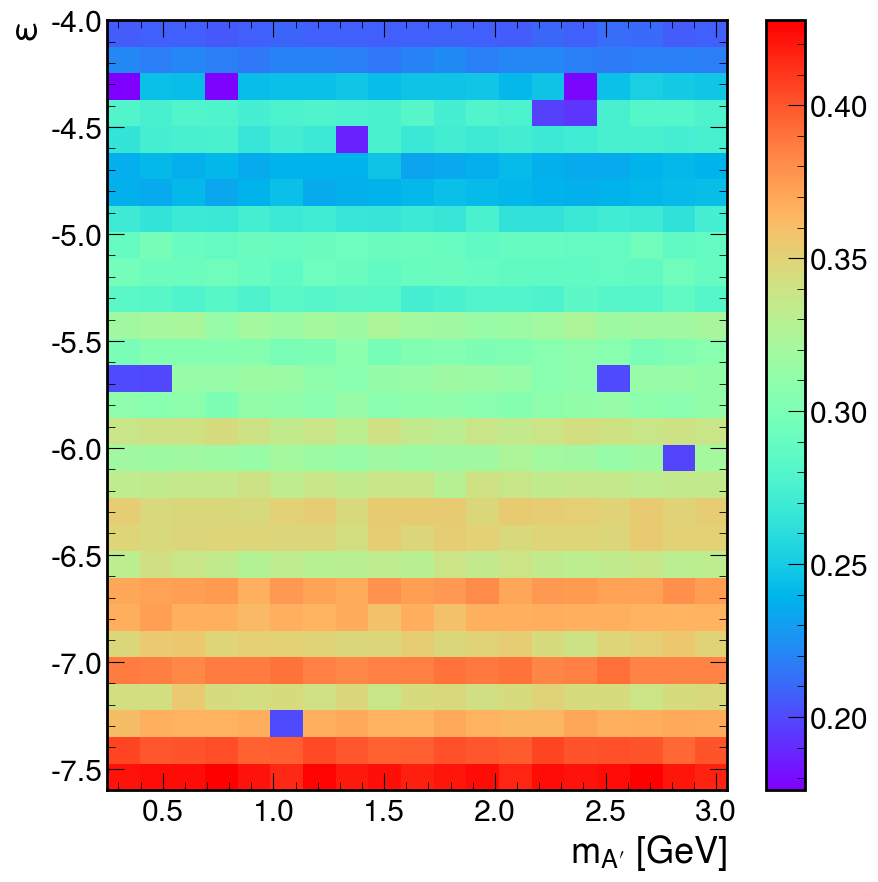

In [26]:
# Custom data representing the number of events for each mass and epsilon value
# Replace this with your own data

mass_values = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05]
epsilon_values = [-4, -4.2, -4.4, -4.6, -4.8, -5, -5.2, -5.4, -5.6, -5.8, -6, -6.2, -6.4, -6.6, -6.8, -7, -7.2, -7.4, -7.6]
result_values = []
# sum_values = []

# for key in some_test_dict:
#     mass_values.append(key[0])
#     epsilon_values.append(key[1])

# print(len(sum_values))

double_list = []

for mass in mass_values:
    nested_list = []
    for epsilon in epsilon_values:
        print(epsilon)
        nested_list.append(0 if not isinstance(data_dict[mass, epsilon], pandas.DataFrame)  else sum(data_dict[mass, epsilon]["recon_w_dimuon_track"].to_numpy()))
    double_list.append(nested_list)
    # print(nested_list)
print(double_list)

# print(result_values)
# print(len(result_values))
# print(len(result_values[0]))
# print(len(result_values[1]))

# my_2d_array = np.zeros((rows, cols))

# for i in range(len(result_values)):
#     for j in range(len(result_values)):
#         if result_values[i][j] != 1:
#            my_2d_array[i][j] = 0  

# print(mass_values)
# print(epsilon_values)
# print(type(result_values))

# # Create a grid of x and y coordinates
# x_grid, y_grid = np.meshgrid(mass_values, epsilon_values)

# # Create the heatmap
# plt.pcolormesh(x_grid, y_grid, result_values, shading='auto', cmap='viridis')

# # Add labels to the axes
# plt.xlabel('X Axis')
# plt.ylabel('Y Axis')

# # Add a colorbar to indicate the values
# plt.colorbar(label='Values')

# # Show the plot
# plt.show()

# print(mass_values)
# print(epsilon_values)
# print(result_values)

# mass_values = [key[0] for key in data_dict]
# print(len(mass_values))
# epsilon_values = [key[1] for key in data_dict]
# print(len(epsilon_values))
# event_counts = [sum(data_dict[key]["recon_w_dimuon_track"].to_numpy())] for key in data_dict]


normalized_list = [[element / 10000 for element in row] for row in double_list]


# Create the heatmap
plt.imshow(normalized_list, cmap='rainbow', extent=[min(mass_values), max(mass_values), min(epsilon_values), max(epsilon_values)], origin='lower', aspect='auto')

# Add colorbar for reference
plt.colorbar()

# Customize axis labels and title
plt.xlabel('$m_{A\prime}$ [GeV]')
plt.ylabel('$\epsilon$')


plt.show()

0.25
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.35
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.45
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.55
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.65
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.75
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.85
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
0.95
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
1.05
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
1.15
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-4.4
-4.2
-4
1.25
-7.6
-7.4
-7.2
-7
-6.8
-6.6
-6.4
-6.2
-6
-5.8
-5.6
-5.4
-5.2
-5
-4.8
-4.6
-

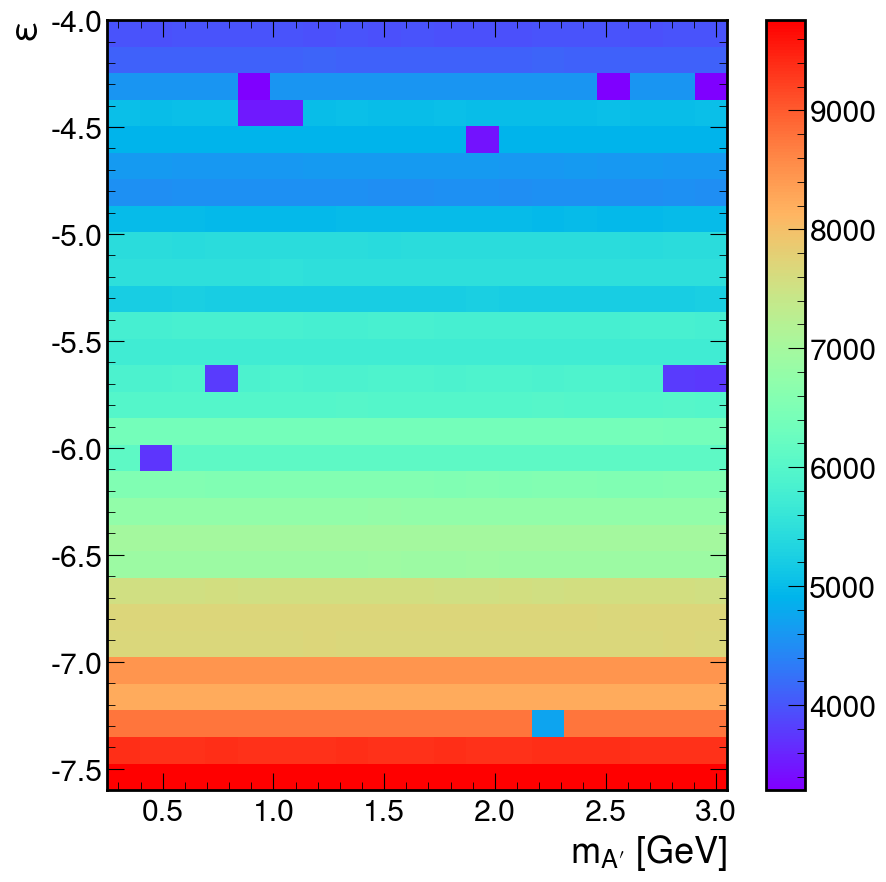

In [34]:
# Custom data representing the number of events for each mass and epsilon value
# Replace this with your own data

mass_values = [0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95, 2.05, 2.15, 2.25, 2.35, 2.45, 2.55, 2.65, 2.75, 2.85, 2.95, 3.05]
# epsilon_values = [-4, -4.2, -4.4, -4.6, -4.8, -5, -5.2, -5.4, -5.6, -5.8, -6, -6.2, -6.4, -6.6, -6.8, -7, -7.2, -7.4, -7.6]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]
result_values = []
# sum_values = []

# for key in some_test_dict:
#     mass_values.append(key[0])
#     epsilon_values.append(key[1])

# print(len(sum_values))

double_list = []

for mass in mass_values:
    nested_list = []
    print(mass)
    for epsilon in epsilon_values:
        print(epsilon)
        nested_list.append(0 if not isinstance(data_dict[mass, epsilon], pandas.DataFrame)  else sum(data_dict[mass, epsilon]["reconstructable_tracks"].to_numpy()))
    double_list.append(nested_list)
    # print(nested_list)
print(double_list)

# print(result_values)
# print(len(result_values))
# print(len(result_values[0]))
# print(len(result_values[1]))

# my_2d_array = np.zeros((rows, cols))

# for i in range(len(result_values)):
#     for j in range(len(result_values)):
#         if result_values[i][j] != 1:
#            my_2d_array[i][j] = 0  

# print(mass_values)
# print(epsilon_values)
# print(type(result_values))

# # Create a grid of x and y coordinates
# x_grid, y_grid = np.meshgrid(mass_values, epsilon_values)

# # Create the heatmap
# plt.pcolormesh(x_grid, y_grid, result_values, shading='auto', cmap='viridis')

# # Add labels to the axes
# plt.xlabel('X Axis')
# plt.ylabel('Y Axis')

# # Add a colorbar to indicate the values
# plt.colorbar(label='Values')

# # Show the plot
# plt.show()

# print(mass_values)
# print(epsilon_values)
# print(result_values)

# mass_values = [key[0] for key in data_dict]
# print(len(mass_values))
# epsilon_values = [key[1] for key in data_dict]
# print(len(epsilon_values))
# event_counts = [sum(data_dict[key]["recon_w_dimuon_track"].to_numpy())] for key in data_dict]


normalized_list = [[element / 10000 for element in row] for row in double_list]


# Create the heatmap
plt.imshow(double_list, cmap='rainbow', extent=[min(mass_values), max(mass_values), min(epsilon_values), max(epsilon_values)], origin='lower', aspect='auto')

# Add colorbar for reference
plt.colorbar()

# Customize axis labels and title
plt.xlabel('$m_{A\prime}$ [GeV]')
plt.ylabel('$\epsilon$')


plt.show()

In [28]:

# Example data (replace this with your actual data)
mass_values = [0.250000, 0.350000, 0.450000, 0.550000, 0.650000, 0.750000, 0.850000, 0.950000, 1.050000, 1.150000, 1.250000, 1.350000, 1.450000, 1.550000, 1.650000, 1.750000, 1.850000, 1.950000, 2.050000, 2.150000, 2.250000, 2.350000, 2.450000, 2.550000, 2.650000, 2.750000, 2.850000, 2.950000, 3.050000]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]

# Create a 2D array (matrix) for z values
z = np.array([[sum(data_dict[mass, epsilon]["reconstructable_tracks"].to_numpy()*data_dict[mass, epsilon]["weight"].to_numpy())/10000 for mass in mass_values] for epsilon in epsilon_values])

# Plotting the heat map
plt.imshow(z, cmap='rainbow', interpolation='nearest', origin='lower', extent=[min(mass_values), max(mass_values), min(epsilon_values), max(epsilon_values)])
plt.colorbar(label='Fraction of Events')  # Add colorbar to show the mapping of z values to colors

# Set axis labels and title
plt.xlabel('$m_{A\prime}$ [GeV]')
plt.ylabel('$\epsilon$')
plt.title('Reconstructable Tracks')

plt.yticks([-7.5, -7, -6.5, -6, -5.5, -5, -4.5, -4], ['$10^{-7.5}$', '$10^{-7.0}$', '$10^{-6.5}$', '$10^{-6}$', '$10^{-5.5}$', '$10^{-5}$', '$10^{-4.5}$', '$10^{-4}$'])

plt.ylabel(rotation=90)

# Show the plot
plt.show()

KeyError: 'reconstructable_tracks'

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

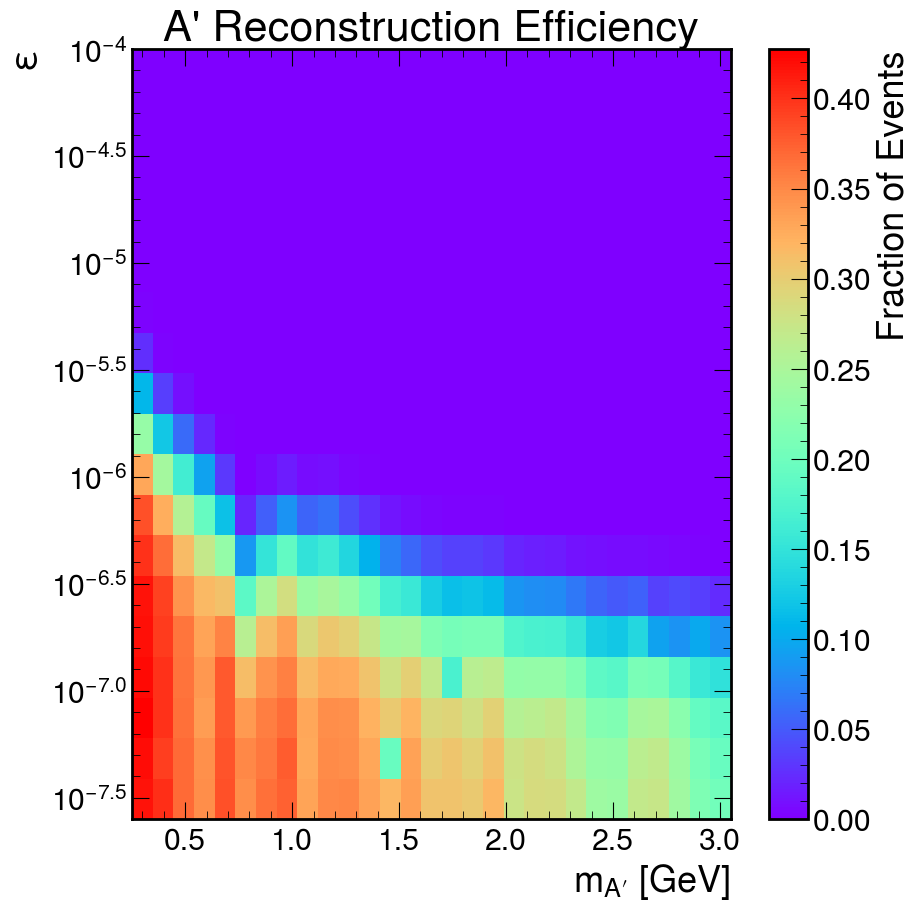

In [29]:
# Example data (replace this with your actual data)
mass_values = [0.250000, 0.350000, 0.450000, 0.550000, 0.650000, 0.750000, 0.850000, 0.950000, 1.050000, 1.150000, 1.250000, 1.350000, 1.450000, 1.550000, 1.650000, 1.750000, 1.850000, 1.950000, 2.050000, 2.150000, 2.250000, 2.350000, 2.450000, 2.550000, 2.650000, 2.750000, 2.850000, 2.950000, 3.050000]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]

# Create a 2D array (matrix) for z values
z = np.array([[sum(data_dict[mass, epsilon]["recon_w_dimuon_track"].to_numpy()*data_dict[mass, epsilon]["weight"].to_numpy())/10000 for mass in mass_values] for epsilon in epsilon_values])

# Plotting the heat map
plt.imshow(z, cmap='rainbow', interpolation='nearest', origin='lower', extent=[min(mass_values), max(mass_values), min(epsilon_values), max(epsilon_values)])
plt.colorbar(label='Fraction of Events')

# Set axis labels and title
plt.xlabel('$m_{A\prime}$ [GeV]')
plt.ylabel('$\epsilon$')
plt.title('A\' Reconstruction Efficiency')

plt.yticks([-7.5, -7, -6.5, -6, -5.5, -5, -4.5, -4], ['$10^{-7.5}$', '$10^{-7.0}$', '$10^{-6.5}$', '$10^{-6}$', '$10^{-5.5}$', '$10^{-5}$', '$10^{-4.5}$', '$10^{-4}$'])

plt.ylabel(rotation=90)

# Show the plot
plt.show()

TypeError: ylabel() missing 1 required positional argument: 'ylabel'

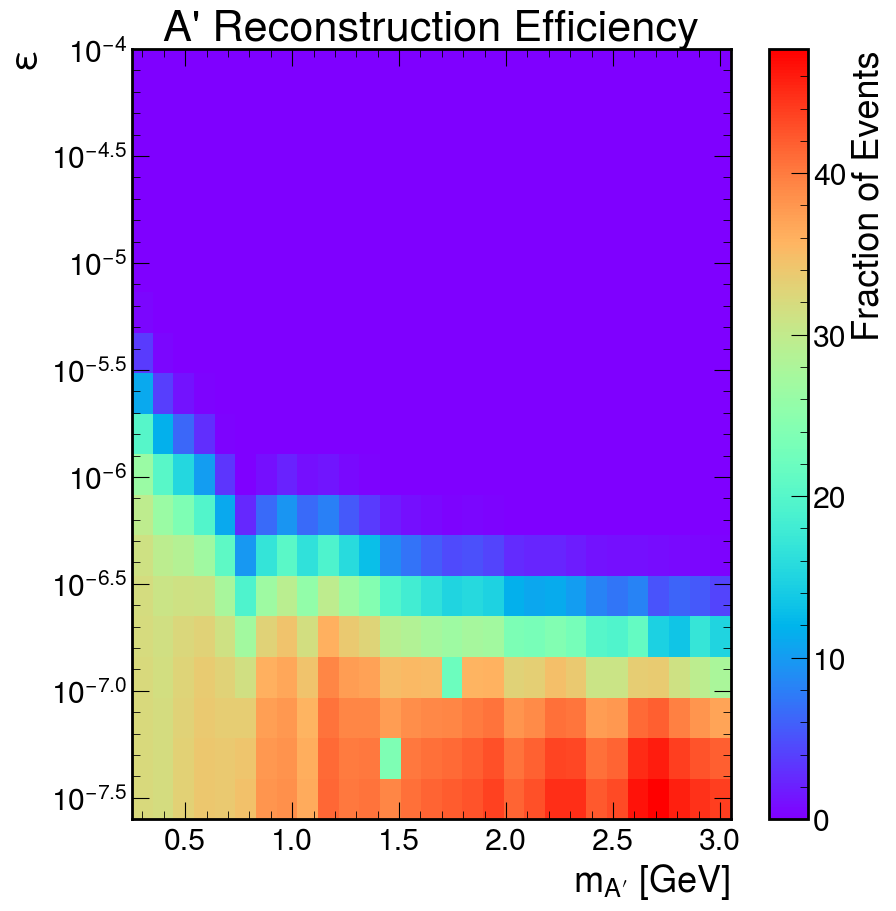

In [30]:
# Example data (replace this with your actual data)
mass_values = [0.250000, 0.350000, 0.450000, 0.550000, 0.650000, 0.750000, 0.850000, 0.950000, 1.050000, 1.150000, 1.250000, 1.350000, 1.450000, 1.550000, 1.650000, 1.750000, 1.850000, 1.950000, 2.050000, 2.150000, 2.250000, 2.350000, 2.450000, 2.550000, 2.650000, 2.750000, 2.850000, 2.950000, 3.050000]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]

# Create a 2D array (matrix) for z values
z = np.array([[sum(data_dict[mass, epsilon]["a_prime_pz"].to_numpy()*data_dict[mass, epsilon]["weight"].to_numpy())/10000 for mass in mass_values] for epsilon in epsilon_values])

# Plotting the heat map
plt.imshow(z, cmap='rainbow', interpolation='nearest', origin='lower', extent=[min(mass_values), max(mass_values), min(epsilon_values), max(epsilon_values)])
plt.colorbar(label='Fraction of Events')

# Set axis labels and title
plt.xlabel('$m_{A\prime}$ [GeV]')
plt.ylabel('$\epsilon$')
plt.title('A\' Reconstruction Efficiency')

plt.yticks([-7.5, -7, -6.5, -6, -5.5, -5, -4.5, -4], ['$10^{-7.5}$', '$10^{-7.0}$', '$10^{-6.5}$', '$10^{-6}$', '$10^{-5.5}$', '$10^{-5}$', '$10^{-4.5}$', '$10^{-4}$'])

plt.ylabel(rotation=90)

# Show the plot
plt.show()

In [10]:
def EffPlotInfoTRTFWD(X, Y, Z, binsDef=20):
    two_track_reco_bin_sums, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='sum',bins=binsDef)
    w_dimuon_bin_sums, bin_edges, binnumber = stats.binned_statistic(X, Z, statistic='sum',bins=binsDef)
    bin_stds, bin_edges, binnumber = stats.binned_statistic(X, Y, statistic='std',bins=binsDef)
    bin_means = w_dimuon_bin_sums/two_track_reco_bin_sums
    #print(bin_means)
    counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,len(bin_means)+1,1)]
    return bin_edges,bin_means,bin_stds,counts

In [18]:
Xvals = "a_prime_pz"
Yvals = "two_track_frac"
Zvals = "recon_w_dimuon_track"

Info_mass_0pt25 = EffPlotInfoTRTFWD(pdf_mass_0pt25_withDC[Xvals].to_numpy(), pdf_mass_0pt25_withDC[Yvals].to_numpy(), pdf_mass_0pt25_withDC[Zvals].to_numpy())
Info_mass_0pt85 = EffPlotInfoTRTFWD(pdf_mass_0pt85_withDC[Xvals].to_numpy(), pdf_mass_0pt85_withDC[Yvals].to_numpy(), pdf_mass_0pt85_withDC[Zvals].to_numpy())
Info_mass_1pt55 = EffPlotInfoTRTFWD(pdf_mass_1pt55_withDC[Xvals].to_numpy(), pdf_mass_1pt55_withDC[Yvals].to_numpy(), pdf_mass_1pt55_withDC[Zvals].to_numpy())
Info_mass_1pt85 = EffPlotInfoTRTFWD(pdf_mass_1pt85_withDC[Xvals].to_numpy(), pdf_mass_1pt85_withDC[Yvals].to_numpy(), pdf_mass_1pt85_withDC[Zvals].to_numpy())
Info_mass_2pt05 = EffPlotInfoTRTFWD(pdf_mass_2pt05_withDC[Xvals].to_numpy(), pdf_mass_2pt05_withDC[Yvals].to_numpy(), pdf_mass_2pt05_withDC[Zvals].to_numpy())
Info_mass_3pt05 = EffPlotInfoTRTFWD(pdf_mass_3pt05_withDC[Xvals].to_numpy(), pdf_mass_3pt05_withDC[Yvals].to_numpy(), pdf_mass_3pt05_withDC[Zvals].to_numpy())

# Fit polynomial of degree 2 or 3
degree = 4  # or 3
coeffs_0pt25 = np.polyfit(Info_mass_0pt25[0][:20], Info_mass_0pt25[1], degree)
coeffs_0pt85 = np.polyfit(Info_mass_0pt85[0][:20], Info_mass_0pt85[1], degree)
coeffs_1pt55 = np.polyfit(Info_mass_1pt55[0][:20], Info_mass_1pt55[1], degree)
coeffs_1pt85 = np.polyfit(Info_mass_1pt85[0][:20], Info_mass_1pt85[1], degree)
coeffs_2pt05 = np.polyfit(Info_mass_2pt05[0][:20], Info_mass_2pt05[1], degree)
coeffs_3pt05 = np.polyfit(Info_mass_3pt05[0][:20], Info_mass_3pt05[1], degree)

# Create polynomial objects
poly_0pt25 = np.poly1d(coeffs_0pt25)
poly_0pt85 = np.poly1d(coeffs_0pt85)
poly_1pt55 = np.poly1d(coeffs_1pt55)
poly_1pt85 = np.poly1d(coeffs_1pt85)
poly_2pt05 = np.poly1d(coeffs_2pt05)
poly_3pt05 = np.poly1d(coeffs_3pt05)

plt.errorbar(Info_mass_0pt25[0][:20], Info_mass_0pt25[1], Info_mass_0pt25[2]/np.sqrt(Info_mass_0pt25[3]), color='pink', lw=2, label='A\' Mass = 0.25 [GeV]')
plt.errorbar(Info_mass_0pt85[0][:20], Info_mass_0pt85[1], Info_mass_0pt85[2]/np.sqrt(Info_mass_0pt85[3]), color='b', lw=2, label='A\' Mass = 0.85 [GeV]')
plt.errorbar(Info_mass_1pt55[0][:20], Info_mass_1pt55[1], Info_mass_1pt55[2]/np.sqrt(Info_mass_1pt55[3]), color='black', lw=2, label='A\' Mass = 1.55 [GeV]')
plt.errorbar(Info_mass_1pt85[0][:20], Info_mass_1pt85[1], Info_mass_1pt85[2]/np.sqrt(Info_mass_1pt85[3]), color='orange', lw=2, label='A\' Mass = 1.85 [GeV]')
plt.errorbar(Info_mass_2pt05[0][:20], Info_mass_2pt05[1], Info_mass_2pt05[2]/np.sqrt(Info_mass_2pt05[3]), color='red', lw=2, label='A\' Mass = 2.05 [GeV]')
plt.errorbar(Info_mass_3pt05[0][:20], Info_mass_3pt05[1], Info_mass_3pt05[2]/np.sqrt(Info_mass_3pt05[3]), color='g', lw=2, label='A\' Mass = 3.05 [GeV]')

# Plot fitted curves
x_range = np.linspace(min(Info_mass_0pt25[0][:20]), max(Info_mass_0pt25[0][:20]), 100)  # Adjust range as needed
plt.plot(x_range, poly_0pt25(x_range), color='pink', linestyle='--')
plt.plot(x_range, poly_0pt85(x_range), color='b', linestyle='--')
plt.plot(x_range, poly_1pt55(x_range), color='black', linestyle='--')
plt.plot(x_range, poly_1pt85(x_range), color='orange', linestyle='--')
plt.plot(x_range, poly_2pt05(x_range), color='red', linestyle='--')
plt.plot(x_range, poly_3pt05(x_range), color='g', linestyle='--')

plt.xlabel('A\' pz [GeV] with DC Emulation')
plt.ylabel('Fraction with 2 Recon Tracks with Recon Dimuon')
plt.ylim([0,2])
plt.legend(loc='upper left')

plt.savefig("plots/aprime_to_dimuons/z200_600_a_prime_pz_versus_two_recon_track_frac_w_dimuon_withDC.jpg")

NameError: name 'pdf_mass_0pt25_withDC' is not defined

In [11]:
import numpy as np
import json

# Example data (replace this with your actual data)
mass_values = [0.250000, 0.350000, 0.450000, 0.550000, 0.650000, 0.750000, 0.850000, 0.950000, 1.050000, 1.150000, 1.250000, 1.350000, 1.450000, 1.550000, 1.650000, 1.750000, 1.850000, 1.950000, 2.050000, 2.150000, 2.250000, 2.350000, 2.450000, 2.550000, 2.650000, 2.750000, 2.850000, 2.950000, 3.050000]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]

# Create a 2D array (matrix) for z values
z = []
for epsilon in epsilon_values:
    epsilon_data = []
    for mass in mass_values:
        data = EffPlotInfoTRTFWD(data_dict[mass, epsilon]["a_prime_pz"].to_numpy(), data_dict[mass, epsilon]["two_track_frac"].to_numpy(), data_dict[mass, epsilon]["recon_w_dimuon_track"].to_numpy())
        epsilon_data.append(data)
    z.append(epsilon_data)

# Pad or truncate inner lists to ensure uniform length
max_length = max(len(data) for epsilon_data in z for data in epsilon_data)
for epsilon_data in z:
    for data in epsilon_data:
        if len(data[0]) < max_length:
            data[0] = np.pad(data[0], (0, max_length - len(data[0])), mode='constant', constant_values=np.nan)
            data[1] = np.pad(data[1], (0, max_length - len(data[1])), mode='constant', constant_values=np.nan)

# Convert to NumPy array
z = np.array(z)

    
# print(z)
print("hello")

# Now perform fitting

# Initialize dictionary to store fitting parameters
fitting_parameters_json = {}

# Create a new dictionary to hold the updated keys and values
new_fitting_parameters = {}

# Fit polynomial for each mass and epsilon value
for epsilon_idx, epsilon in enumerate(epsilon_values):
    for mass_idx, mass in enumerate(mass_values):
        if len(z[epsilon_idx, mass_idx][0]) >= 20:
            degree = 4
            coeffs = None
            while degree >= 2:
                coeffs = np.polyfit(z[epsilon_idx, mass_idx][0][:20], z[epsilon_idx, mass_idx][1], degree)
                if not np.isnan(coeffs).any():
                    new_fitting_parameters[(mass, epsilon)] = coeffs.tolist()
                    break
                else:
                    degree -= 1
                    print(f"Fitting failed for mass {mass} and epsilon {epsilon}")

        else:
            print("Array length is less than 20, cannot access index 19")

# Update the original dictionary with the new keys and values
fitting_parameters_json.update(new_fitting_parameters)

# Convert tuple keys to string keys
fitting_parameters_json_str = {f"{key[0]}, {key[1]}": value for key, value in fitting_parameters_json.items()}

# Save fitting parameters to a JSON file
with open('fitting_parameters_yah.json', 'w') as f:
    json.dump(fitting_parameters_json_str, f)



/tmp/ipykernel_210219/1328273446.py:5: RuntimeWarning: invalid value encountered in divide
  bin_means = w_dimuon_bin_sums/two_track_reco_bin_sums
/tmp/ipykernel_210219/2609903659.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  z = np.array(z)


hello
Fitting failed for mass 2.05 and epsilon -7.6
Fitting failed for mass 2.05 and epsilon -7.6
Fitting failed for mass 2.05 and epsilon -7.6
Fitting failed for mass 2.15 and epsilon -7.6
Fitting failed for mass 2.15 and epsilon -7.6
Fitting failed for mass 2.15 and epsilon -7.6
Fitting failed for mass 2.25 and epsilon -7.6
Fitting failed for mass 2.25 and epsilon -7.6
Fitting failed for mass 2.25 and epsilon -7.6
Fitting failed for mass 2.35 and epsilon -7.6
Fitting failed for mass 2.35 and epsilon -7.6
Fitting failed for mass 2.35 and epsilon -7.6
Fitting failed for mass 2.45 and epsilon -7.6
Fitting failed for mass 2.45 and epsilon -7.6
Fitting failed for mass 2.45 and epsilon -7.6
Fitting failed for mass 2.55 and epsilon -7.6
Fitting failed for mass 2.55 and epsilon -7.6
Fitting failed for mass 2.55 and epsilon -7.6
Fitting failed for mass 2.65 and epsilon -7.6
Fitting failed for mass 2.65 and epsilon -7.6
Fitting failed for mass 2.65 and epsilon -7.6
Fitting failed for mass 2.75

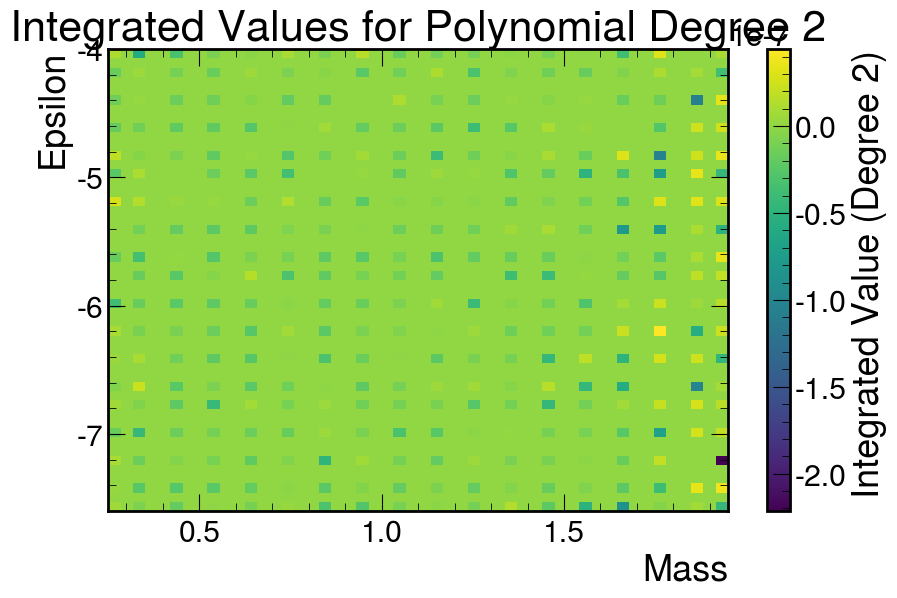

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import json

# Load fitting parameters from JSON file
with open('fitting_parameters_yah.json', 'r') as f:
    fitting_parameters_json = json.load(f)

# Initialize arrays to store integrated values
mass_values = []
epsilon_values = []
integrated_values = []

# Loop through fitting parameters
for key, value in fitting_parameters_json.items():
    # Convert string key back to tuple
    mass, epsilon = map(float, key.split(', '))
    
    # Retrieve fitting parameters for polynomials of degrees 2 to 4
    coeffs_deg_2 = value[0]
    coeffs_deg_3 = value[1]
    coeffs_deg_4 = value[2]
    
    # Define polynomial functions
    poly_deg_2 = np.poly1d(coeffs_deg_2)
    poly_deg_3 = np.poly1d(coeffs_deg_3)
    poly_deg_4 = np.poly1d(coeffs_deg_4)
    
    # Integrate polynomial functions over a range
    integral_deg_2, _ = quad(poly_deg_2, 0, 1)  # Adjust range as needed
    integral_deg_3, _ = quad(poly_deg_3, 0, 1)
    integral_deg_4, _ = quad(poly_deg_4, 0, 1)
    
    # Store mass, epsilon, and integrated values
    mass_values.append(mass)
    epsilon_values.append(epsilon)
    integrated_values.append([integral_deg_2, integral_deg_3, integral_deg_4])

# Convert lists to numpy arrays
mass_values = np.array(mass_values)
epsilon_values = np.array(epsilon_values)
integrated_values = np.array(integrated_values)

# Plot as 2D histogram
plt.figure(figsize=(10, 6))
plt.hist2d(mass_values, epsilon_values, weights=integrated_values[:, 0], bins=50, cmap='viridis')
plt.colorbar(label='Integrated Value (Degree 2)')
plt.xlabel('Mass')
plt.ylabel('Epsilon')
plt.title('Integrated Values for Polynomial Degree 2')
plt.show()


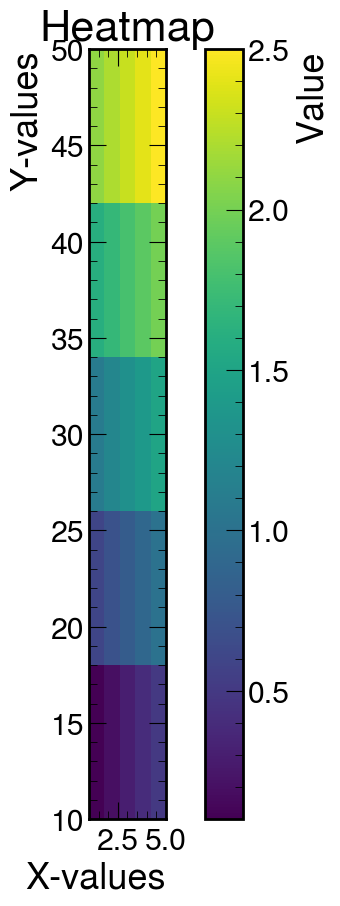

In [120]:
# Example data (replace this with your actual data)
mass_values = [0.250000, 0.350000, 0.450000, 0.550000, 0.650000, 0.750000, 0.850000, 0.950000, 1.050000, 1.150000, 1.250000, 1.350000, 1.450000, 1.550000, 1.650000, 1.750000, 1.850000, 1.950000, 2.050000, 2.150000, 2.250000, 2.350000, 2.450000, 2.550000, 2.650000, 2.750000, 2.850000, 2.950000, 3.050000]
epsilon_values = [-7.6, -7.4, -7.2, -7, -6.8, -6.6, -6.4, -6.2, -6, -5.8, -5.6, -5.4, -5.2, -5, -4.8, -4.6, -4.4, -4.2, -4]

# Create a 2D array (matrix) for z values
z = np.array([[sum(data_dict[mass, epsilon]["a_prime_pz"].to_numpy()*data_dict[mass, epsilon]["weight"].to_numpy())/10000 for mass in mass_values] for epsilon in epsilon_values])


# import matplotlib.pyplot as plt
# import numpy as np

# # Sample data (replace these with your own data)
# x_values = [1, 2, 3, 4, 5]  # Replace with your x-values
# y_values = [10, 20, 30, 40, 50]  # Replace with your y-values
# results = [
#     [0.1, 0.2, 0.3, 0.4, 0.5],
#     [0.6, 0.7, 0.8, 0.9, 1.0],
#     [1.1, 1.2, 1.3, 1.4, 1.5],
#     [1.6, 1.7, 1.8, 1.9, 2.0],
#     [2.1, 2.2, 2.3, 2.4, 2.5]
# ]  # Replace with your result values

# # Convert x and y values to arrays
# x = np.array(x_values)
# y = np.array(y_values)

# # Create a meshgrid from x and y
# X, Y = np.meshgrid(x, y)

# # Convert the results to a NumPy array
# results_array = np.array(results)

# # Create the heatmap
# plt.imshow(results_array, extent=(x.min(), x.max(), y.min(), y.max()), origin='lower', cmap='viridis')
# plt.colorbar(label='Value')

# # Set axis labels
# plt.xlabel('X-values')
# plt.ylabel('Y-values')

# plt.title('Heatmap')

# # Show the plot
# plt.show()